# Using SGW 

In [1]:
import sys
import numpy as np
import torch
sys.path.append('./lib')
from sgw_numpy import sgw_cpu
from sgw_pytorch import sgw_gpu
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import gridspec
import imageio
import os

### Simple example on random points

##### Example with the numpy implementation


In [2]:
n_samples=300
Xs=np.random.rand(n_samples,2)
Xt=np.random.rand(n_samples,1)
#P=np.random.randn(2,200) # 500 projections are used by SGW

In [3]:
%%time
sgw_cpu(Xs,Xt,P=None)

/home/mlrl/Documents/AnyDesk/RASGW/lib/sgw_numpy.py:234: RuntimeWarning: invalid value encountered in divide
  z_xx_bar = z_xx / np.sqrt(np.sum(z_xx ** 2, axis=1, keepdims=True))


CPU times: user 1.13 s, sys: 166 ms, total: 1.3 s
Wall time: 1.5 s


0.05075479045074198

##### Example with the pytorch implementation
(*here no GPU is used*)

In [4]:
xs=torch.from_numpy(Xs).to(torch.float32)
xt=torch.from_numpy(Xt).to(torch.float32)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
xs=xs.to('cuda')
xt=xt.to('cuda')
print(device)

cuda


In [5]:
%%time
#sgw_gpu(xs,xt,device,P=torch.from_numpy(P).to(torch.float32))
sgw_gpu(xs,xt,device,P=None)

CPU times: user 165 ms, sys: 123 ms, total: 288 ms
Wall time: 286 ms


tensor(0.0489, device='cuda:0')

### SGW on meshes

In [6]:
path='./data/meshes.npy'
tab_obj=np.load(path)
nproj=100

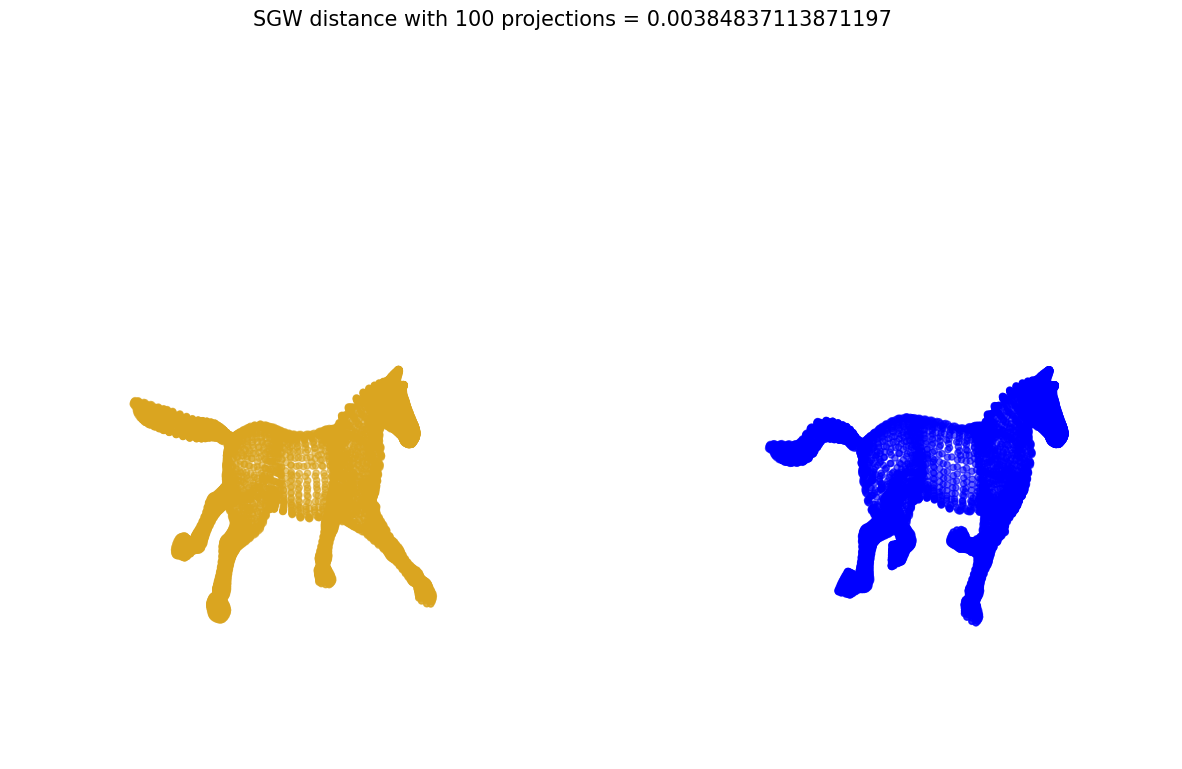

In [7]:
fig = plt.figure(figsize=(15,10))

X1=tab_obj[0]
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X1[:,0],X1[:,2],X1[:,1], marker='o', s=20, c="goldenrod", alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()

ax = fig.add_subplot(122, projection='3d')
X2=tab_obj[15]
ax.scatter(X2[:,0],X2[:,2],X2[:,1], marker='o', s=20, c="blue", alpha=0.6)
ax.view_init(elev=10., azim=360)
ax.set_axis_off()


plt.suptitle('SGW distance with {0} projections = {1}'.format(nproj,sgw_cpu(X1,X2,nproj=nproj)),fontsize=15)
plt.show()

In [8]:
import re
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [9]:
alldist_sgw=[]
for i in range(len(tab_obj)):
    alldist_sgw.append(sgw_cpu(X1,tab_obj[i],nproj=nproj))

/home/mlrl/Documents/AnyDesk/RASGW/lib/sgw_numpy.py:236: RuntimeWarning: invalid value encountered in divide
  z_yy_bar = z_yy / np.sqrt(np.sum(z_yy ** 2, axis=1, keepdims=True))


/tmp/ipykernel_2455562/80716279.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(15,10))


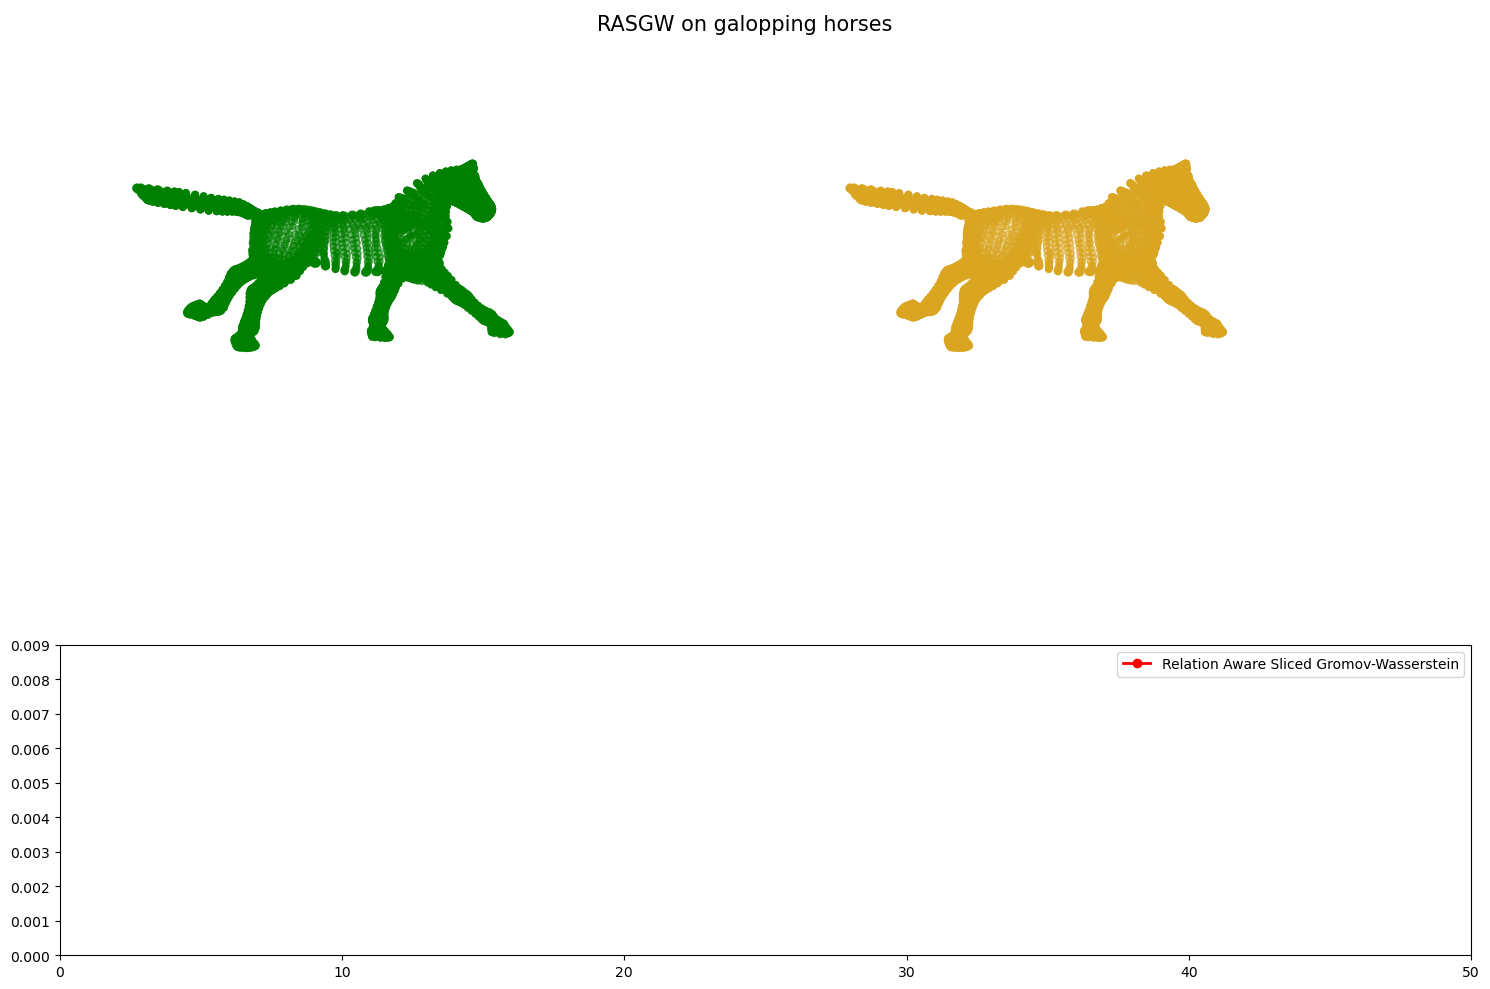

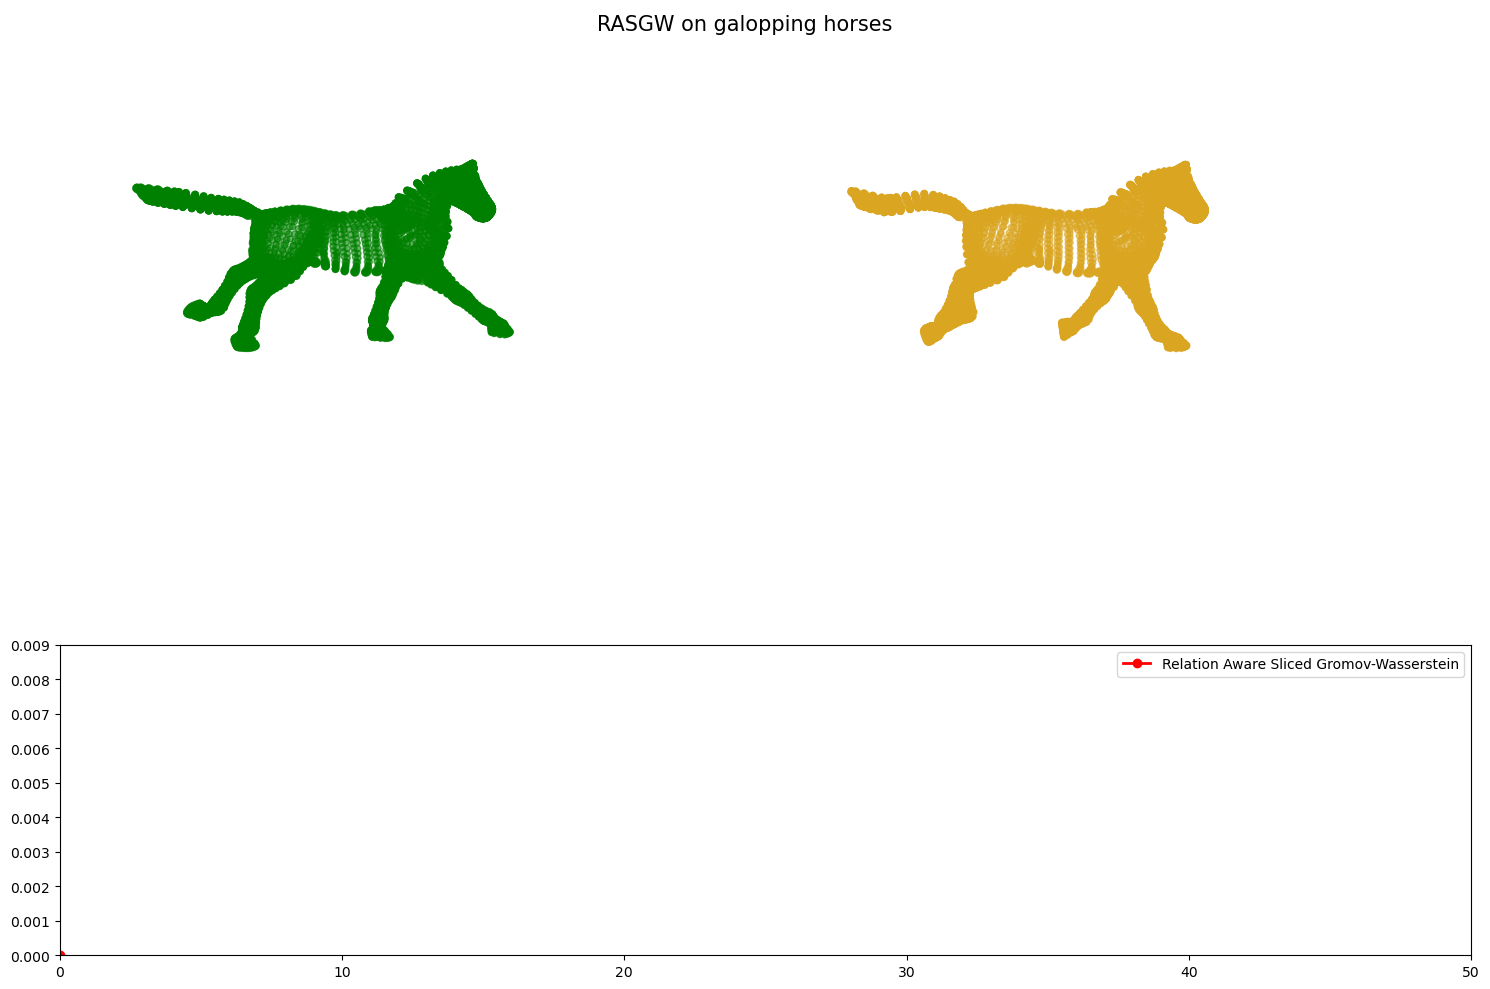

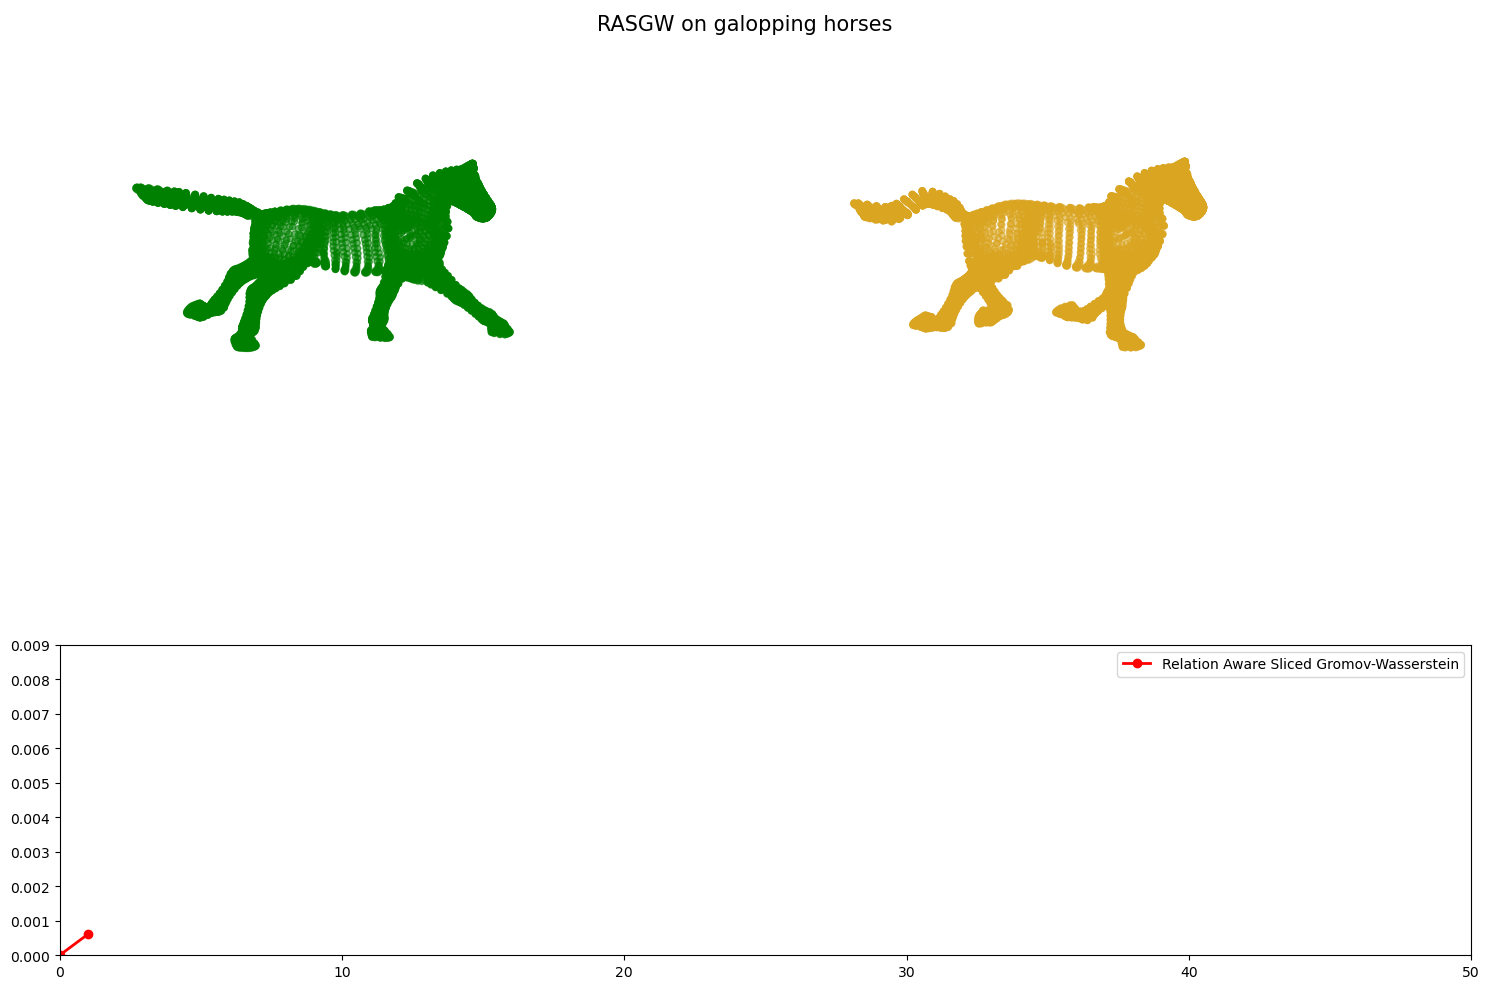

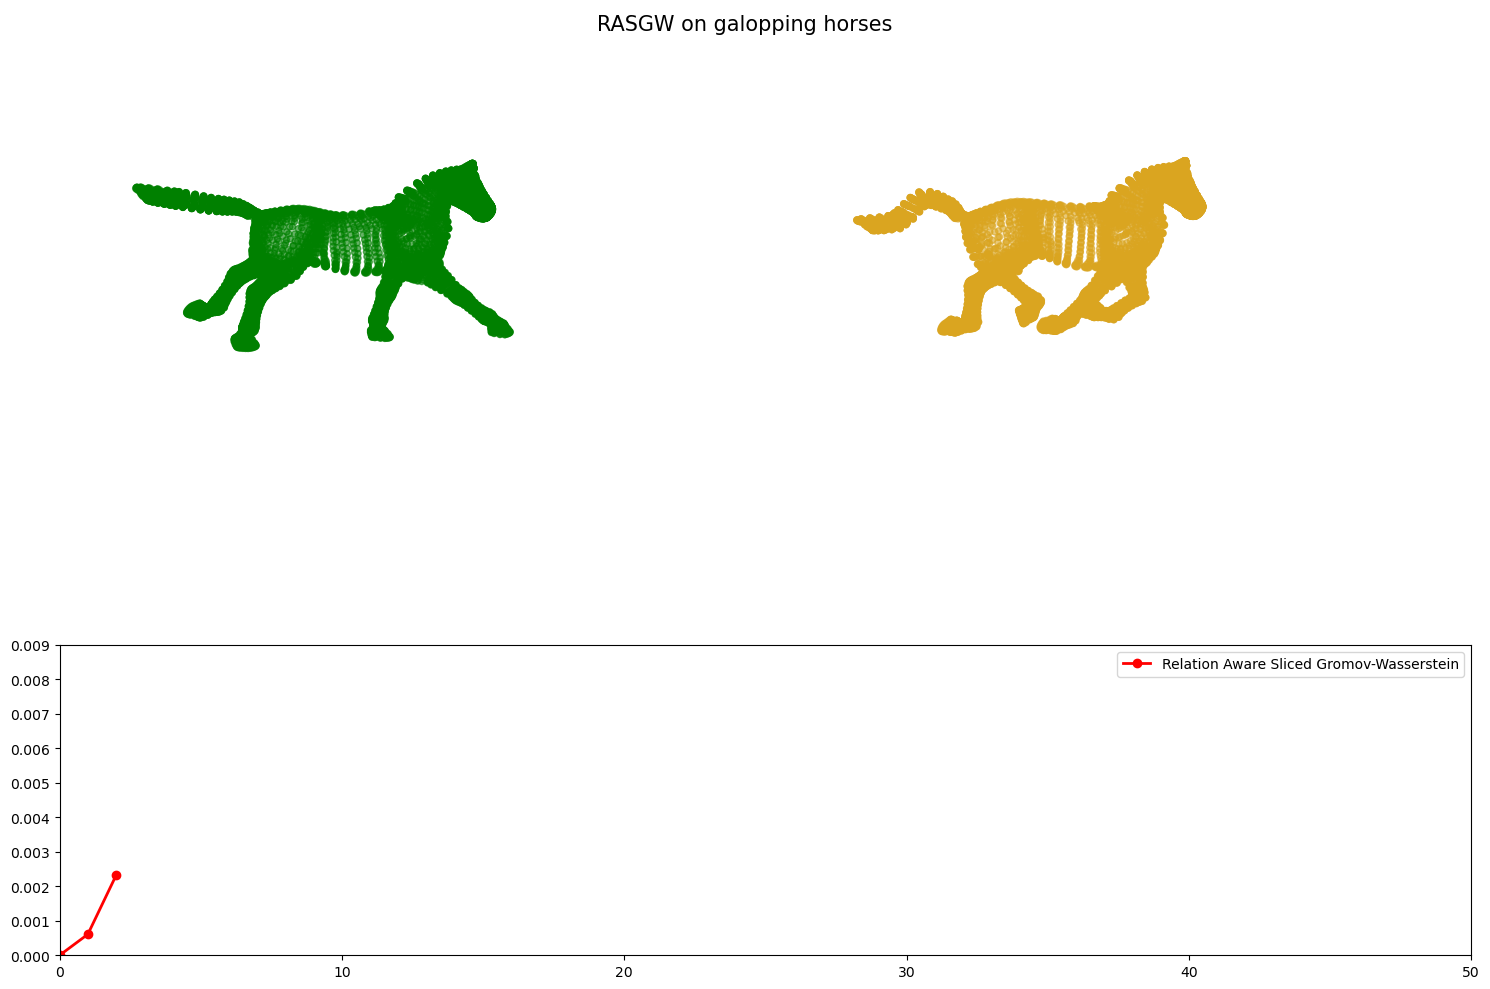

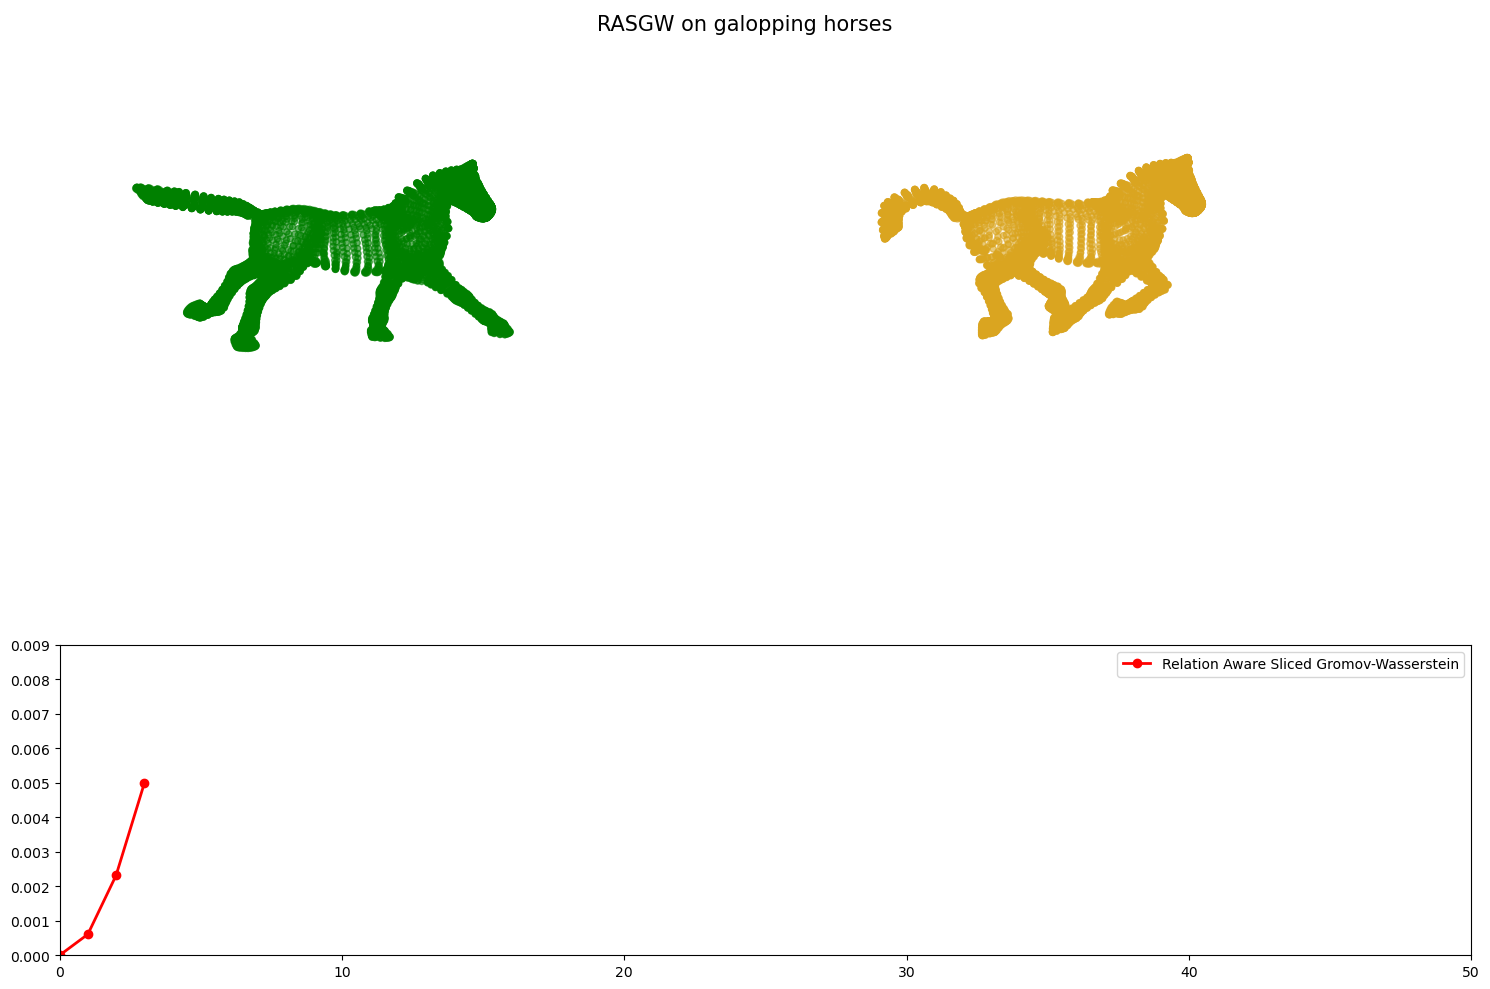

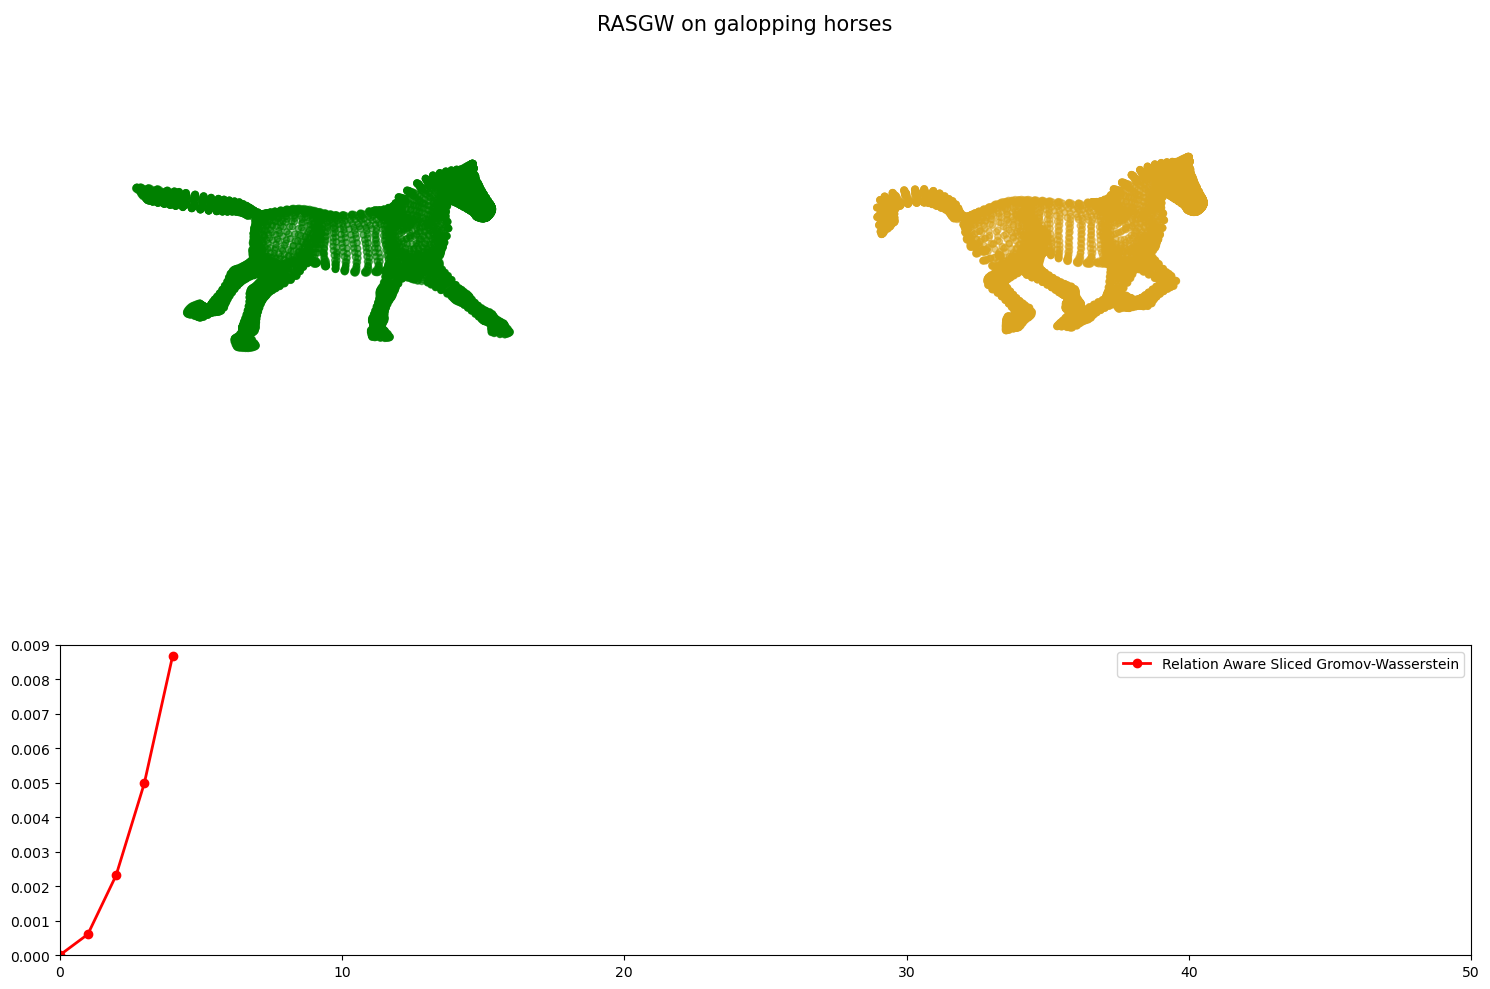

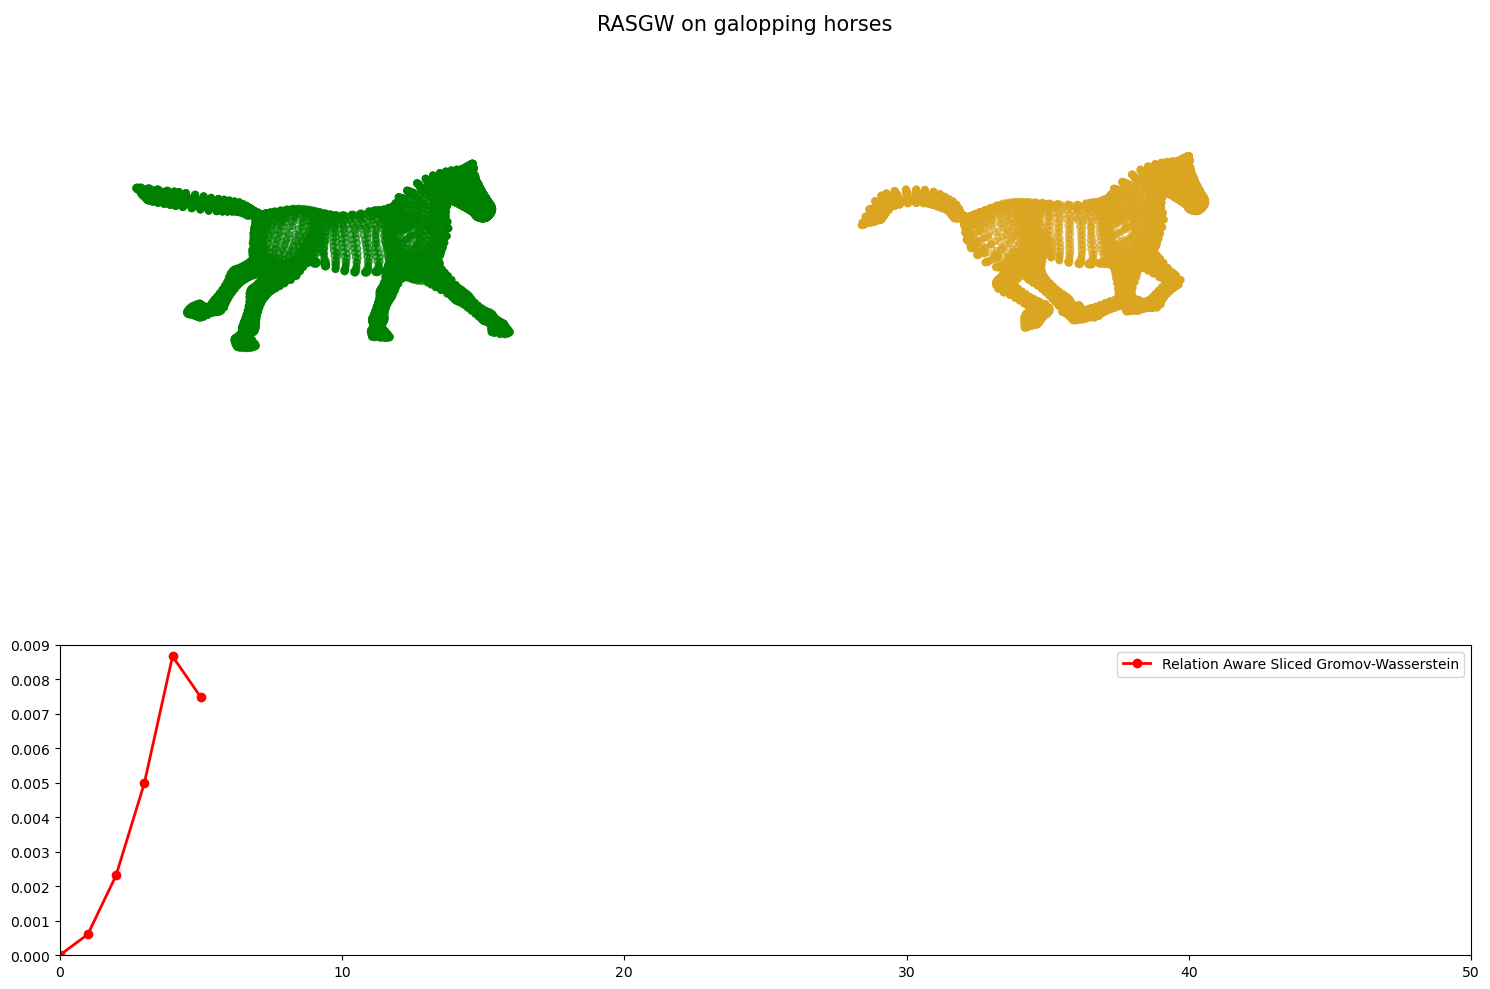

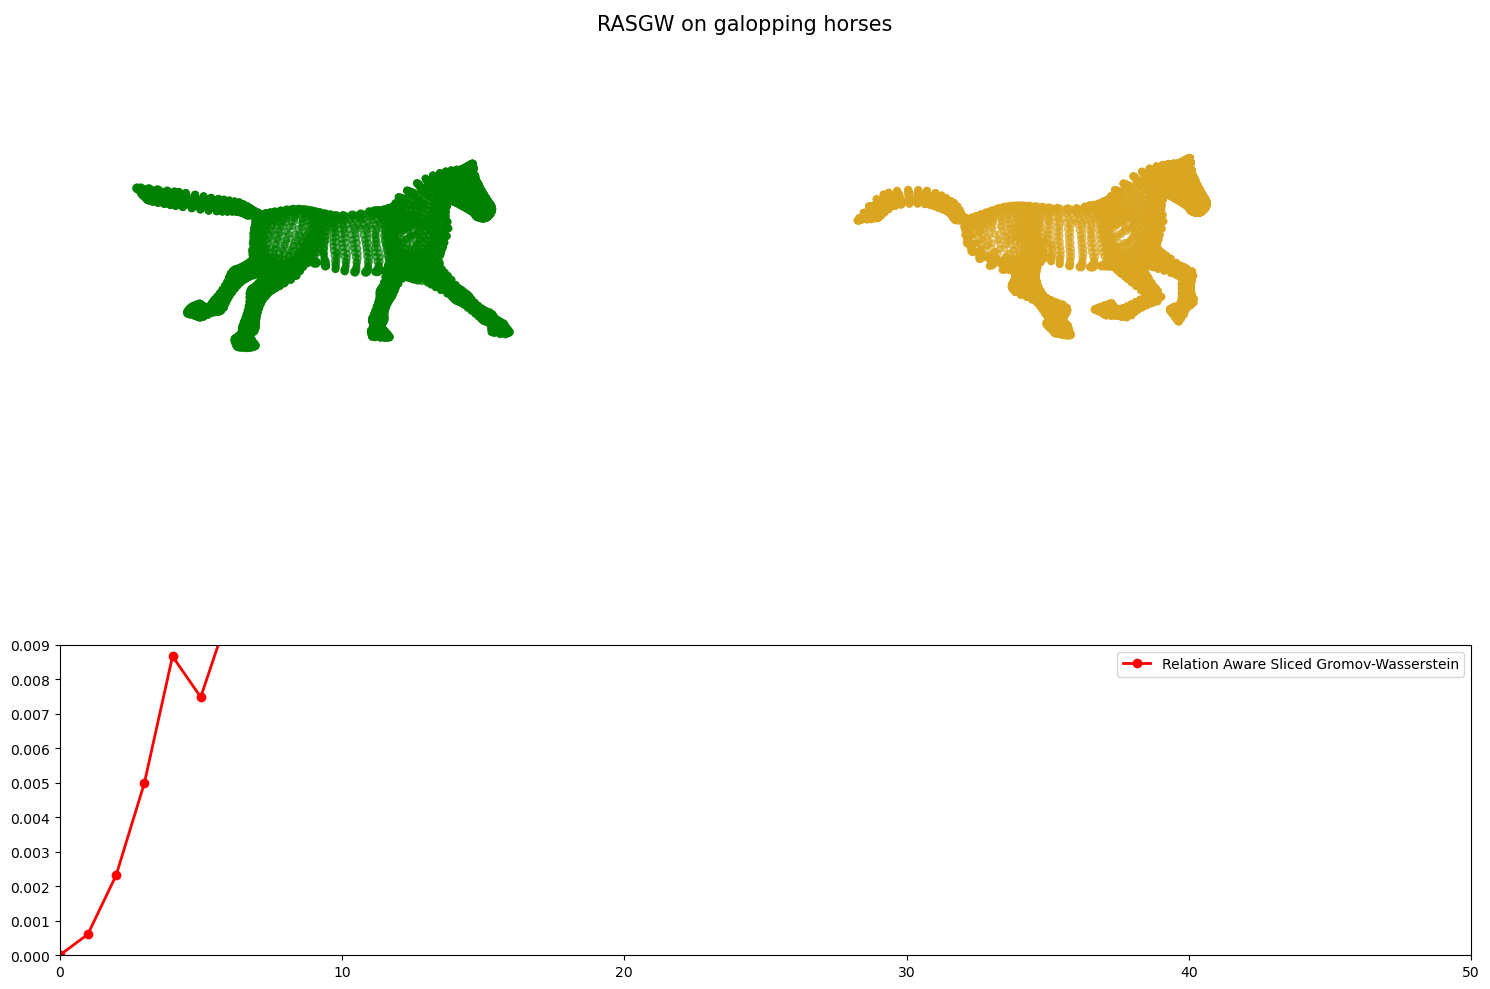

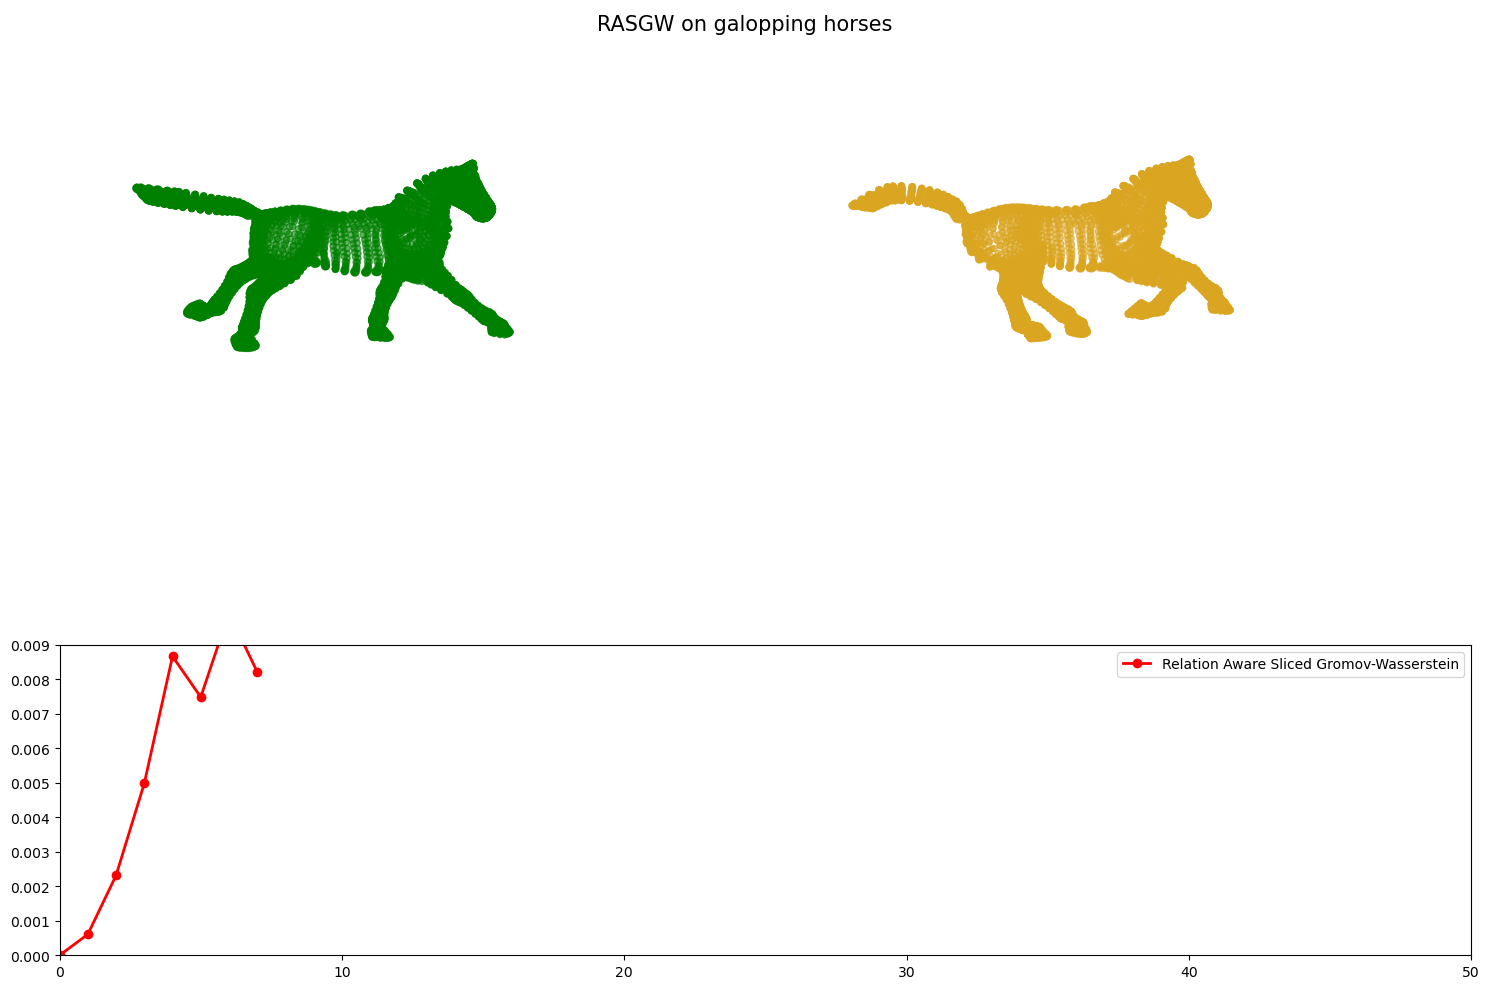

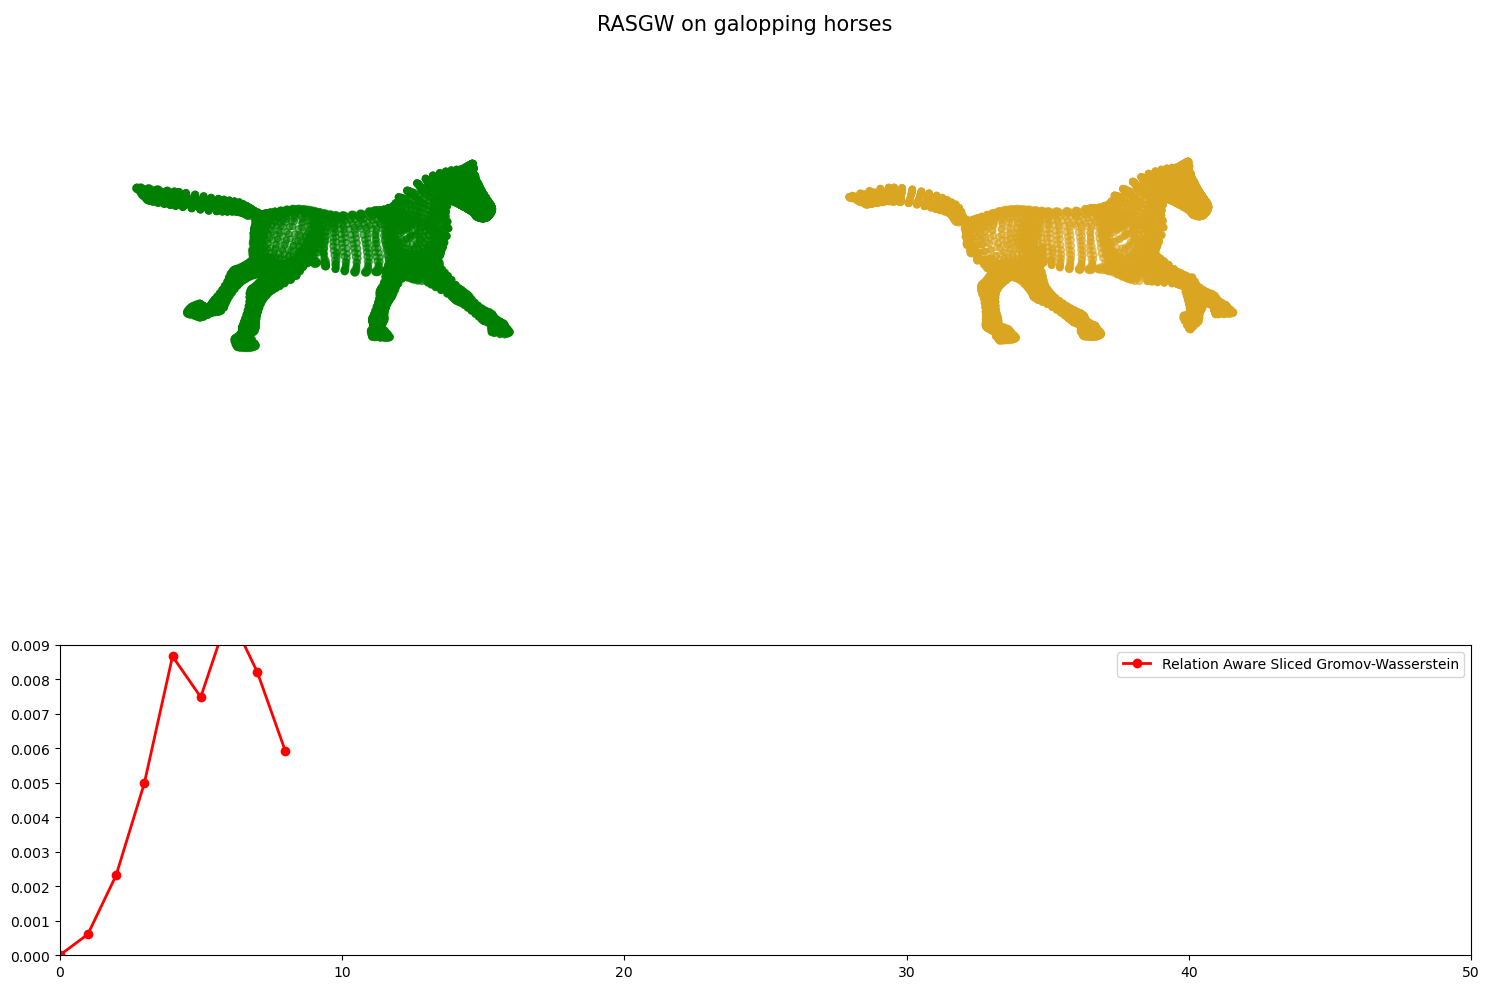

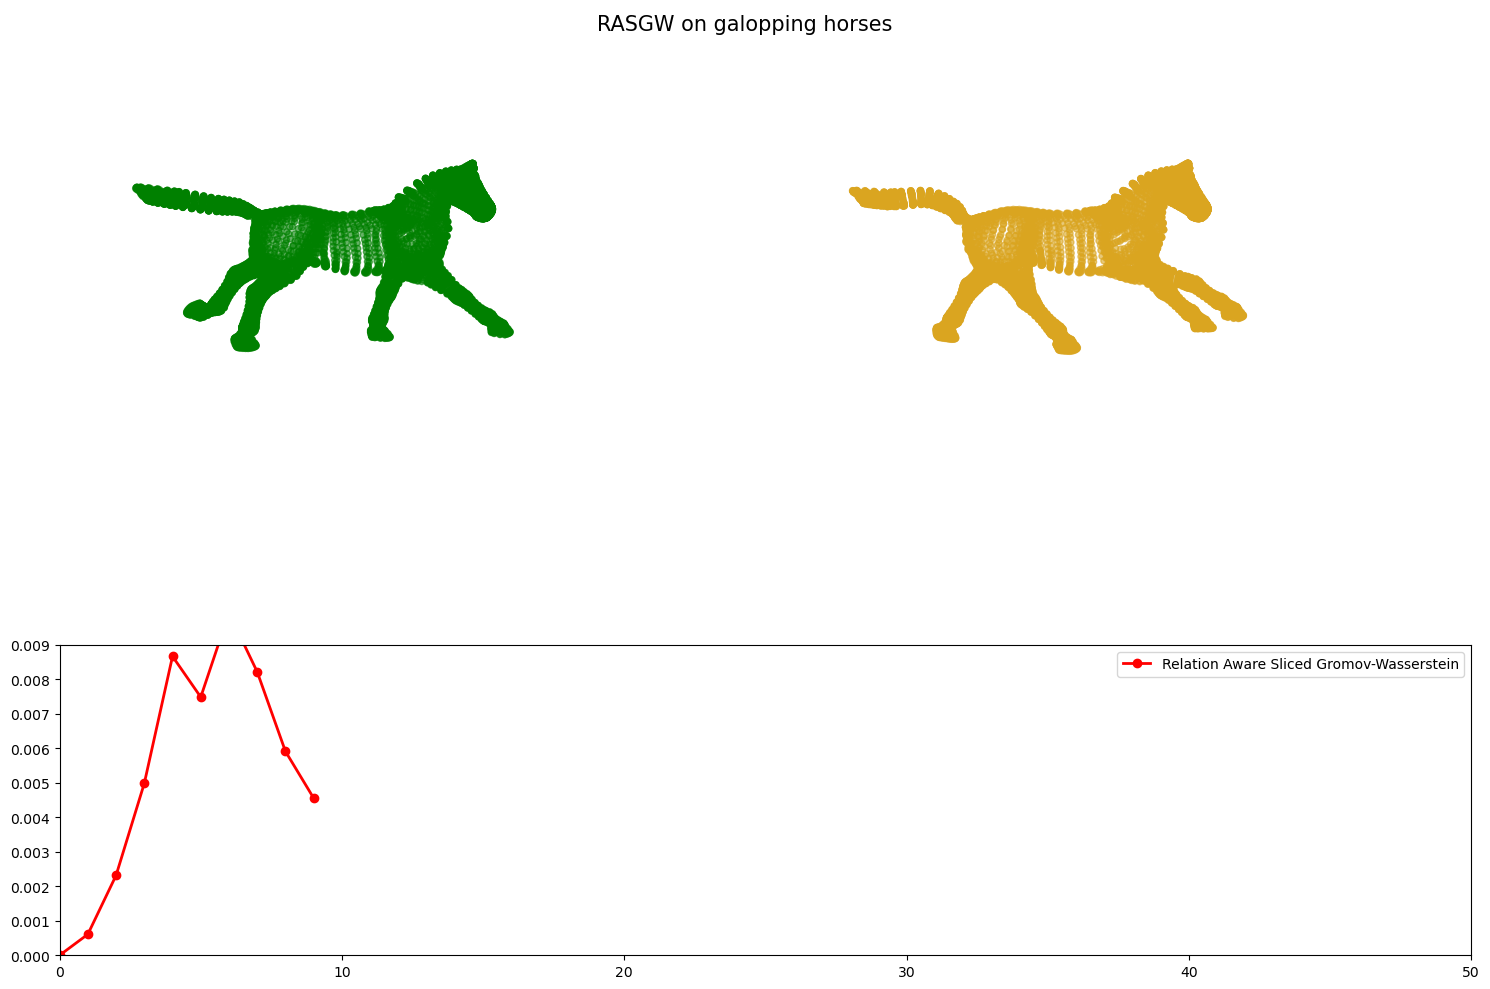

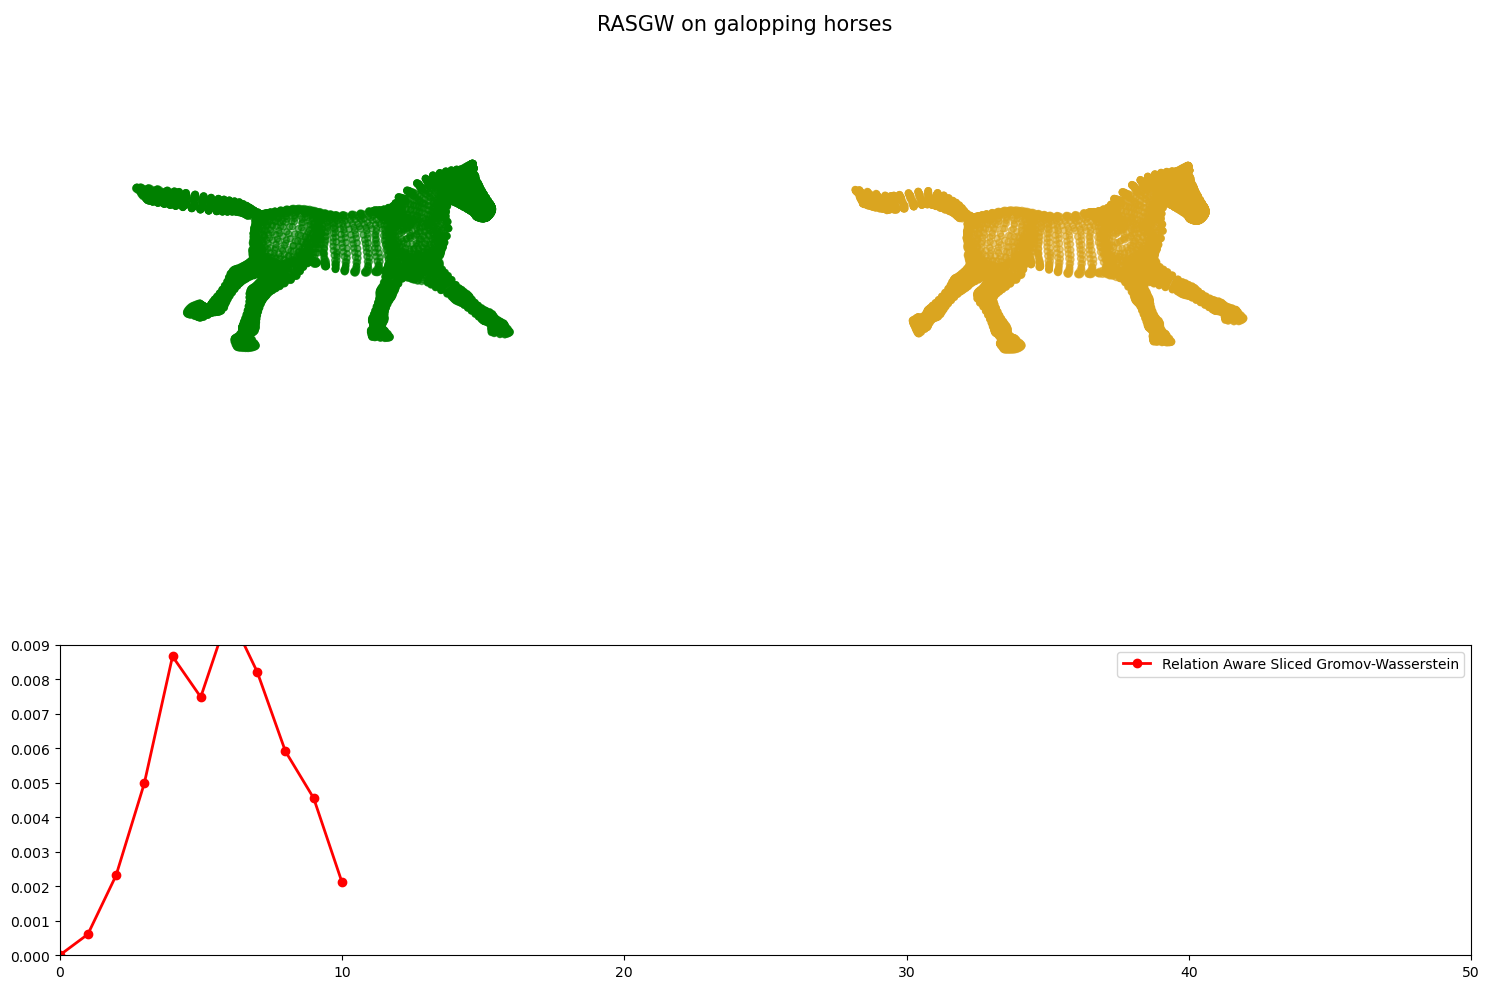

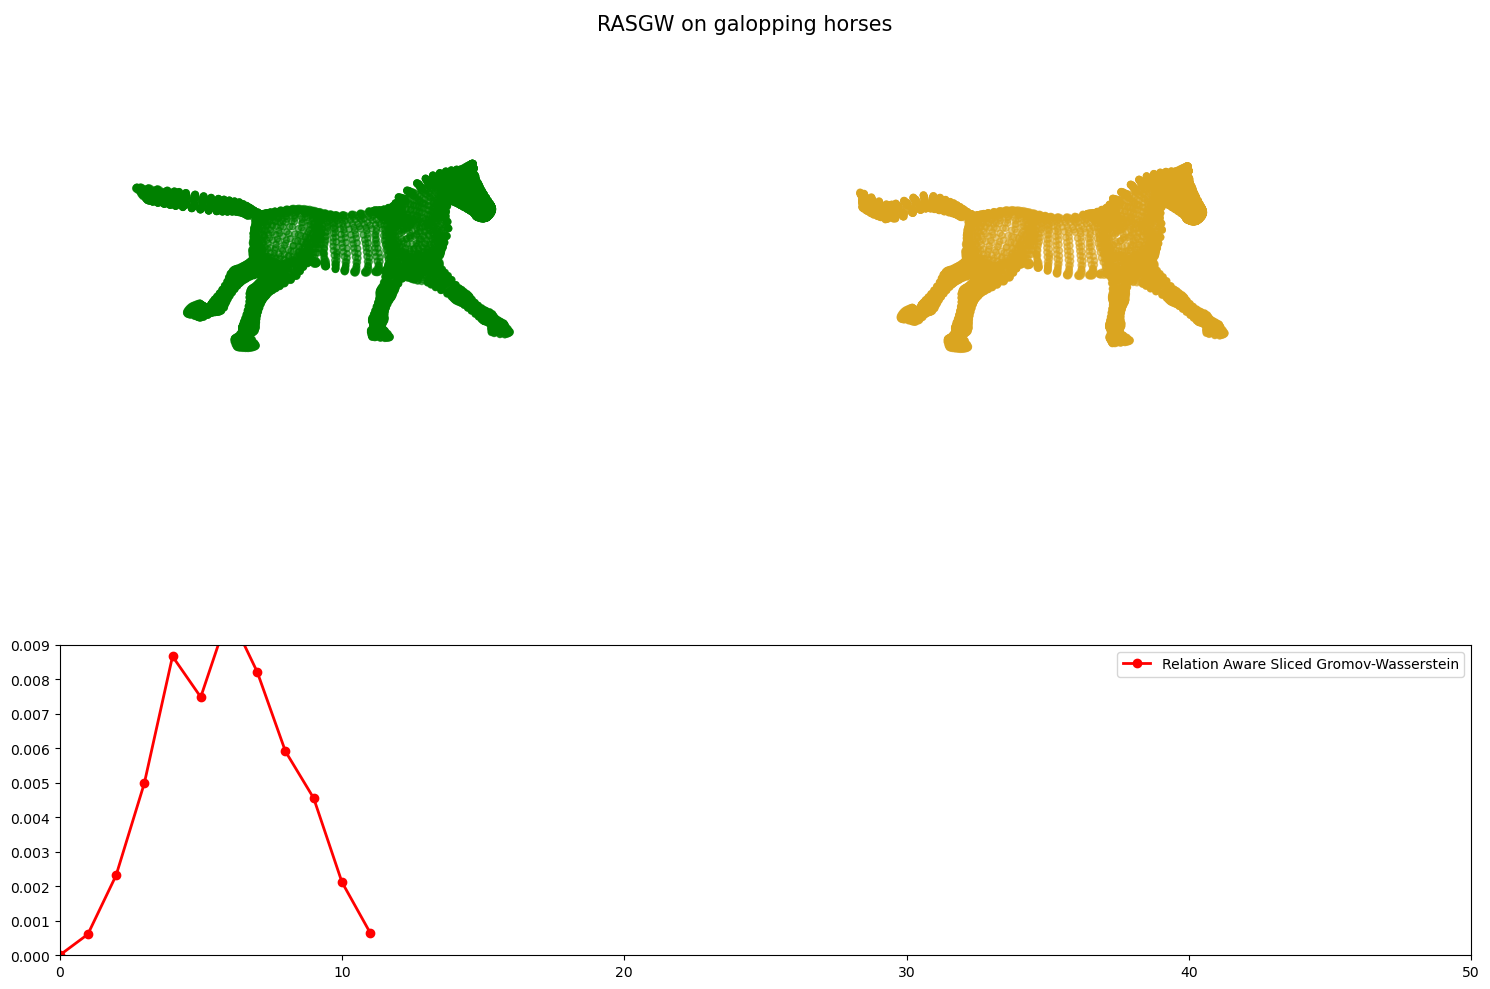

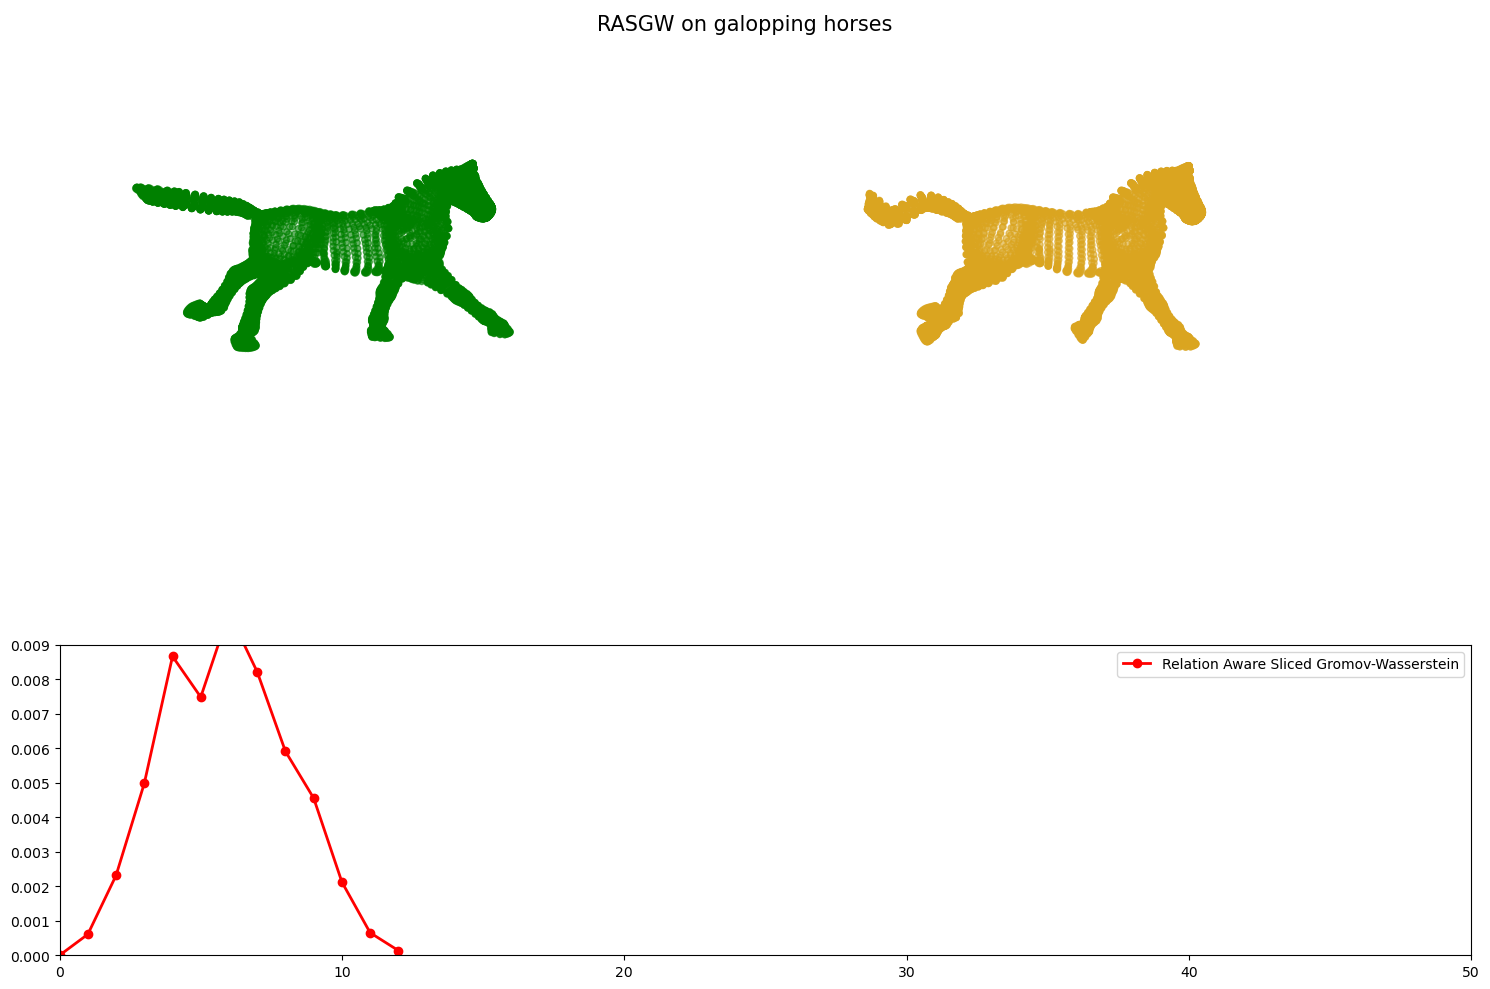

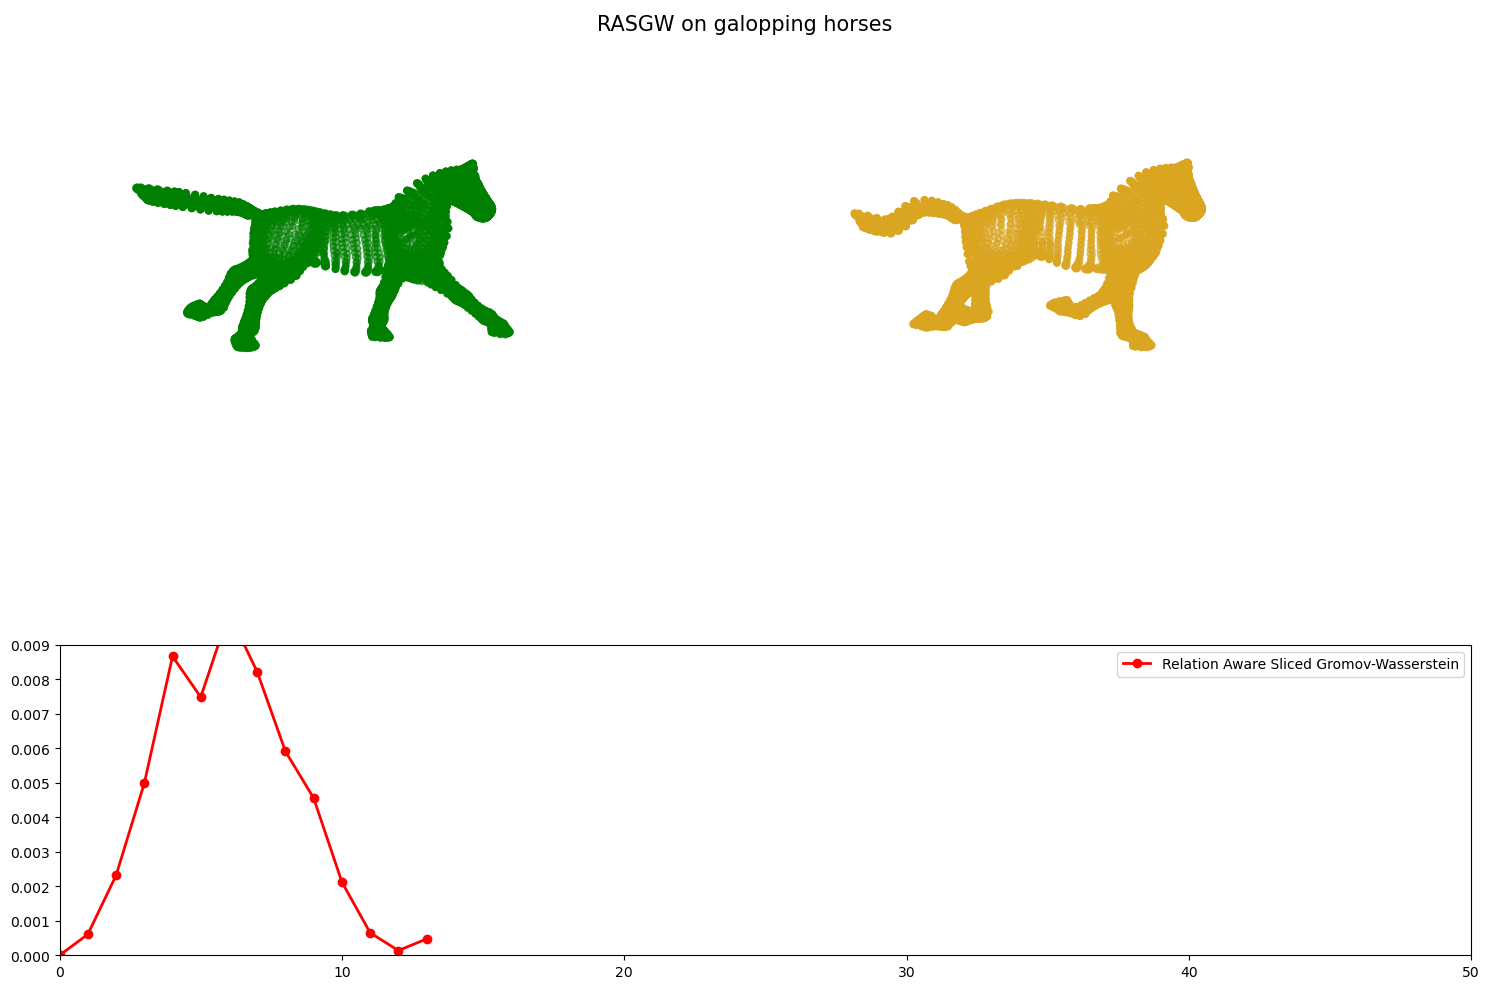

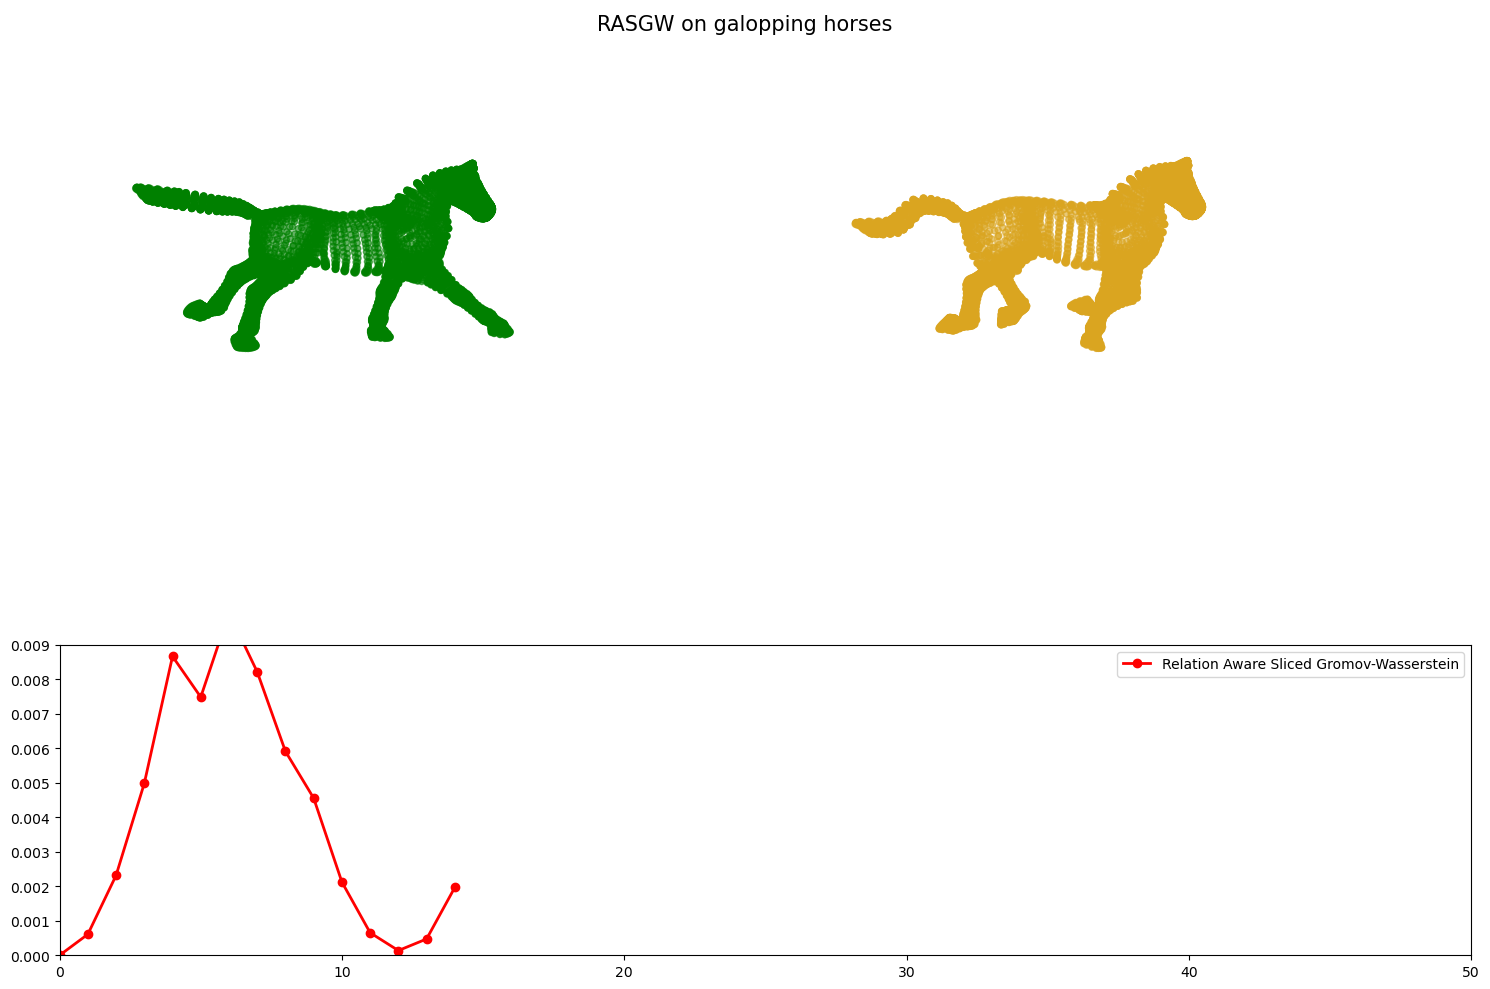

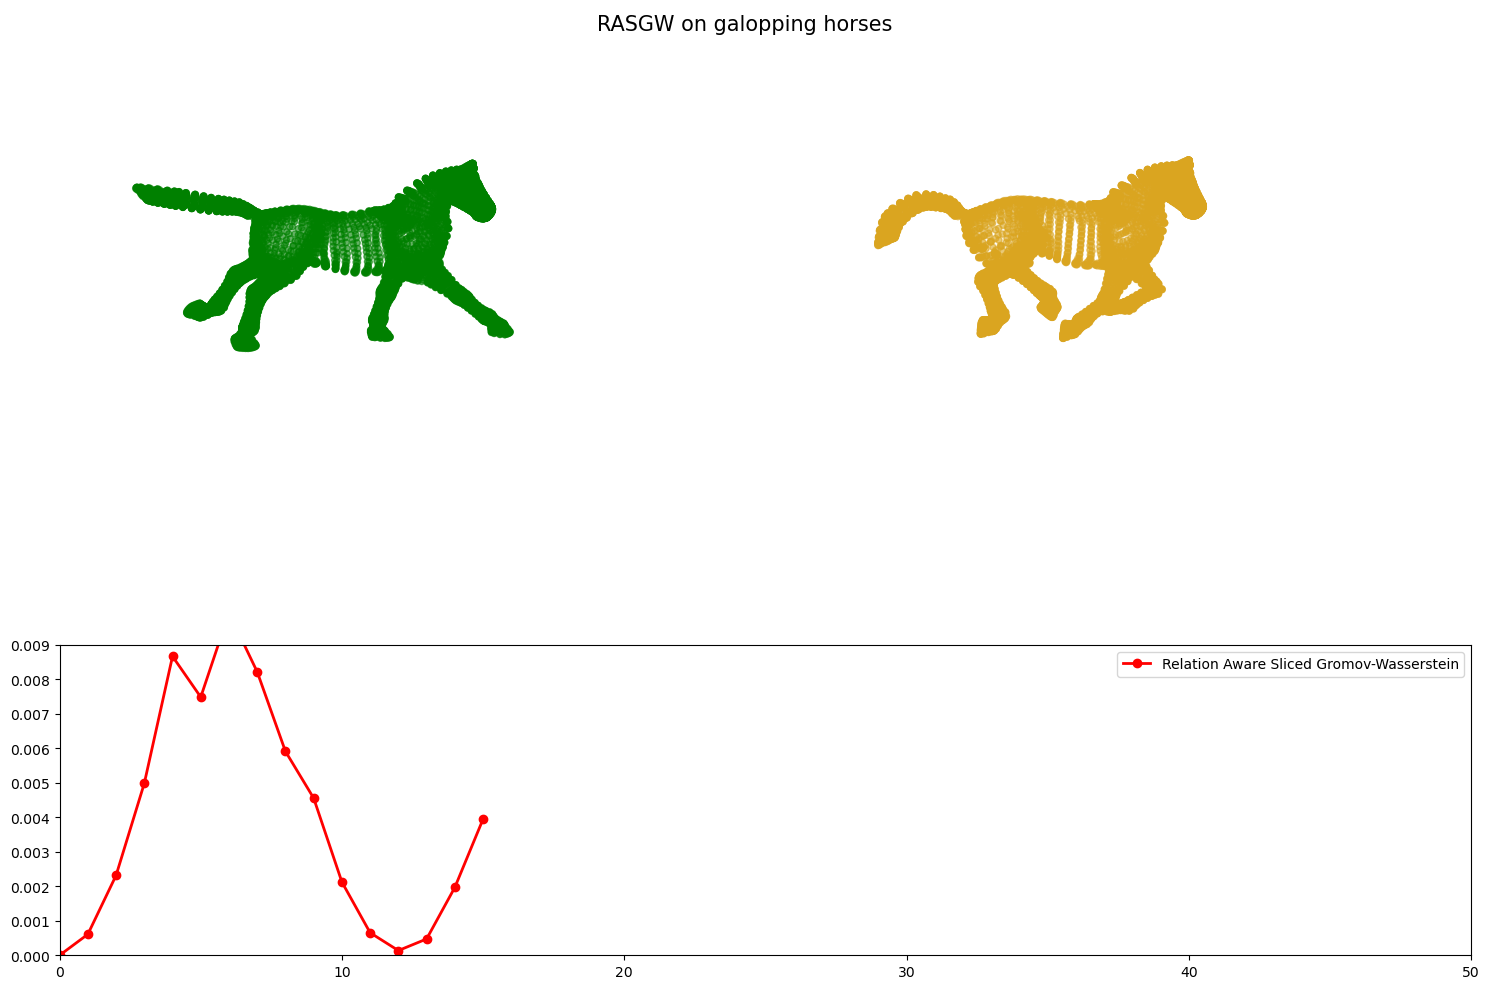

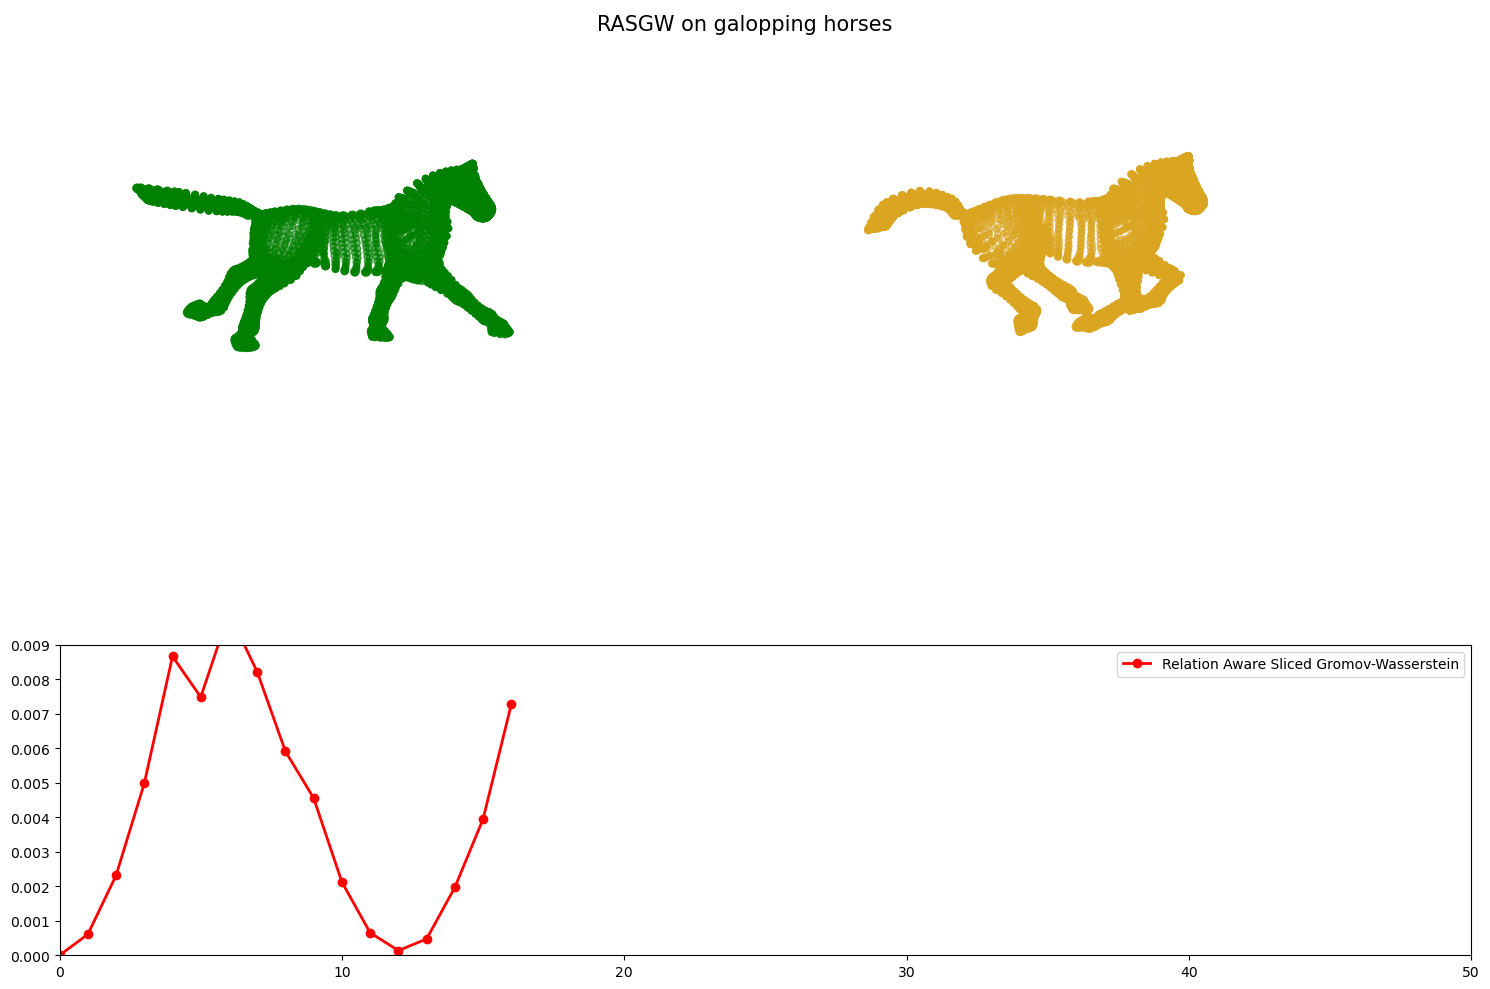

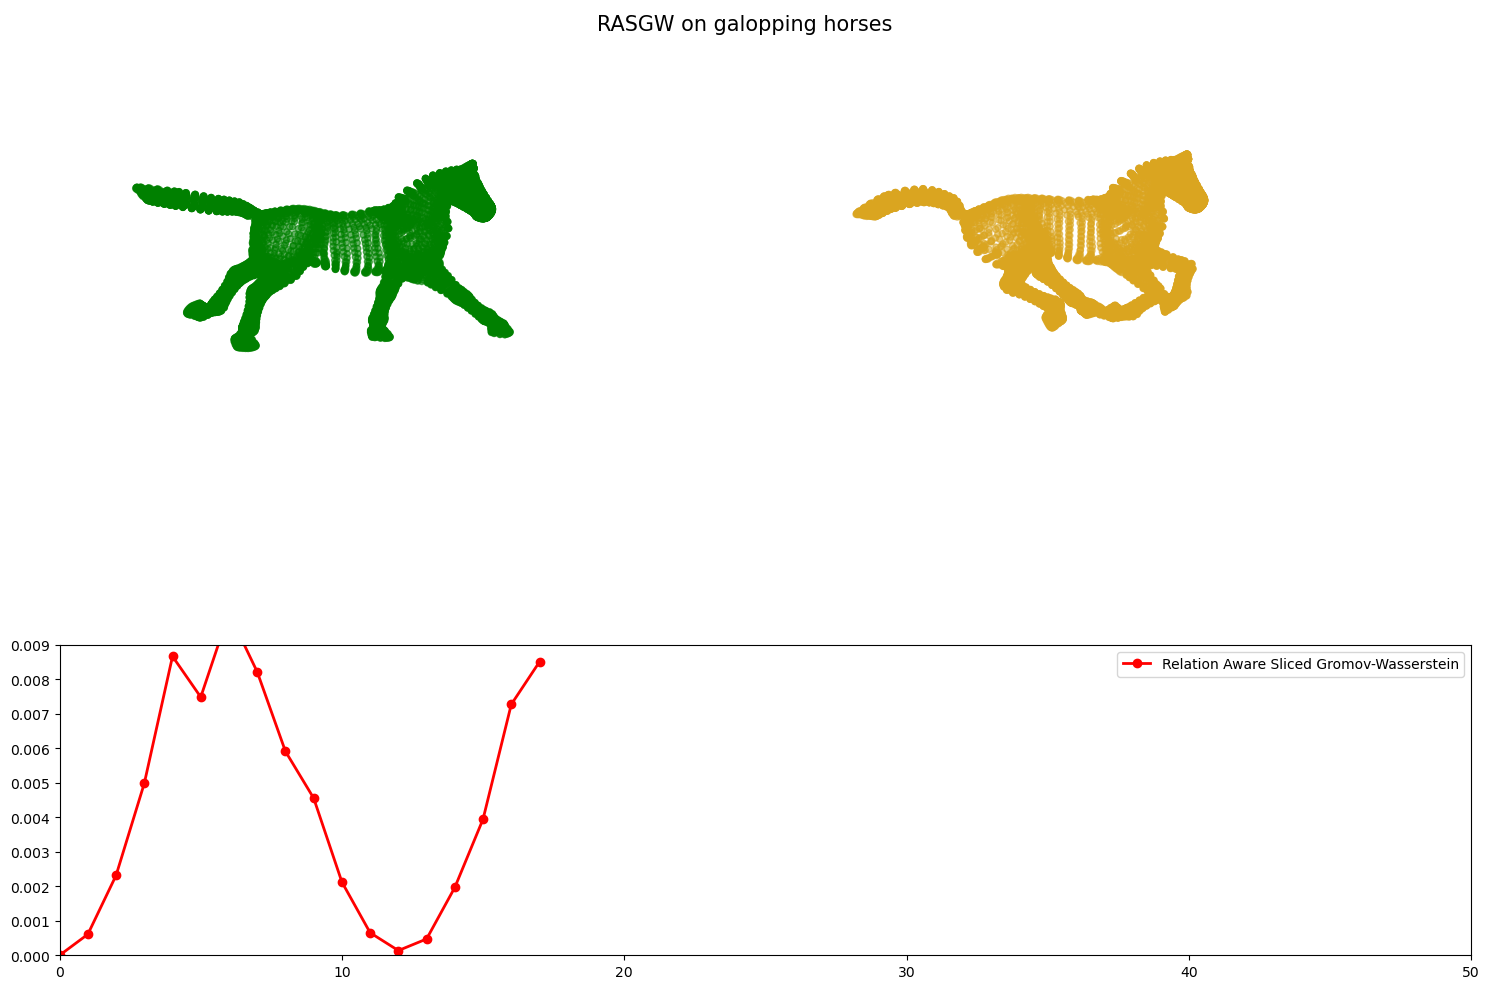

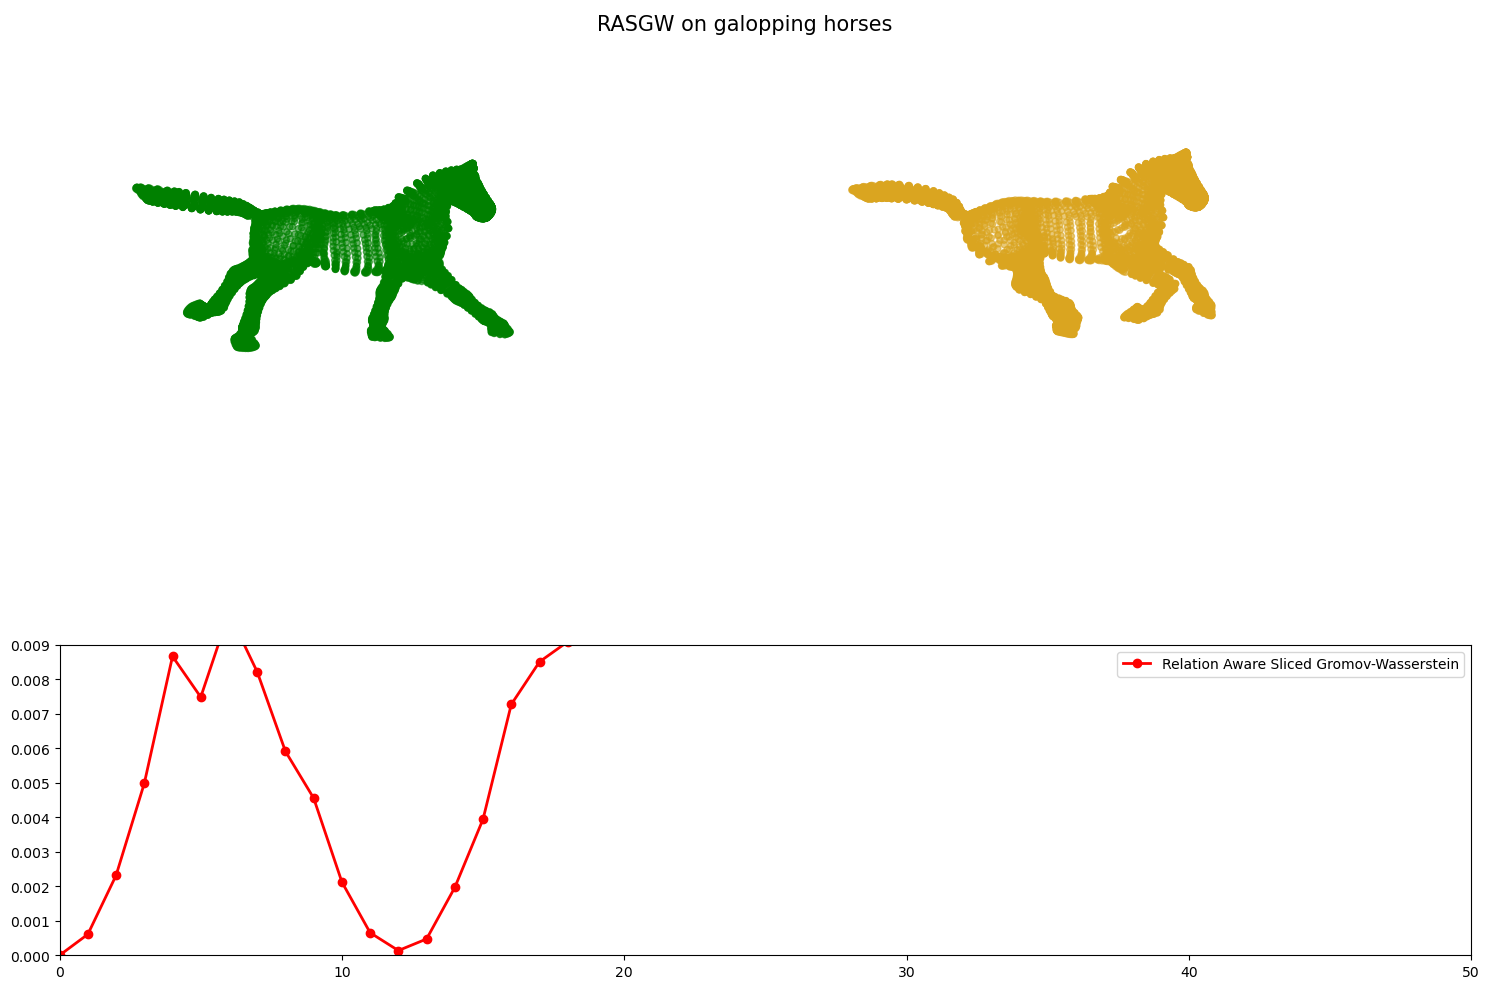

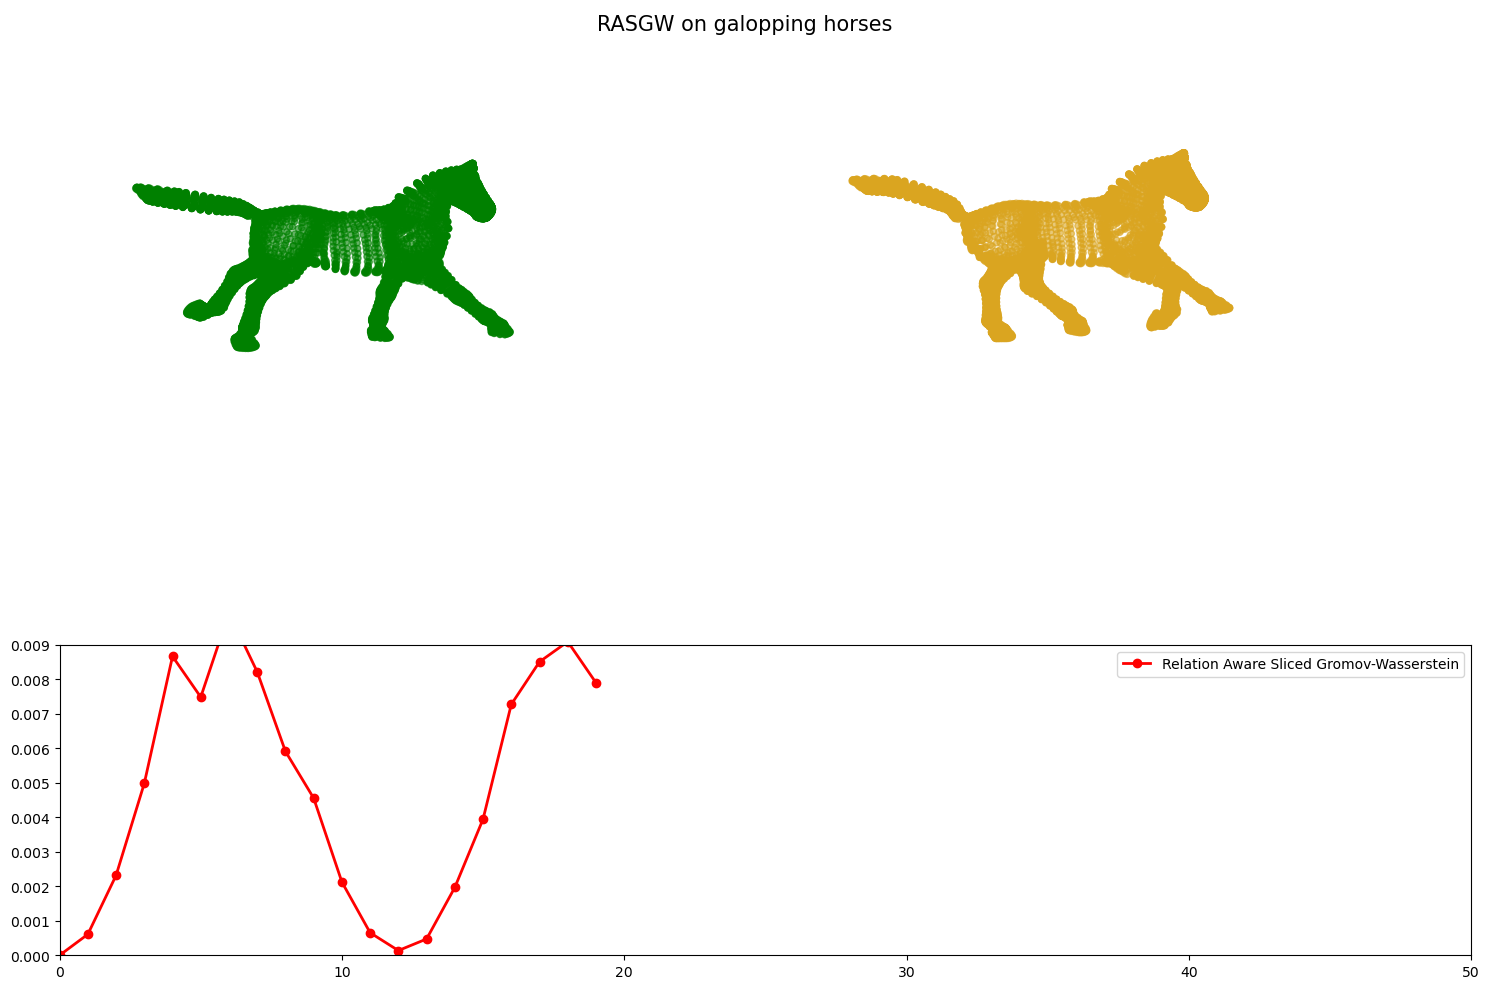

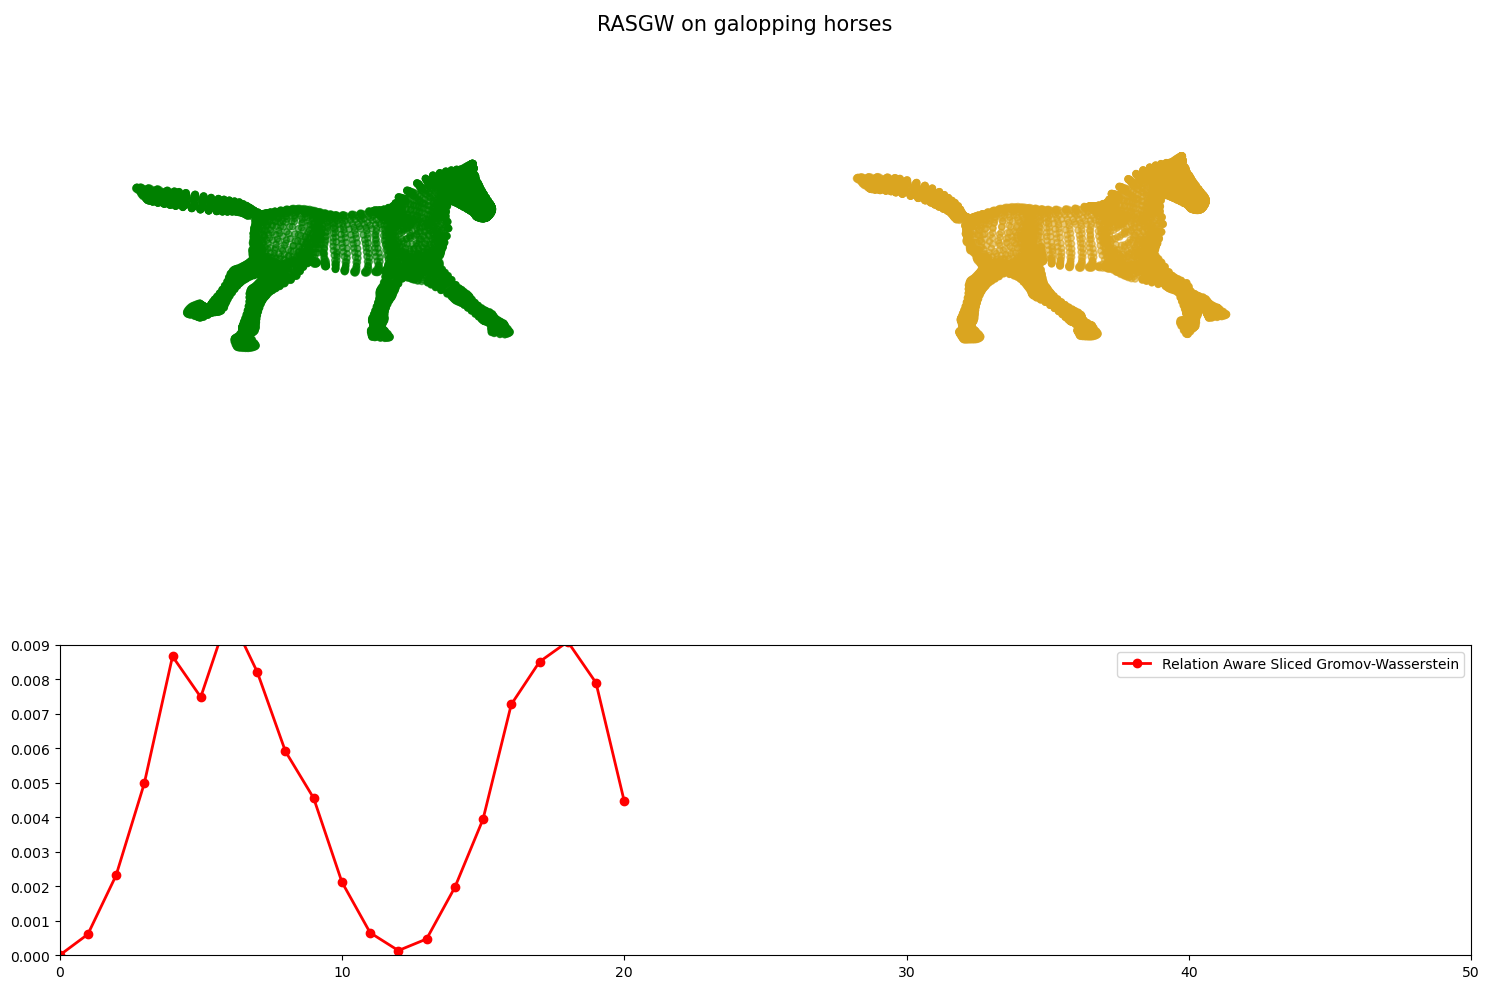

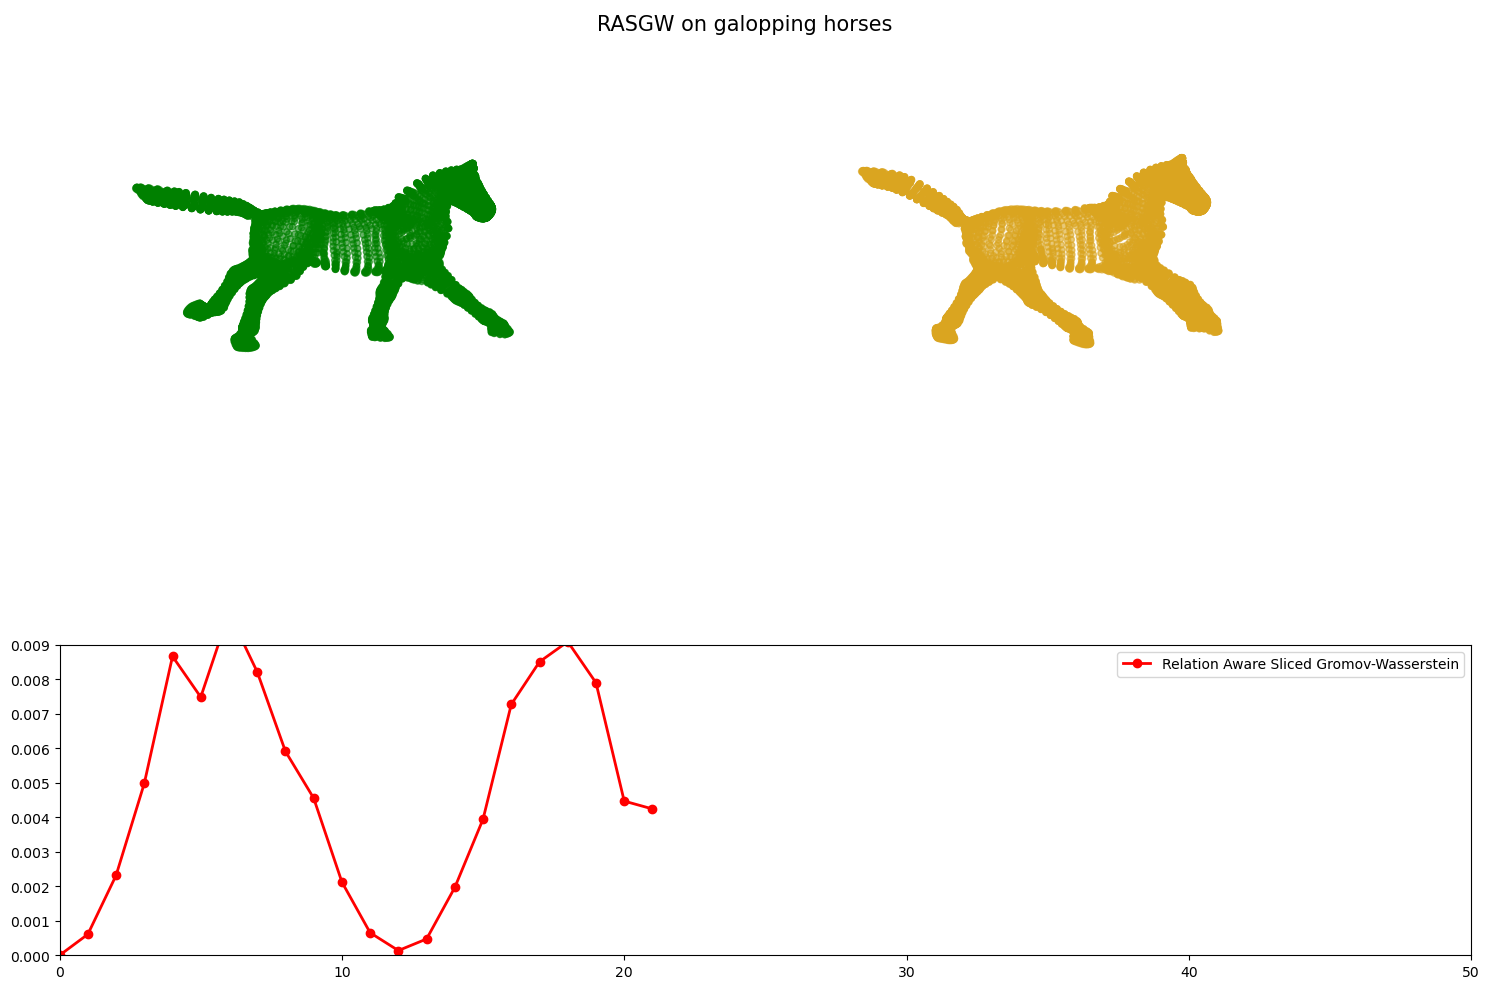

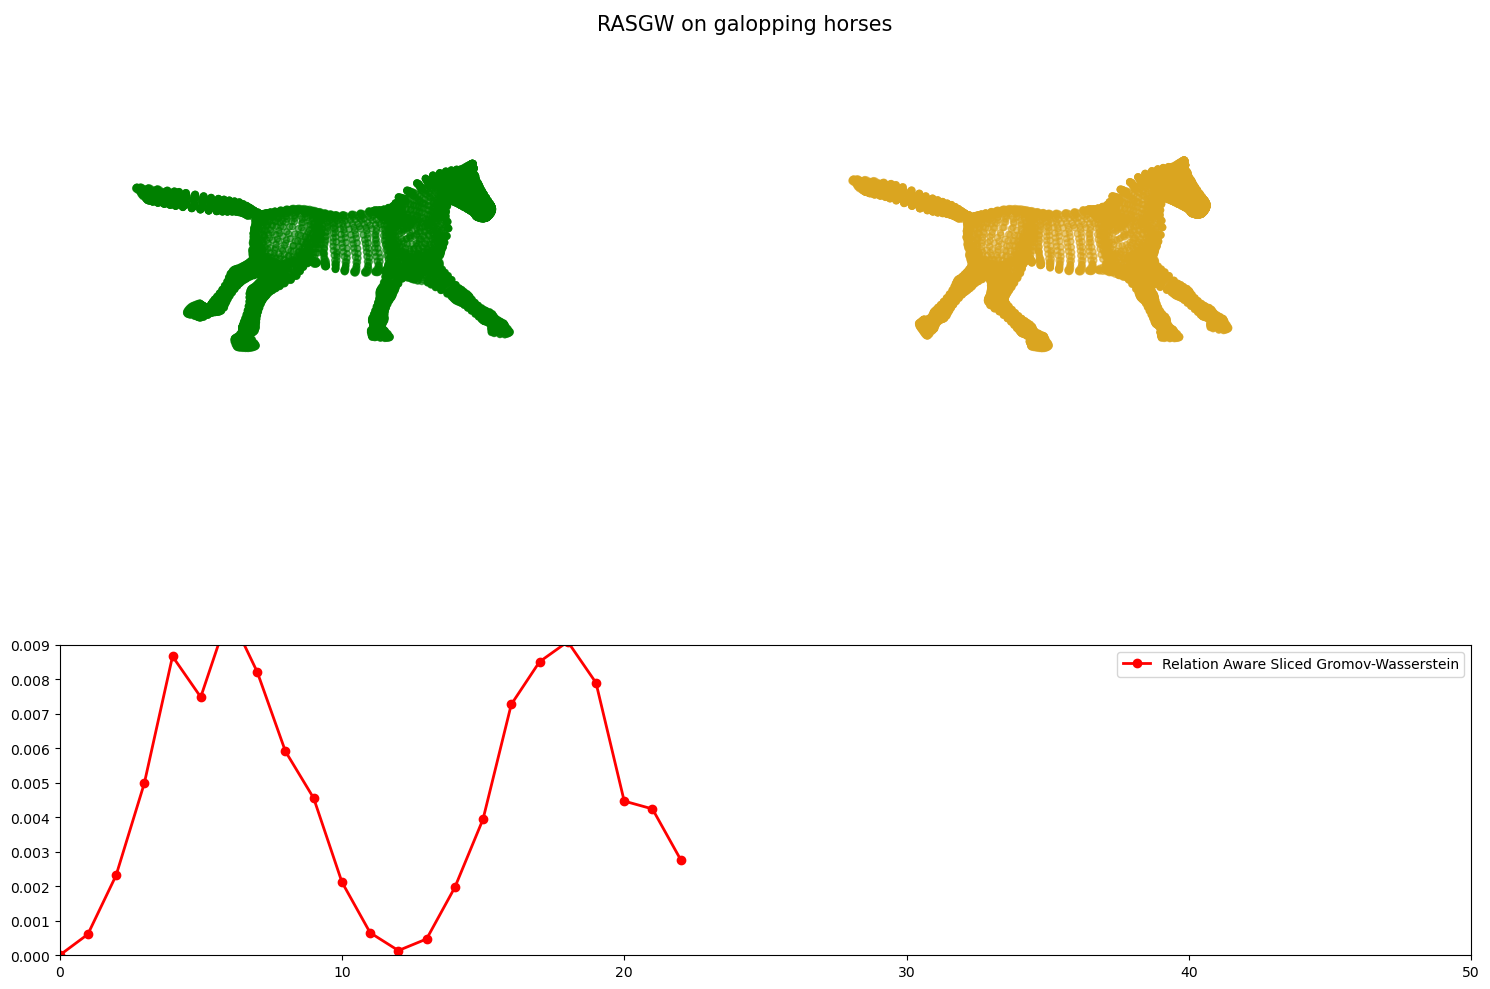

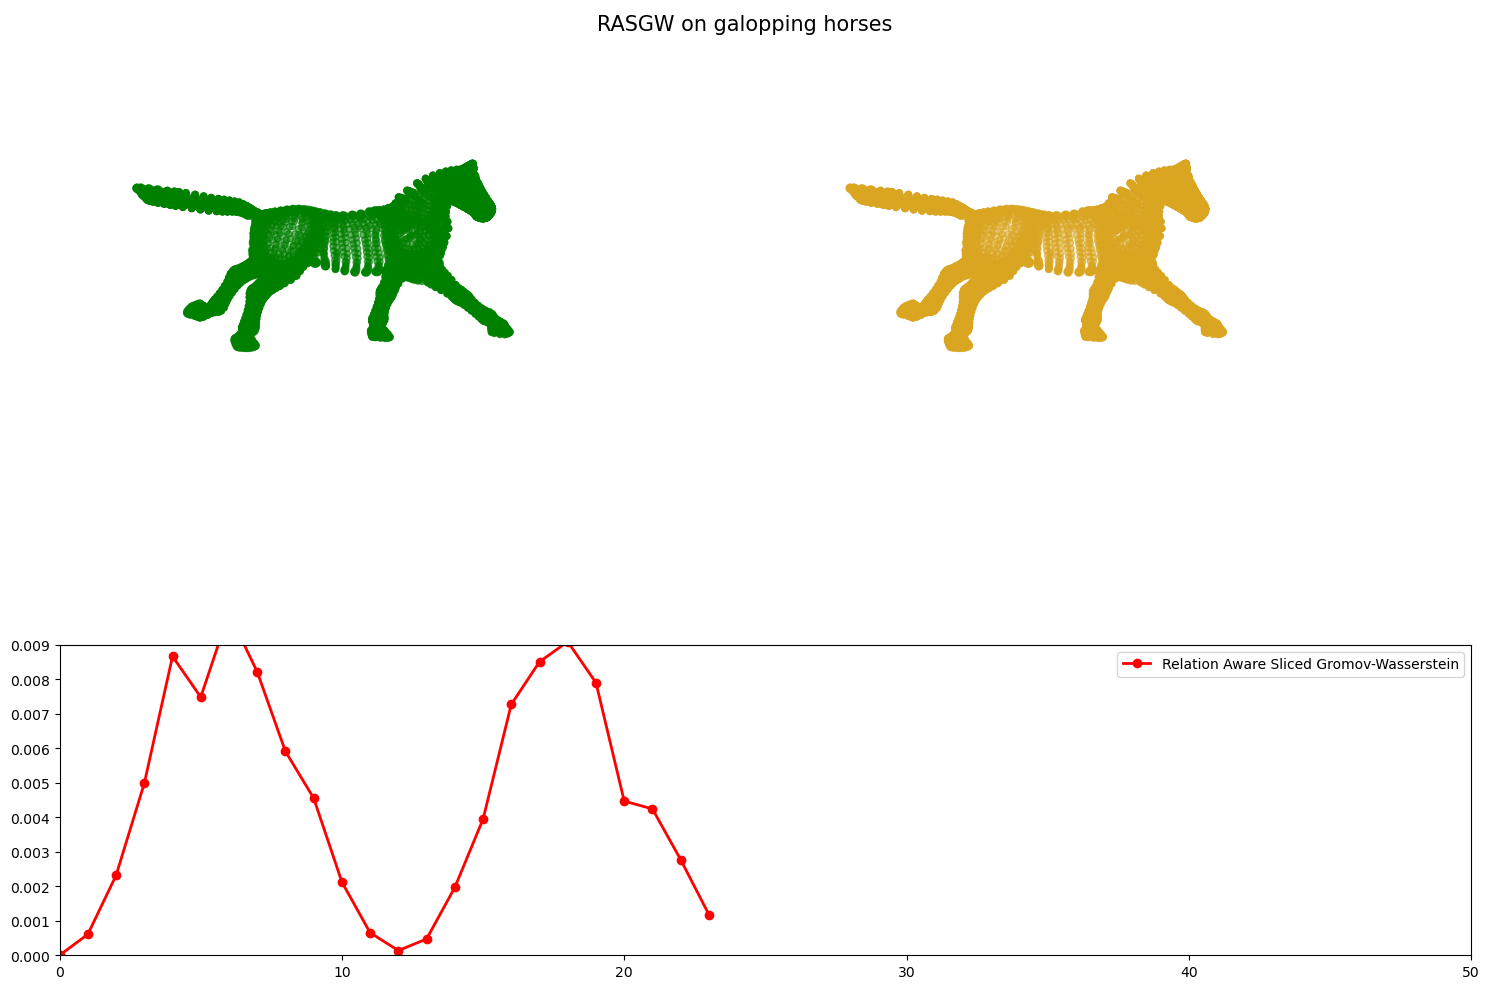

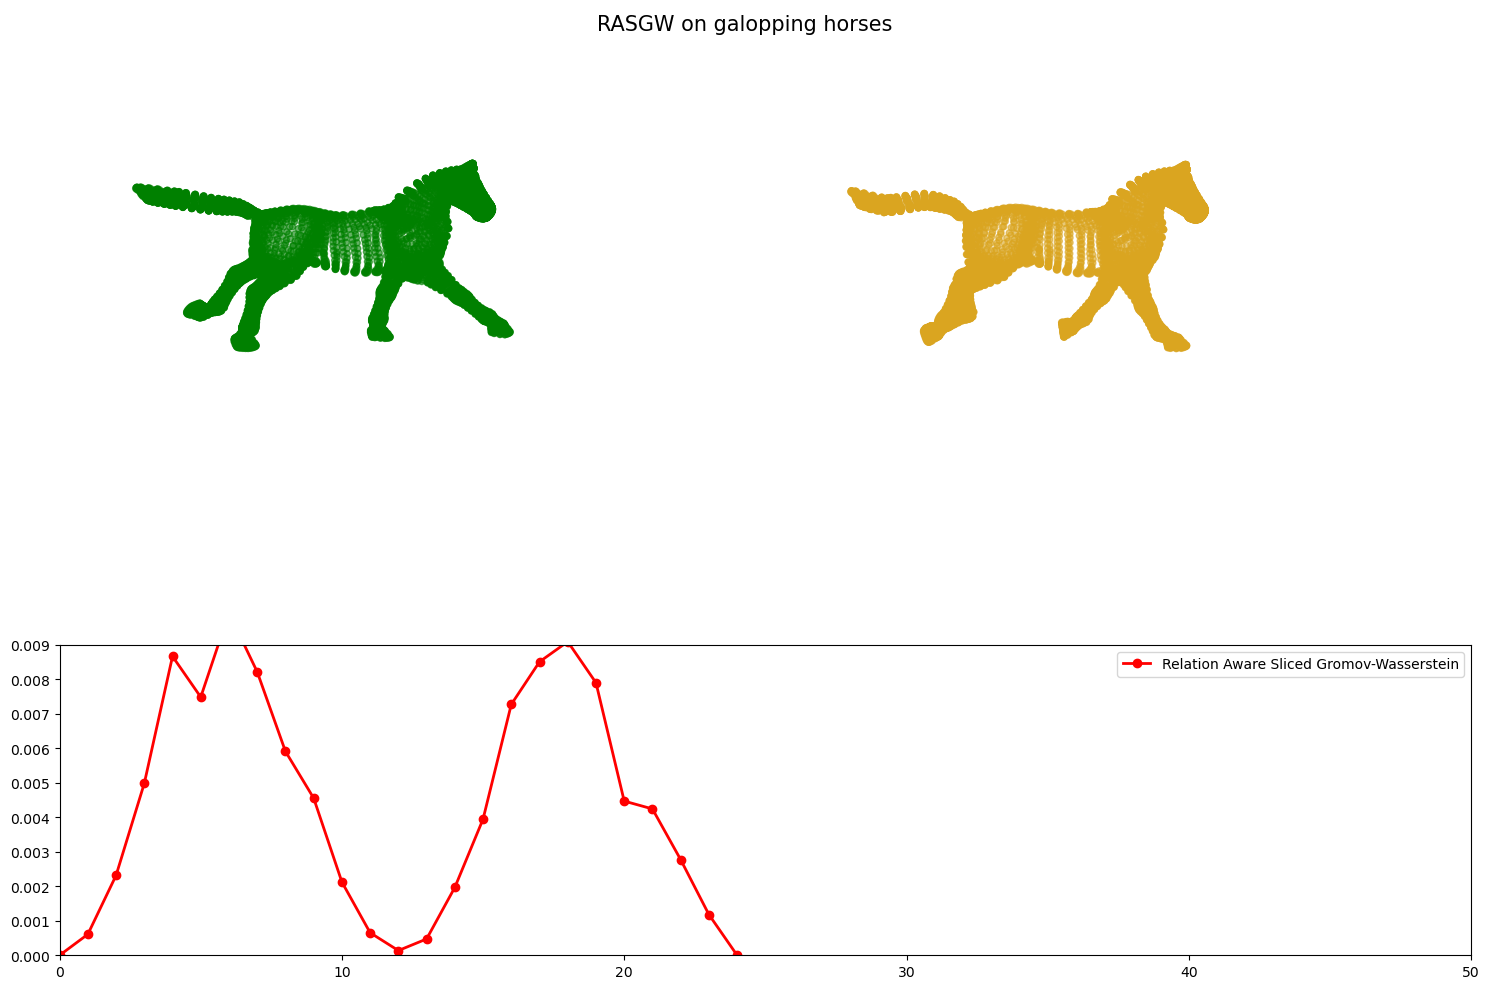

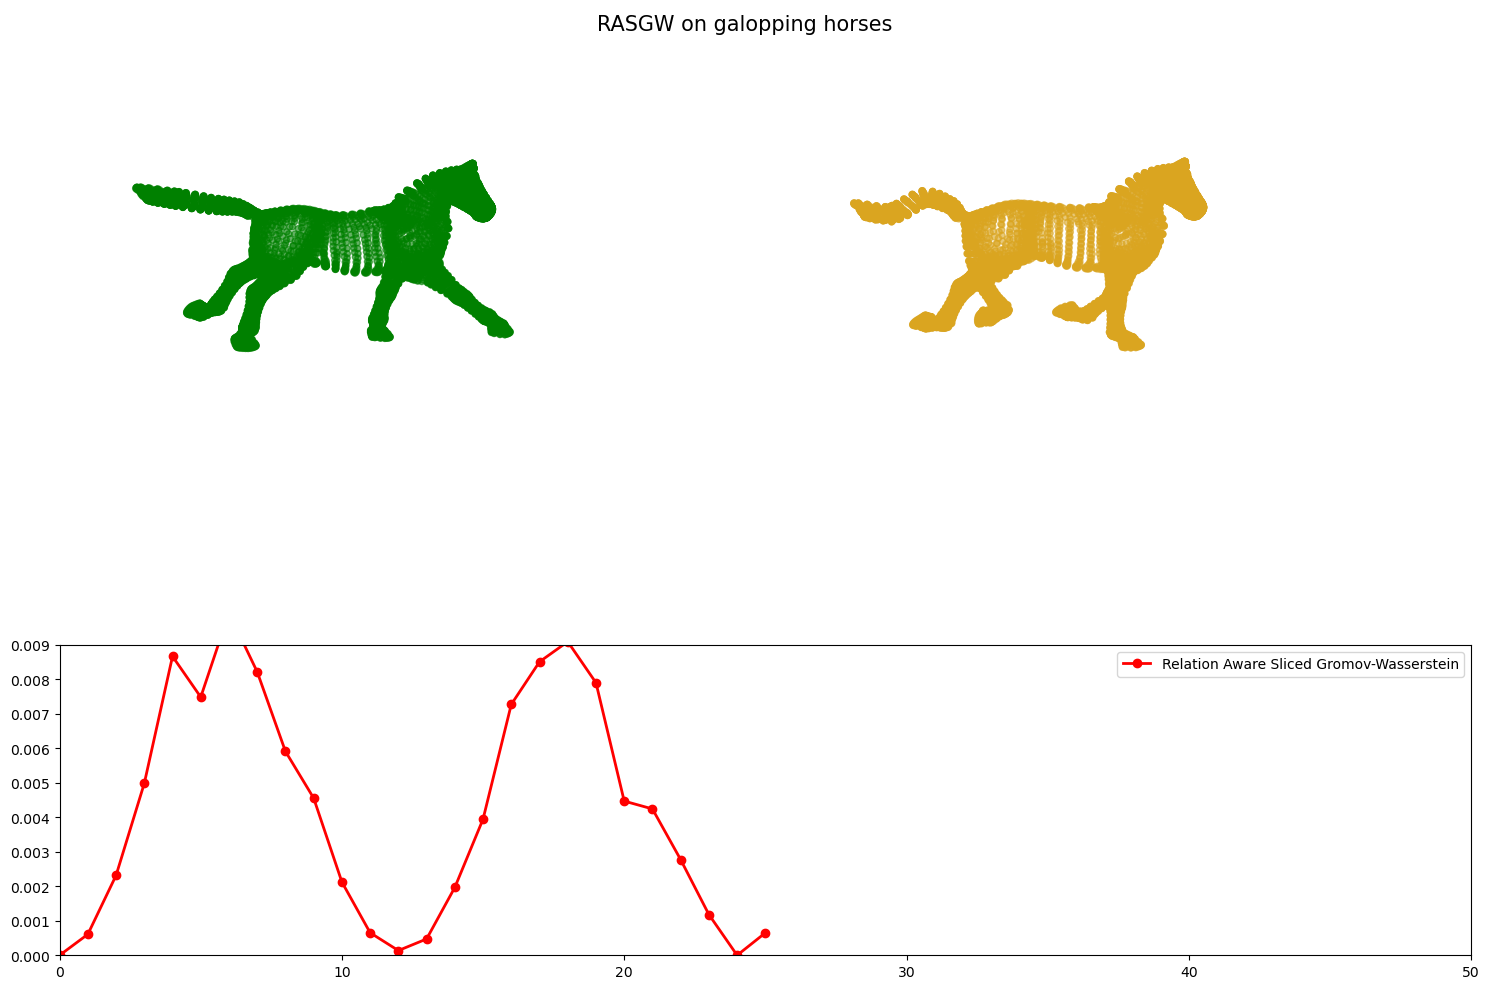

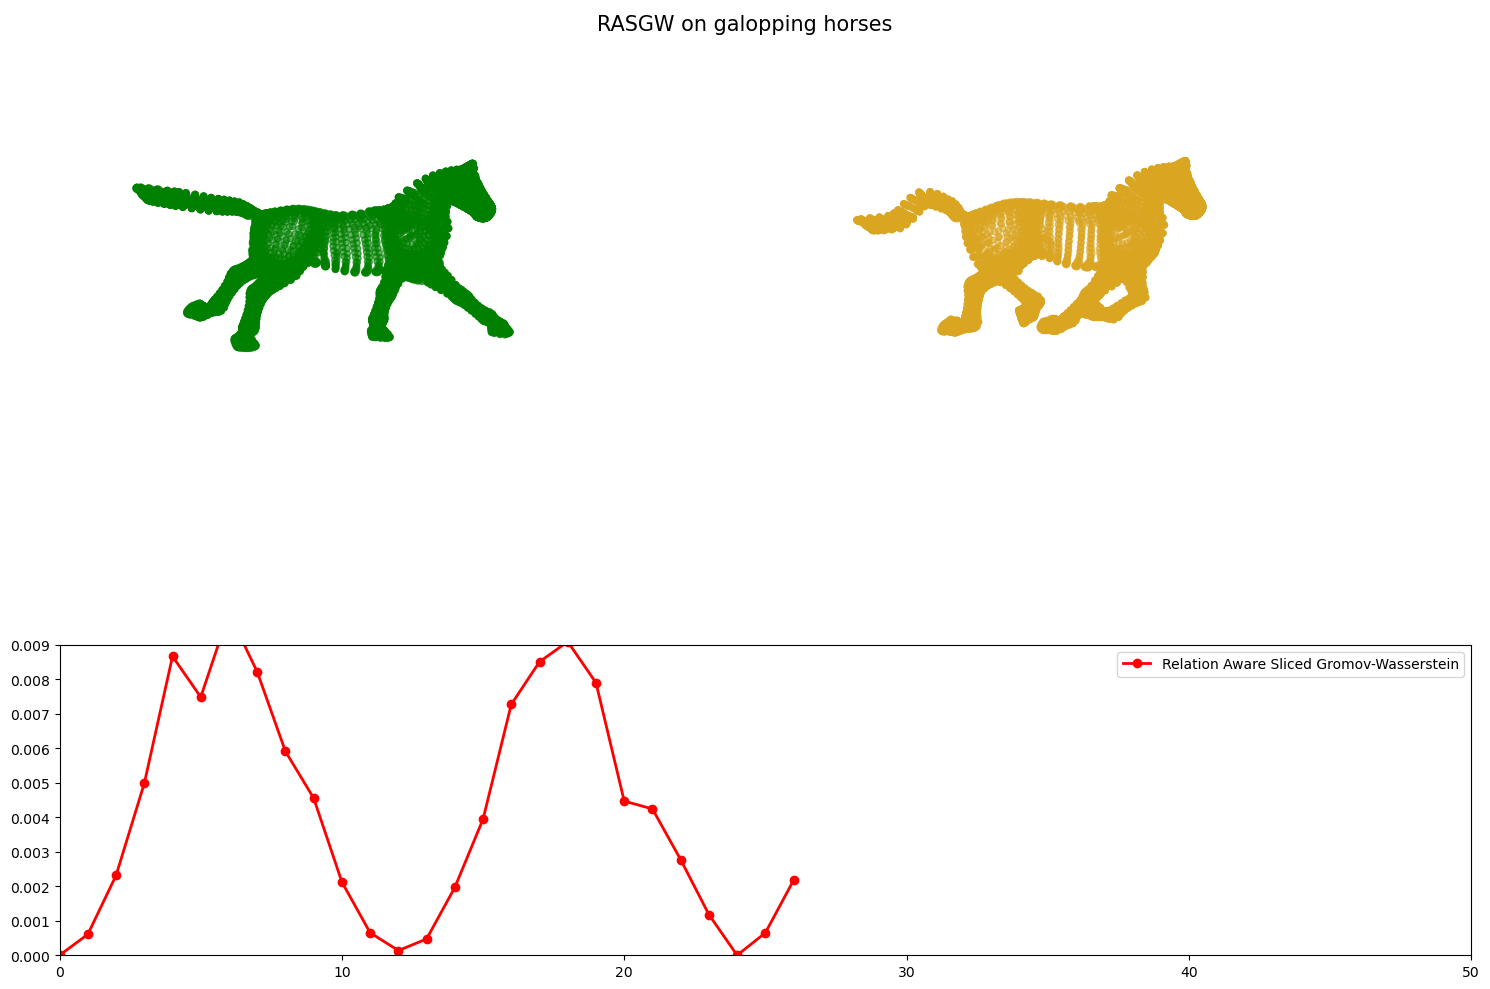

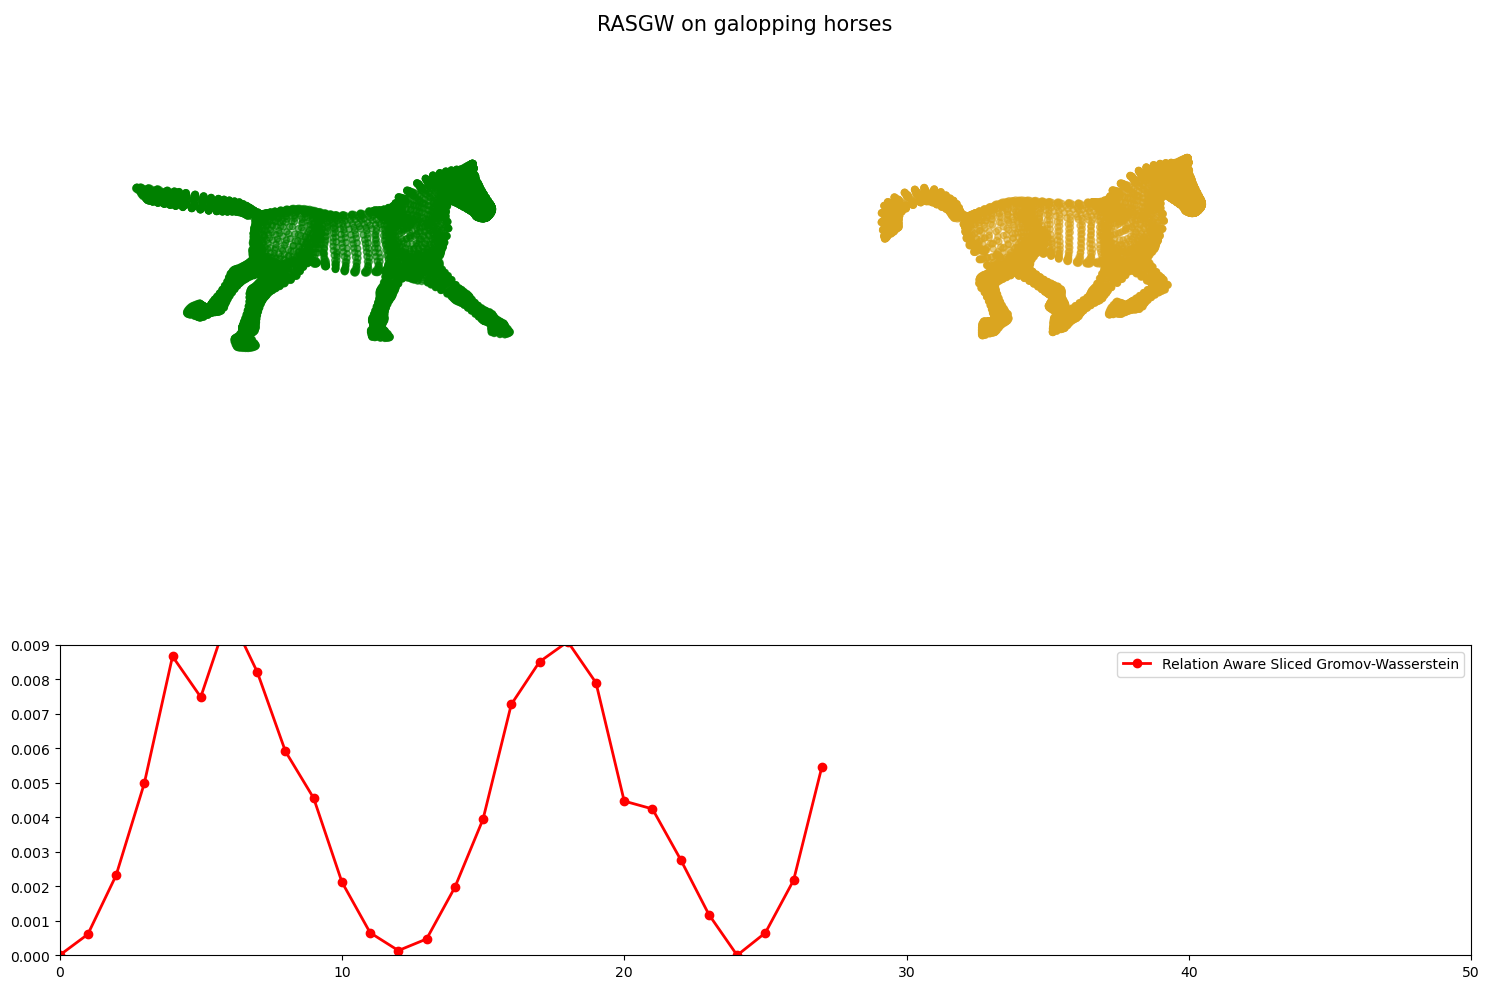

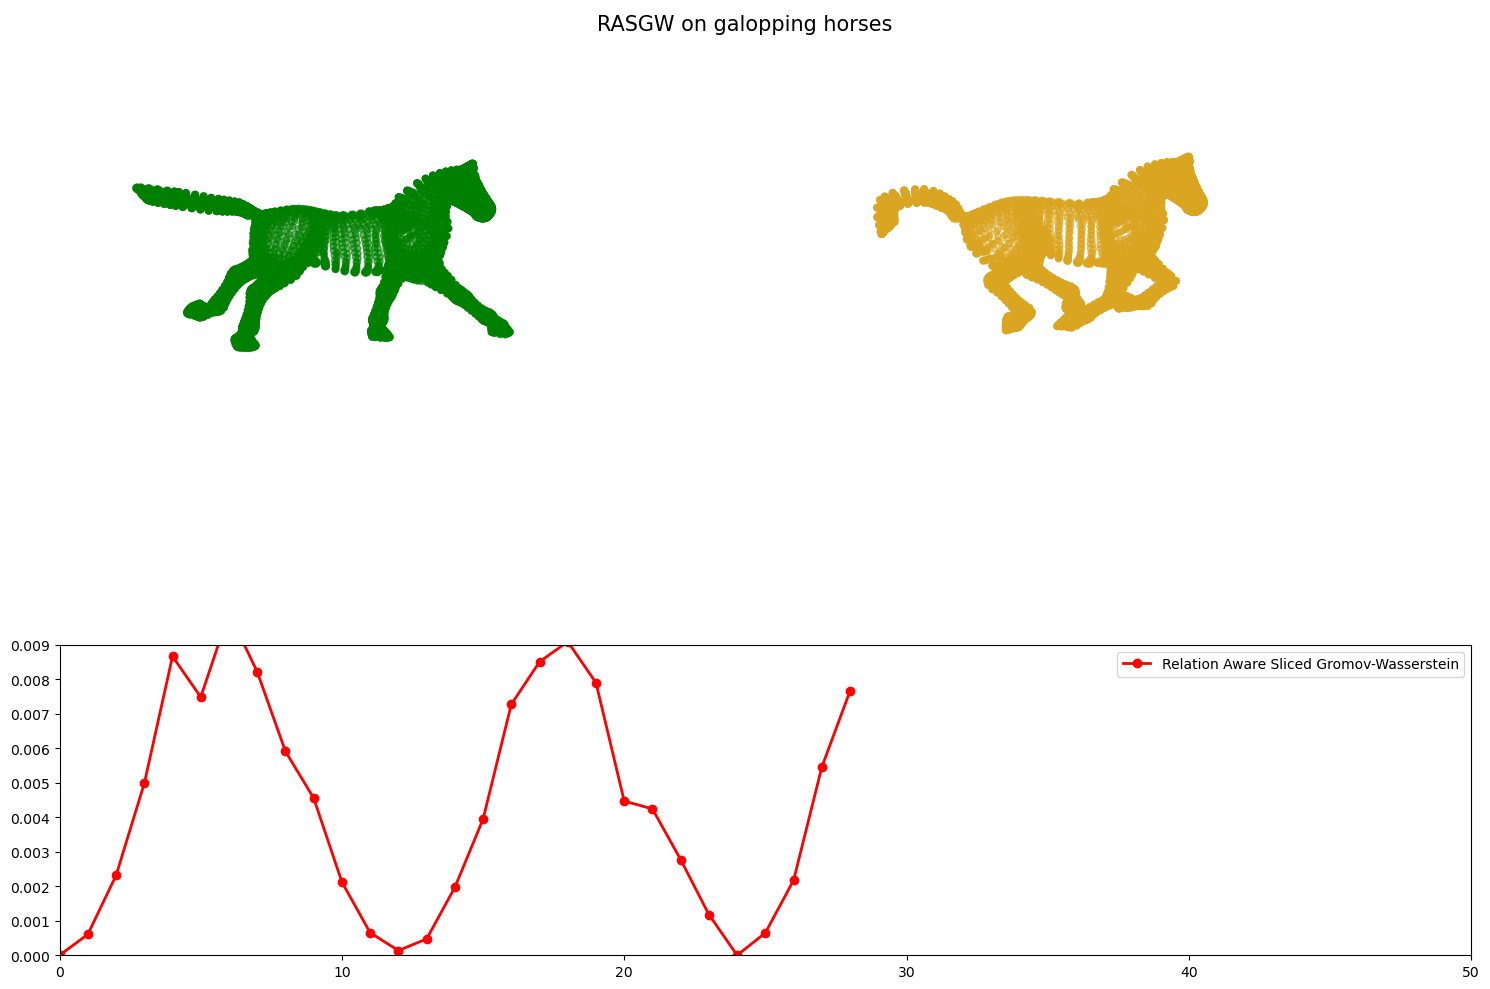

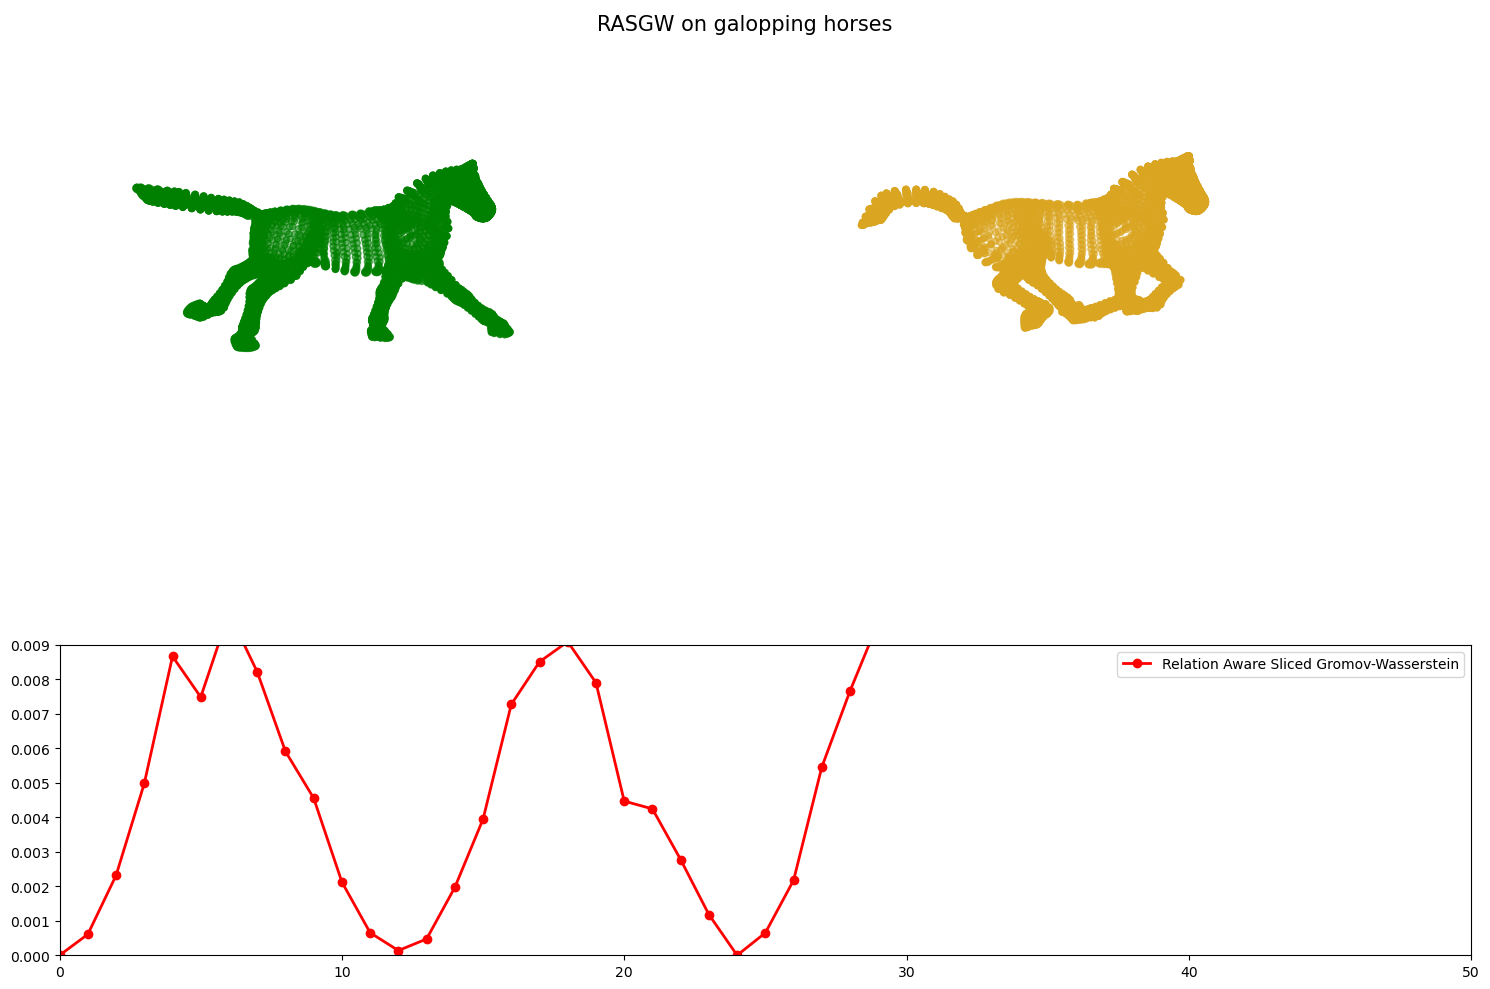

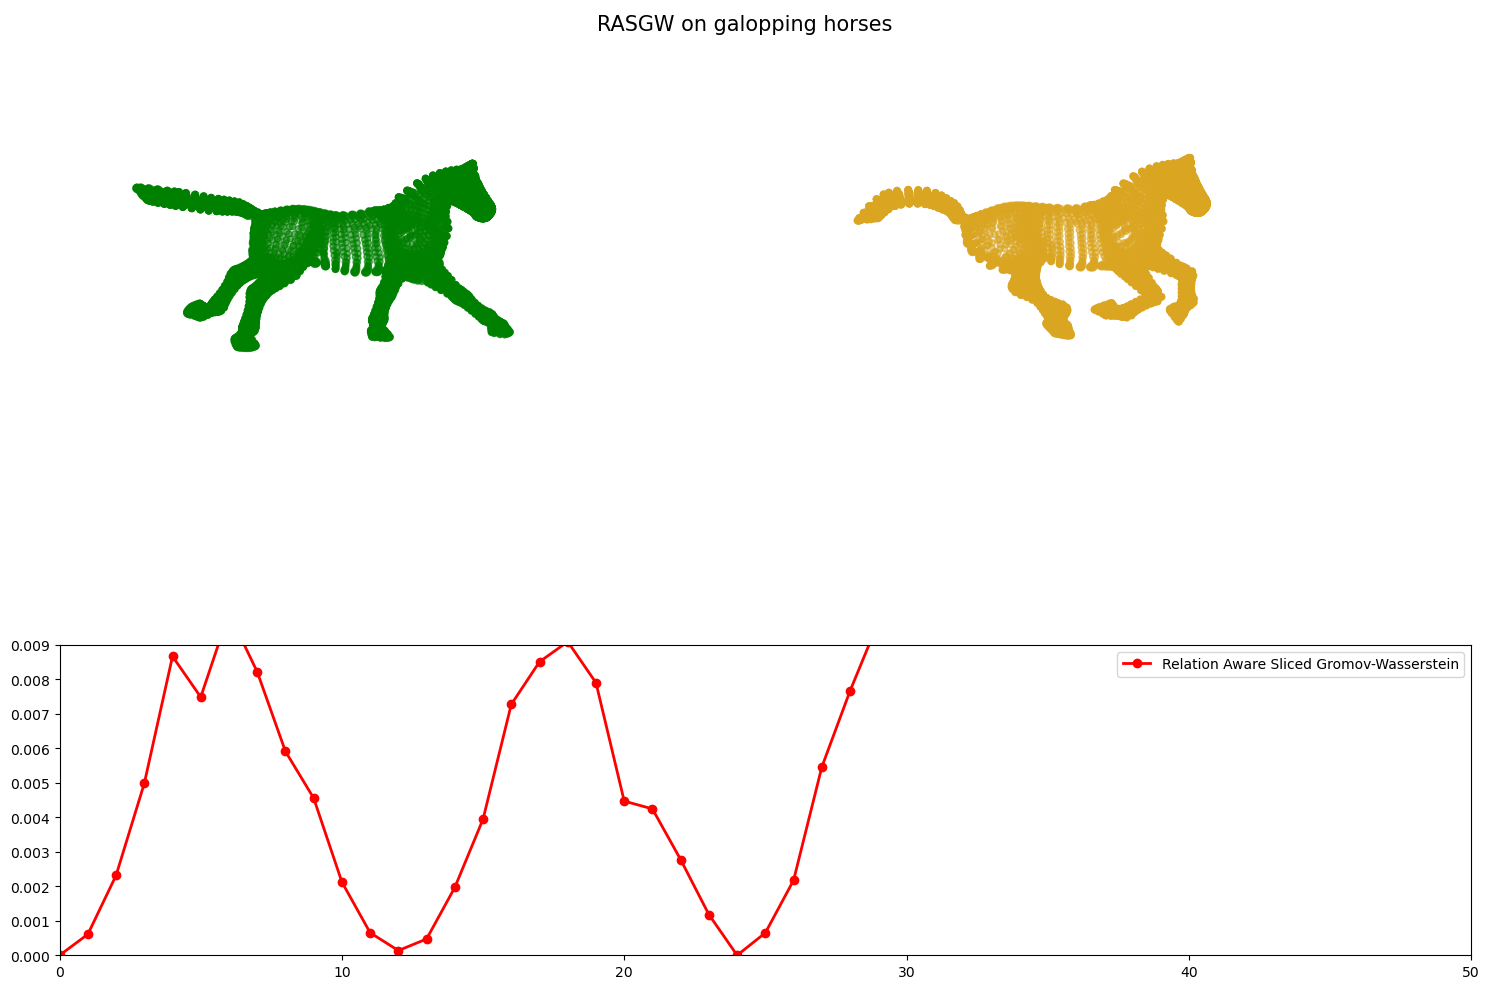

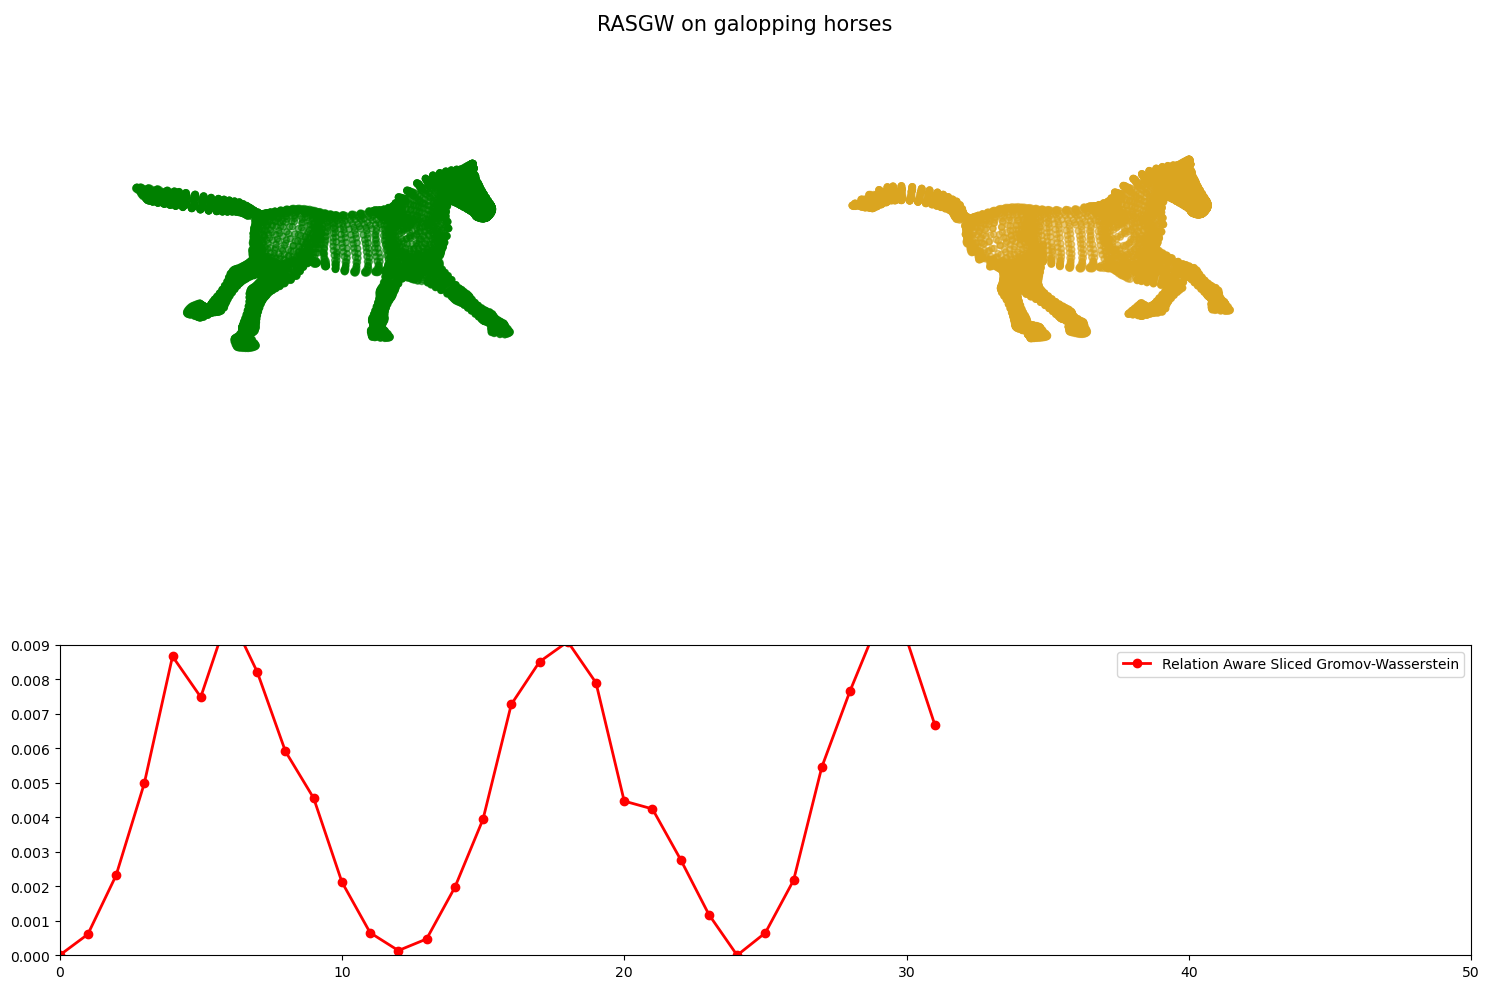

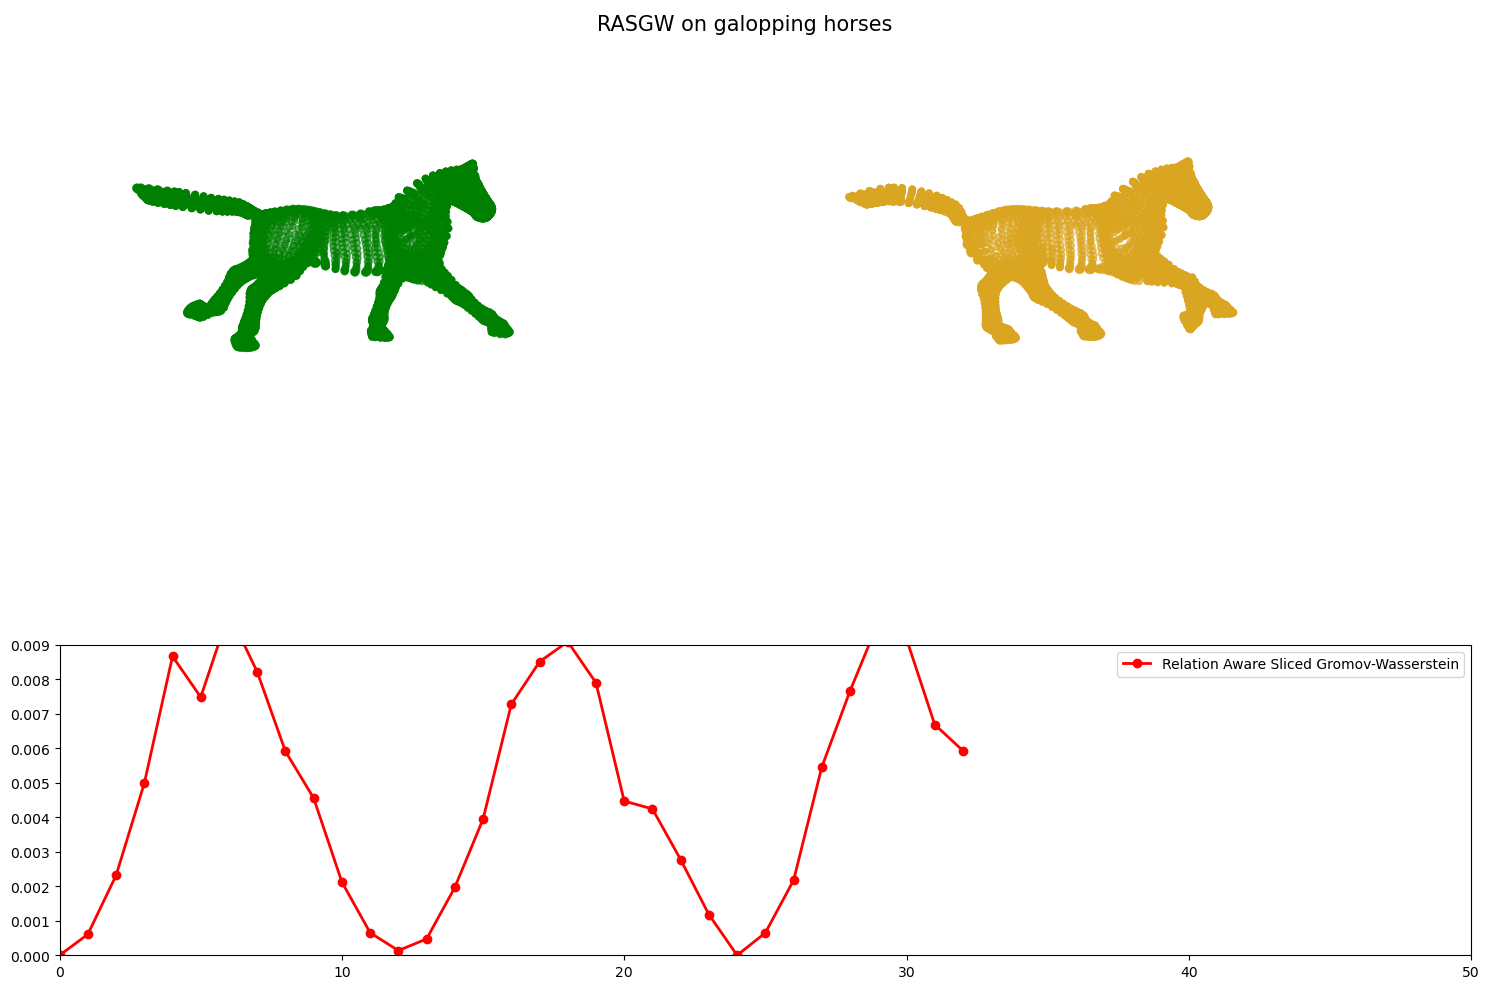

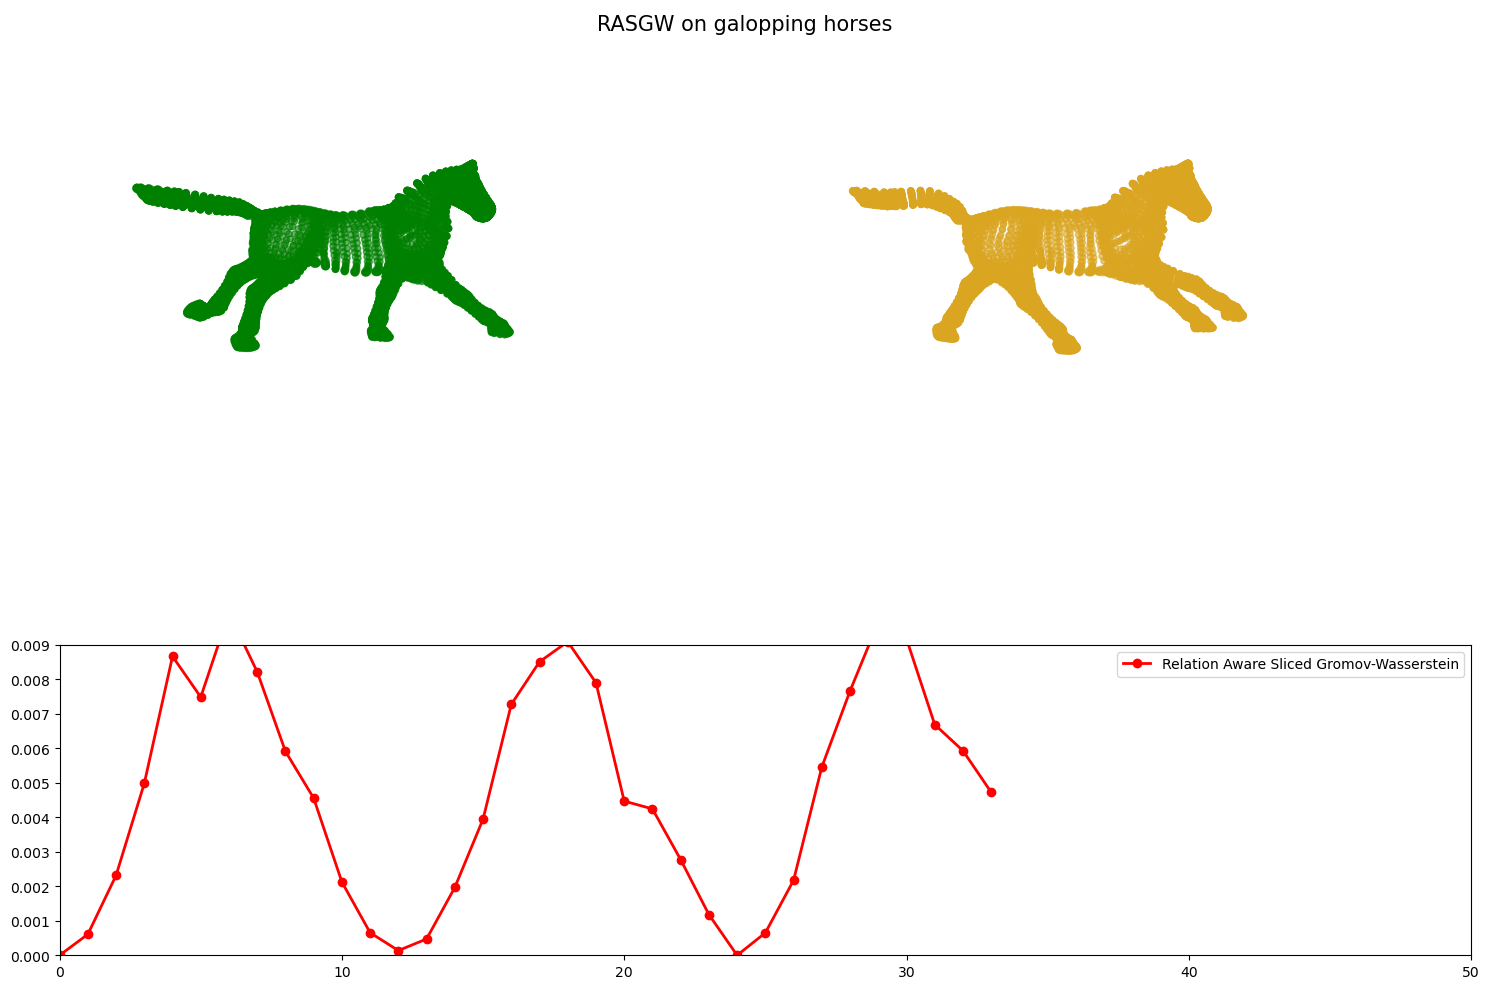

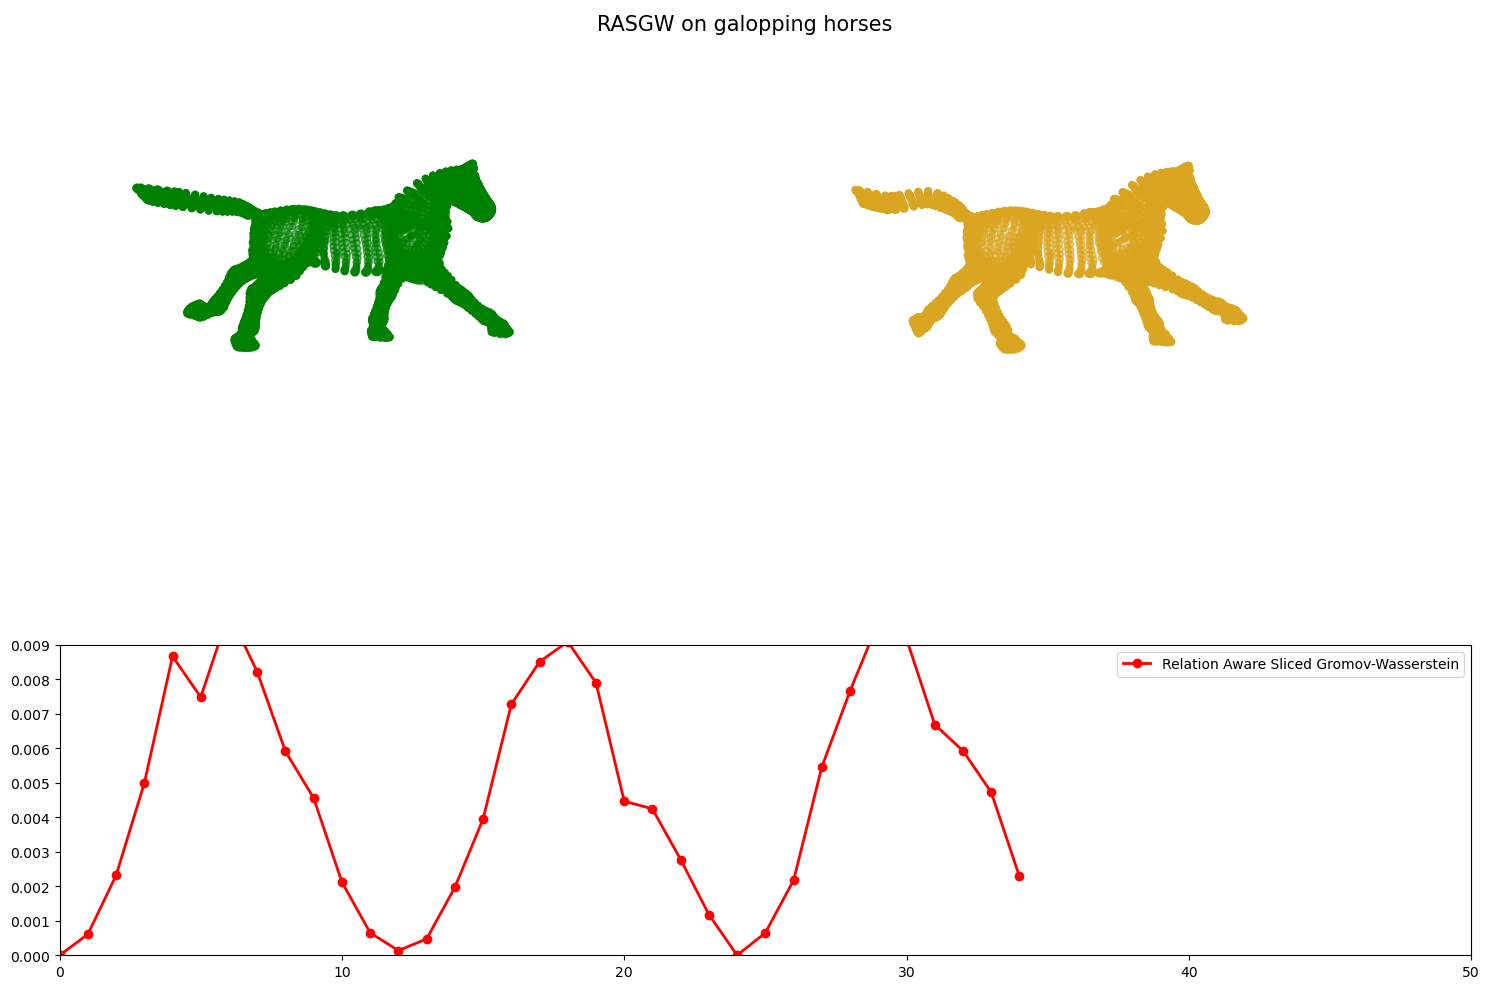

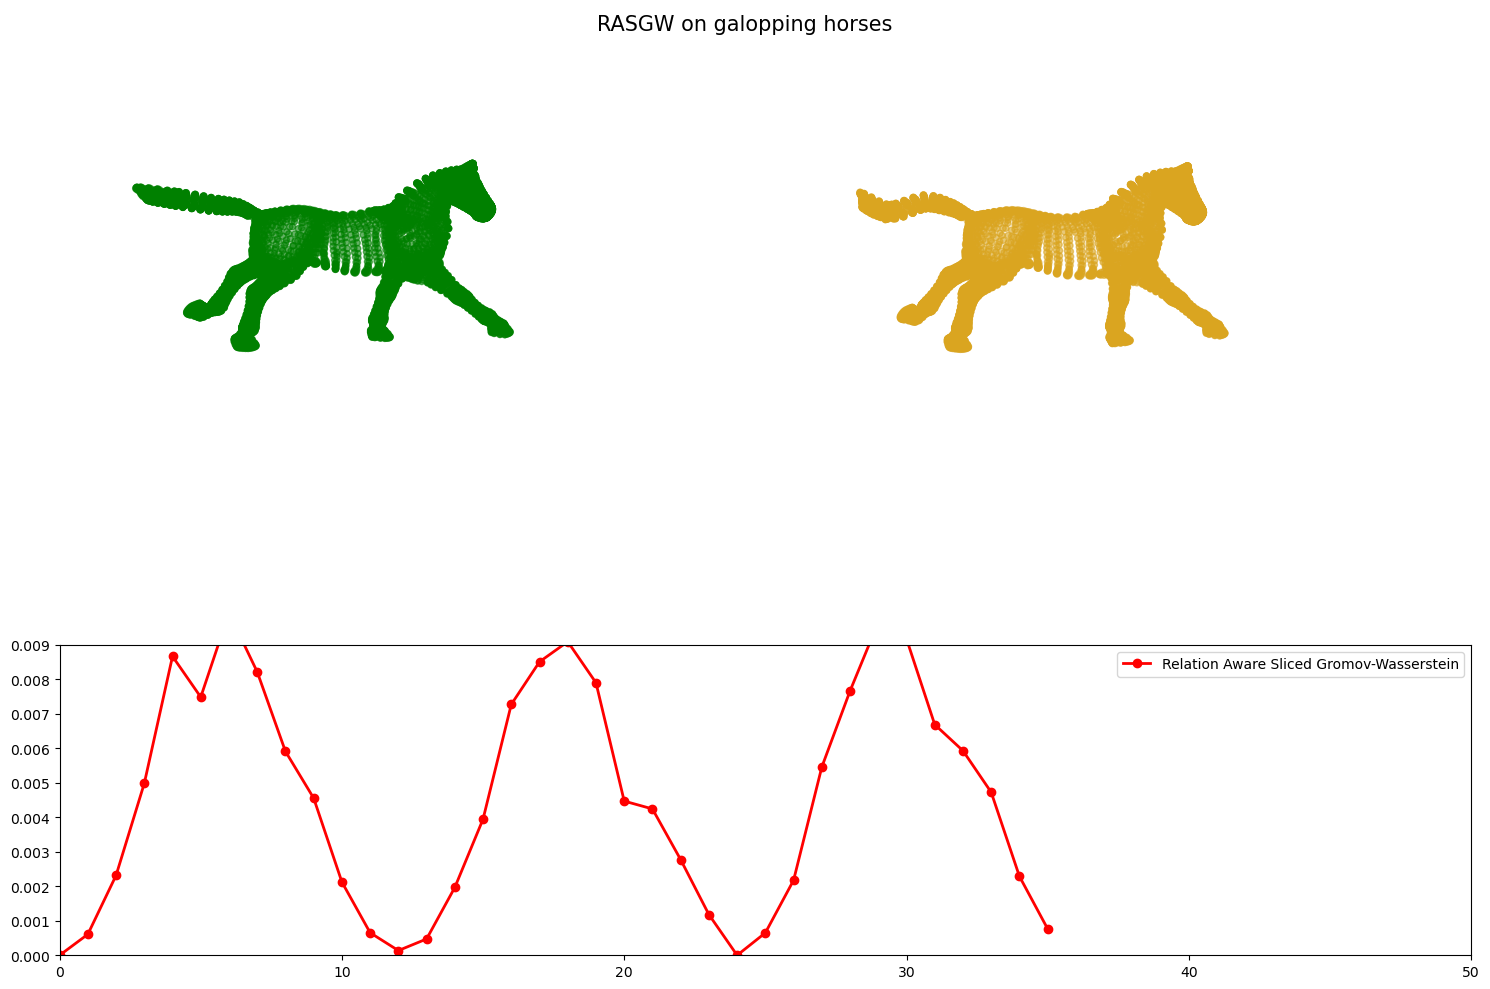

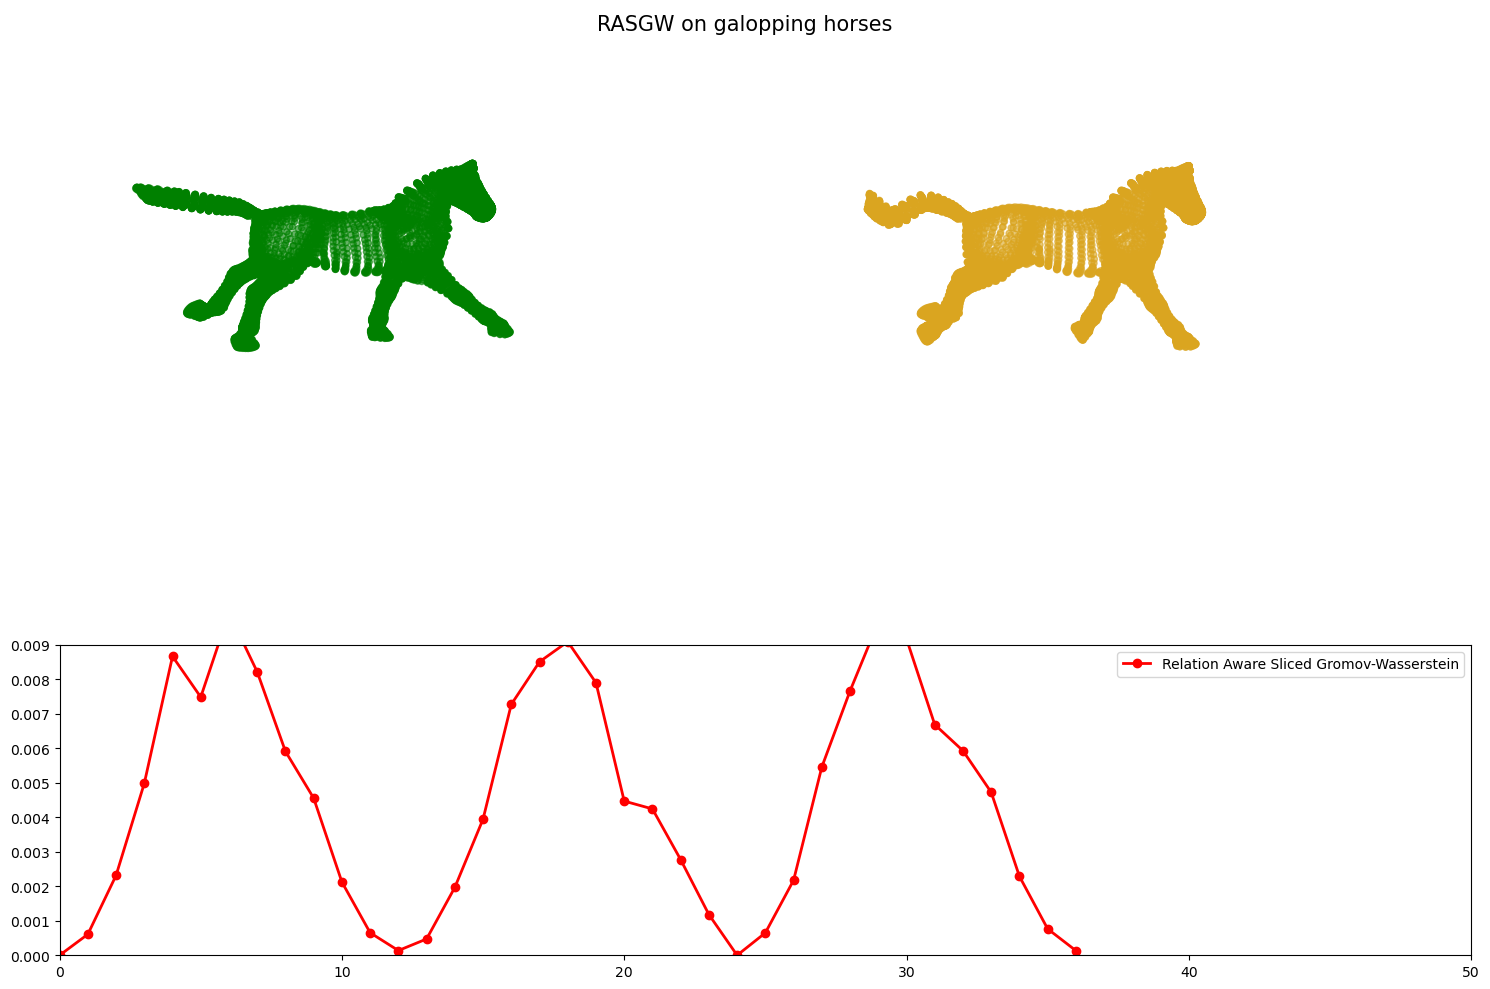

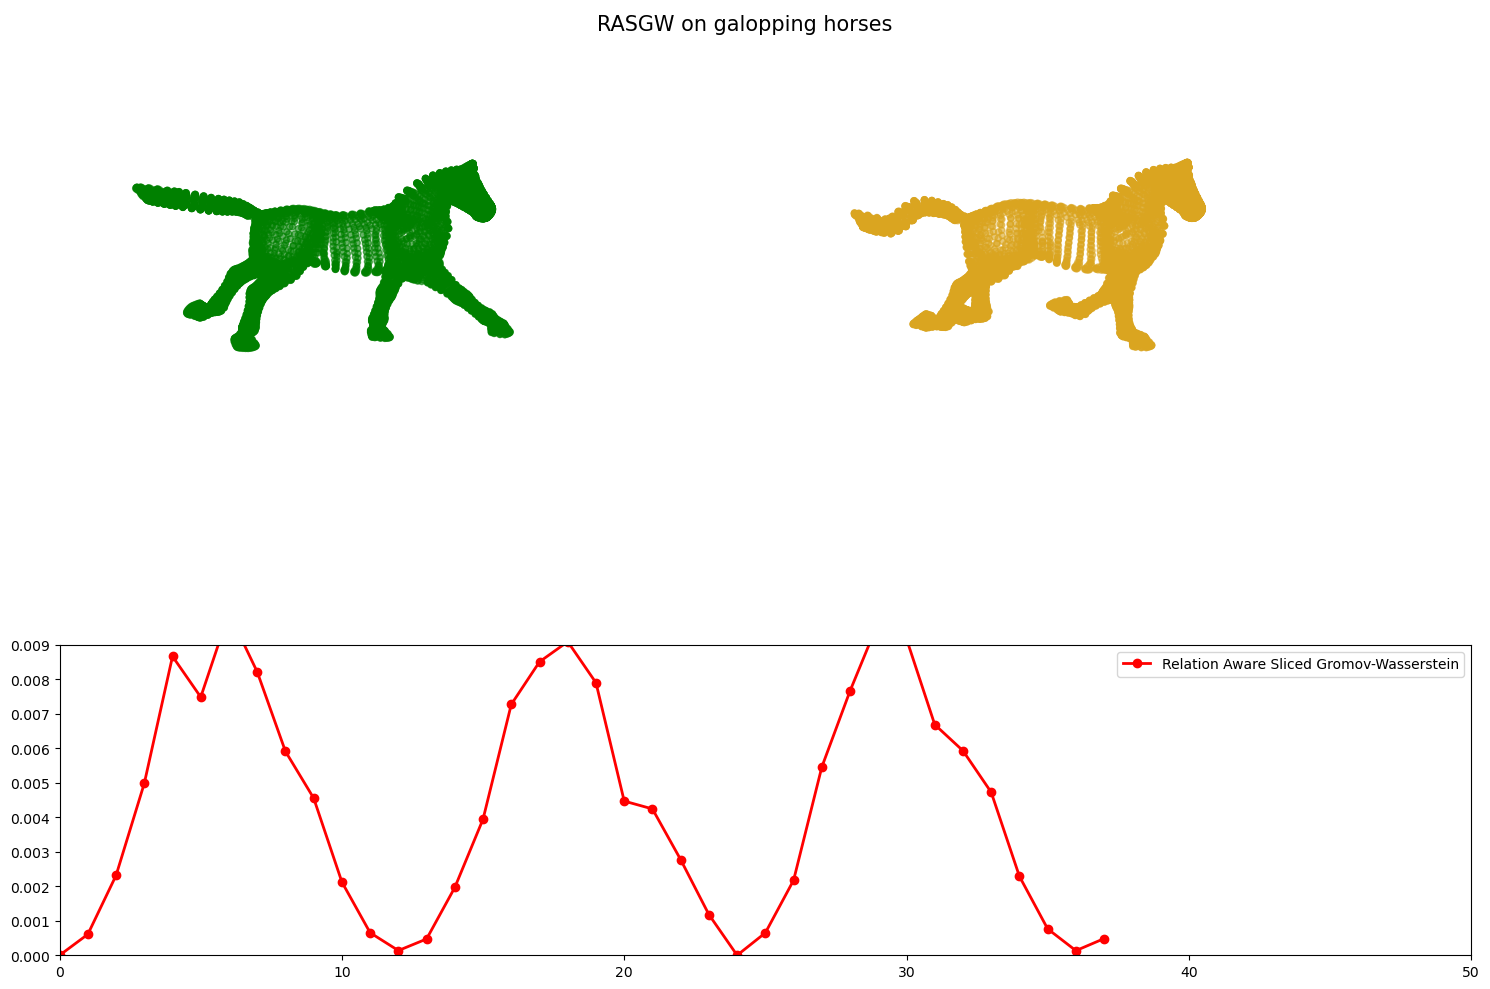

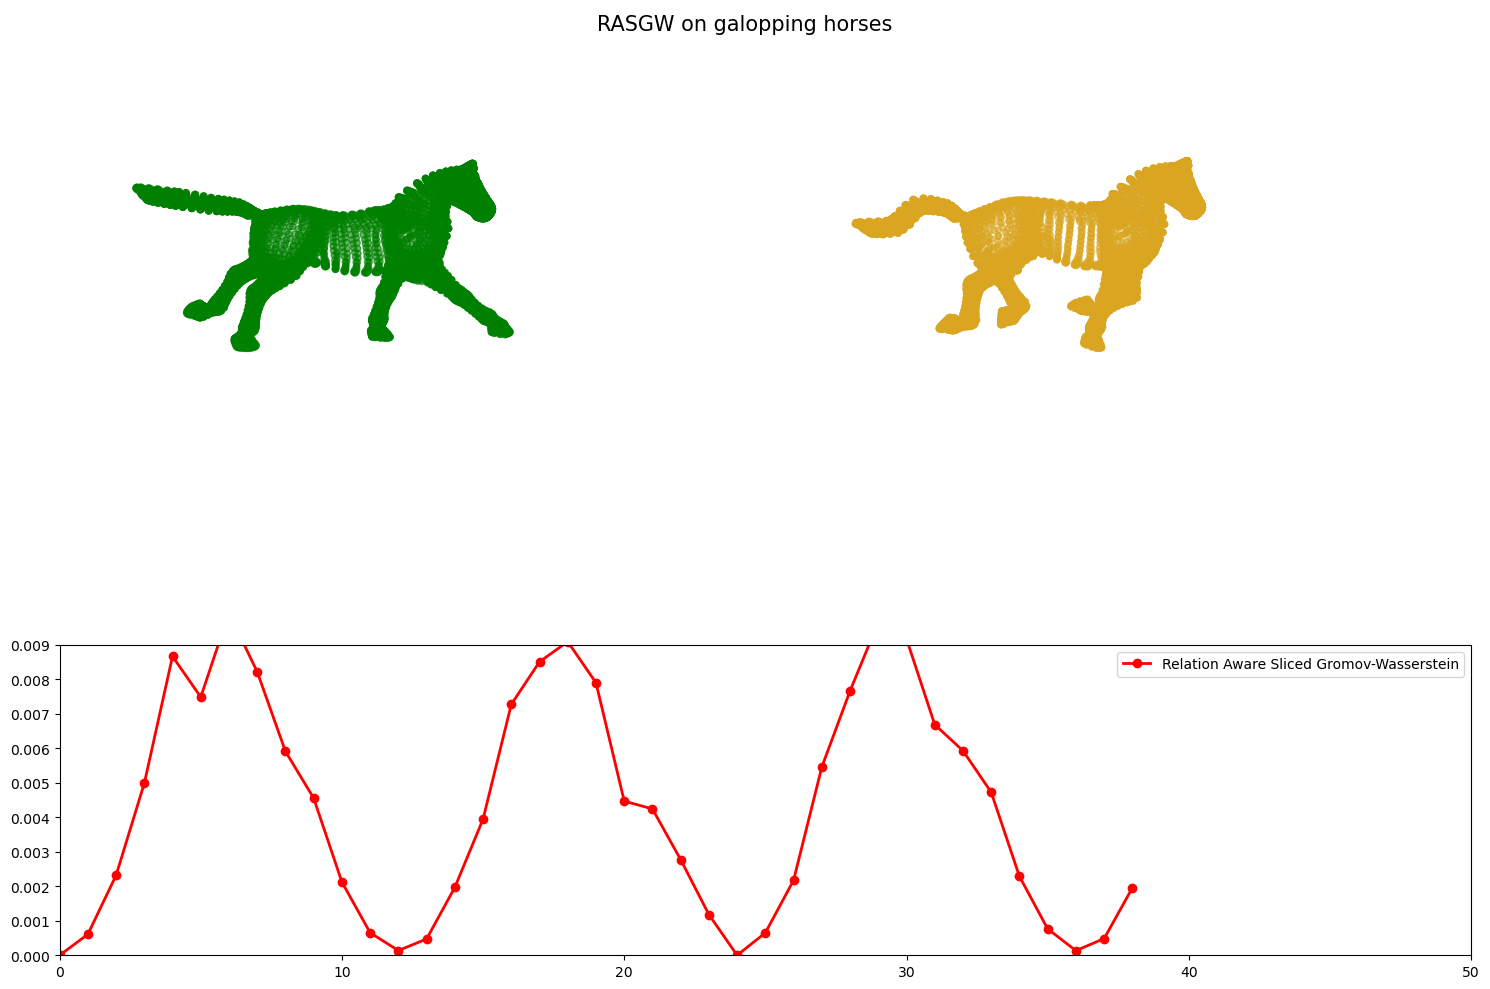

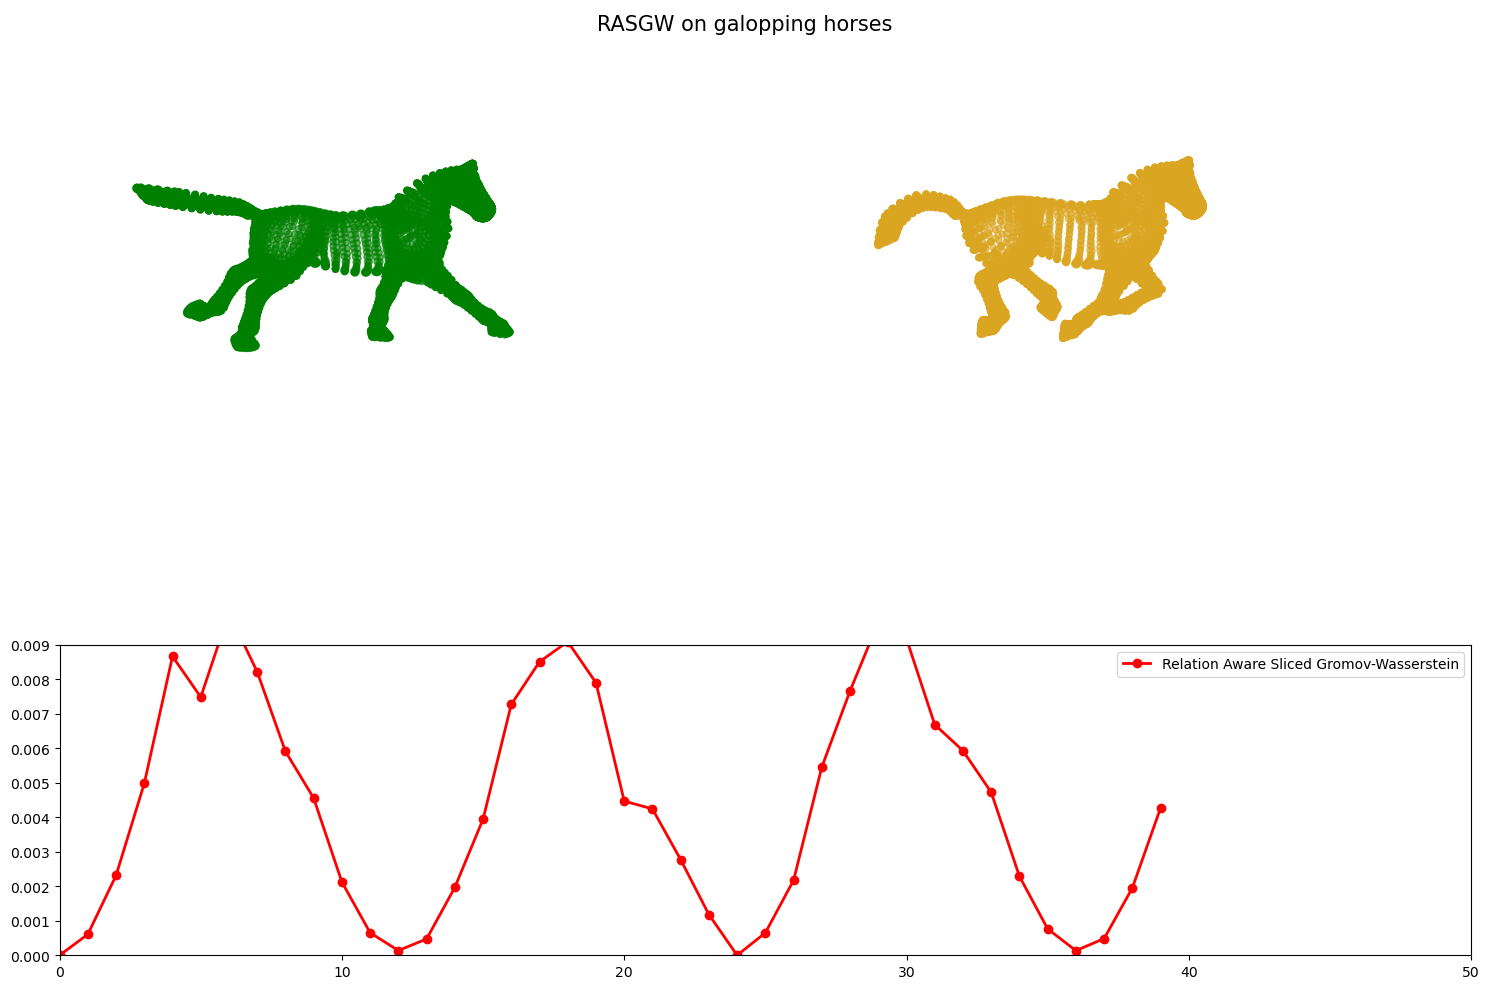

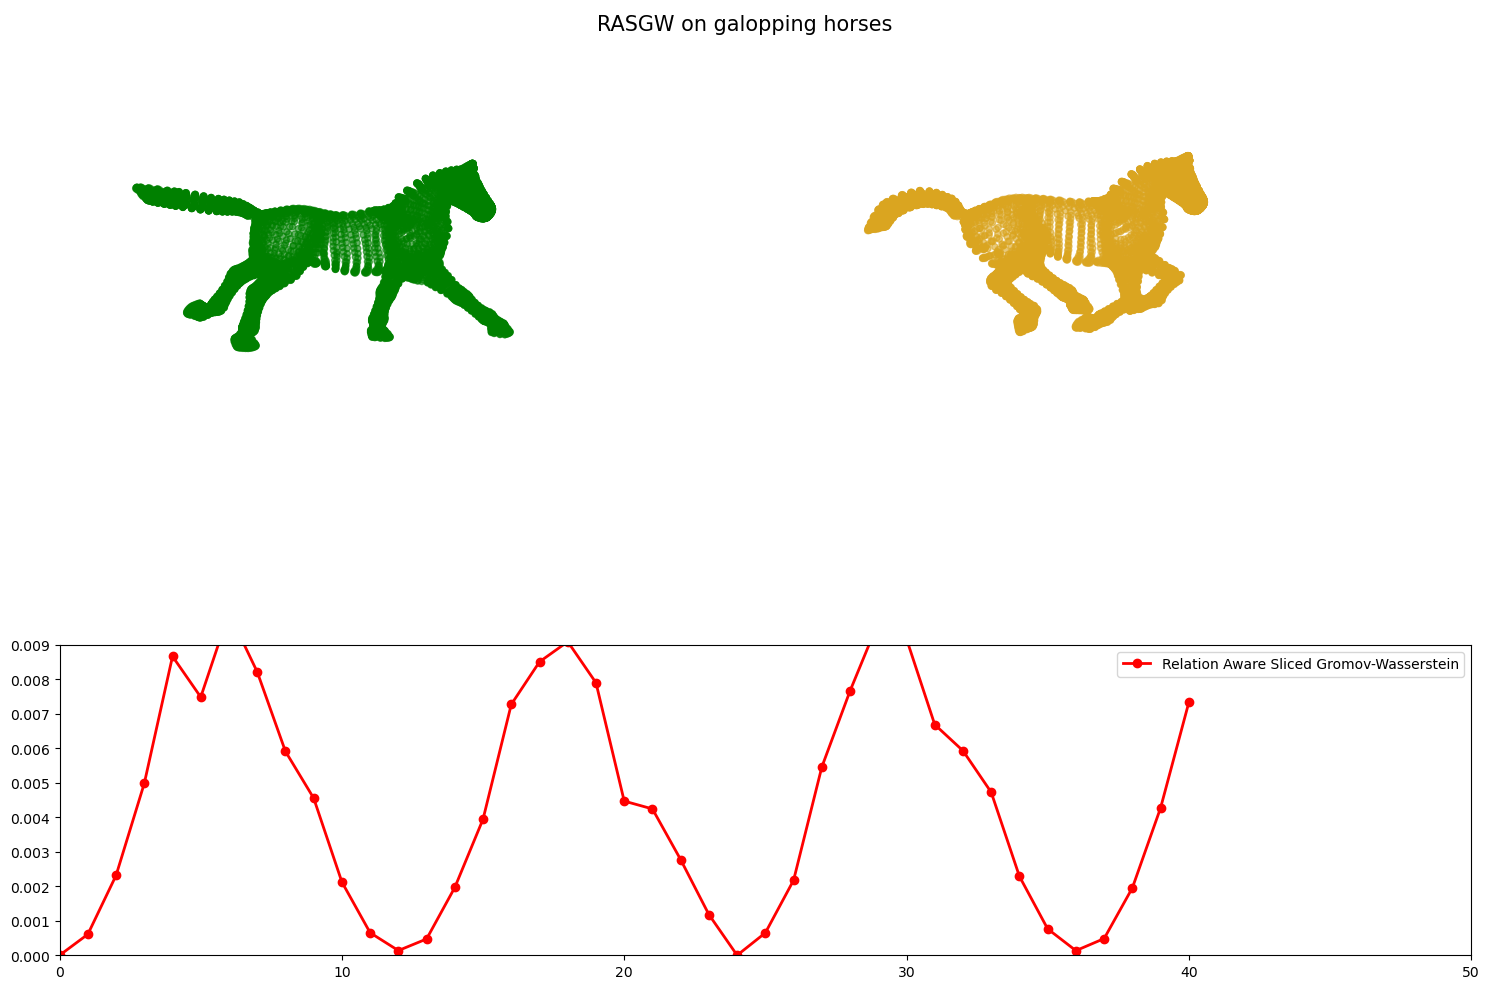

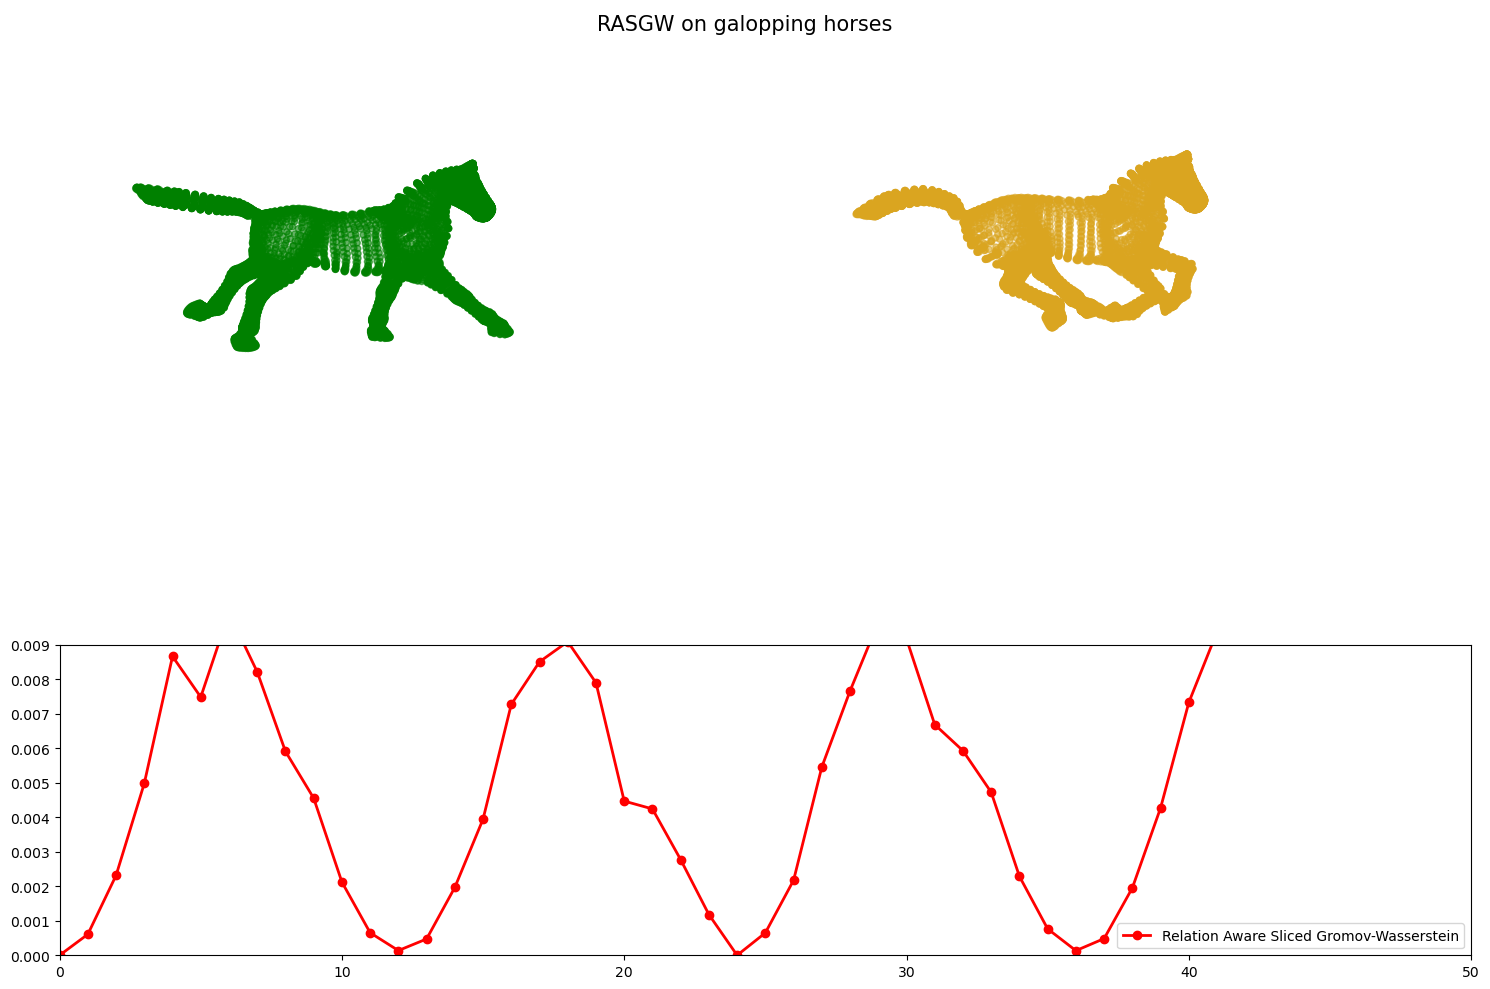

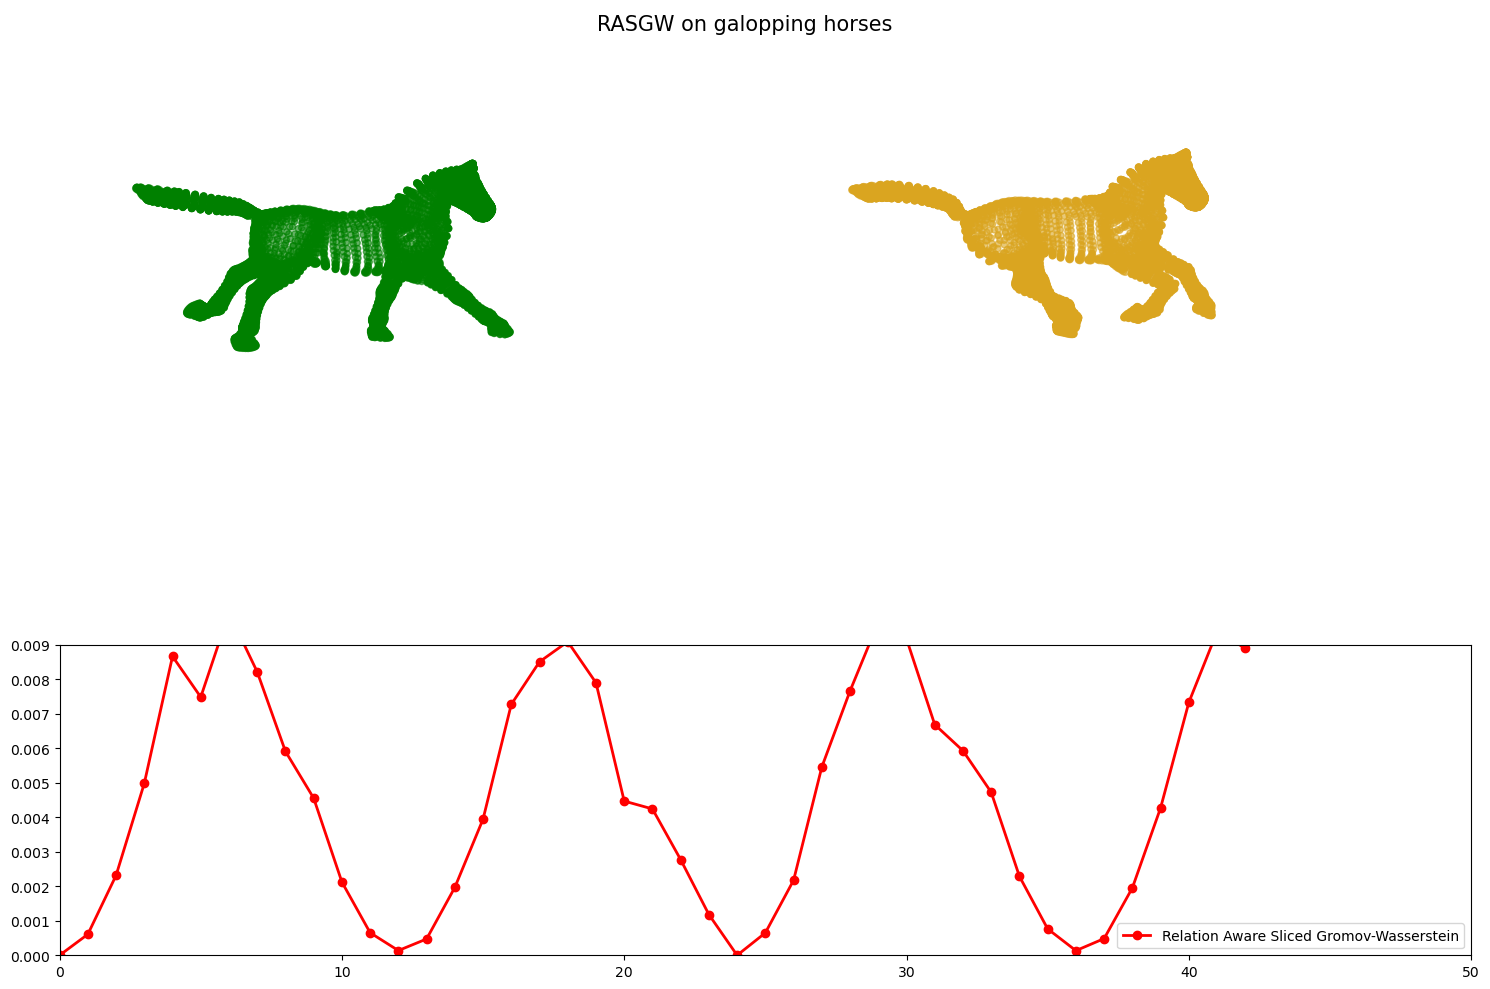

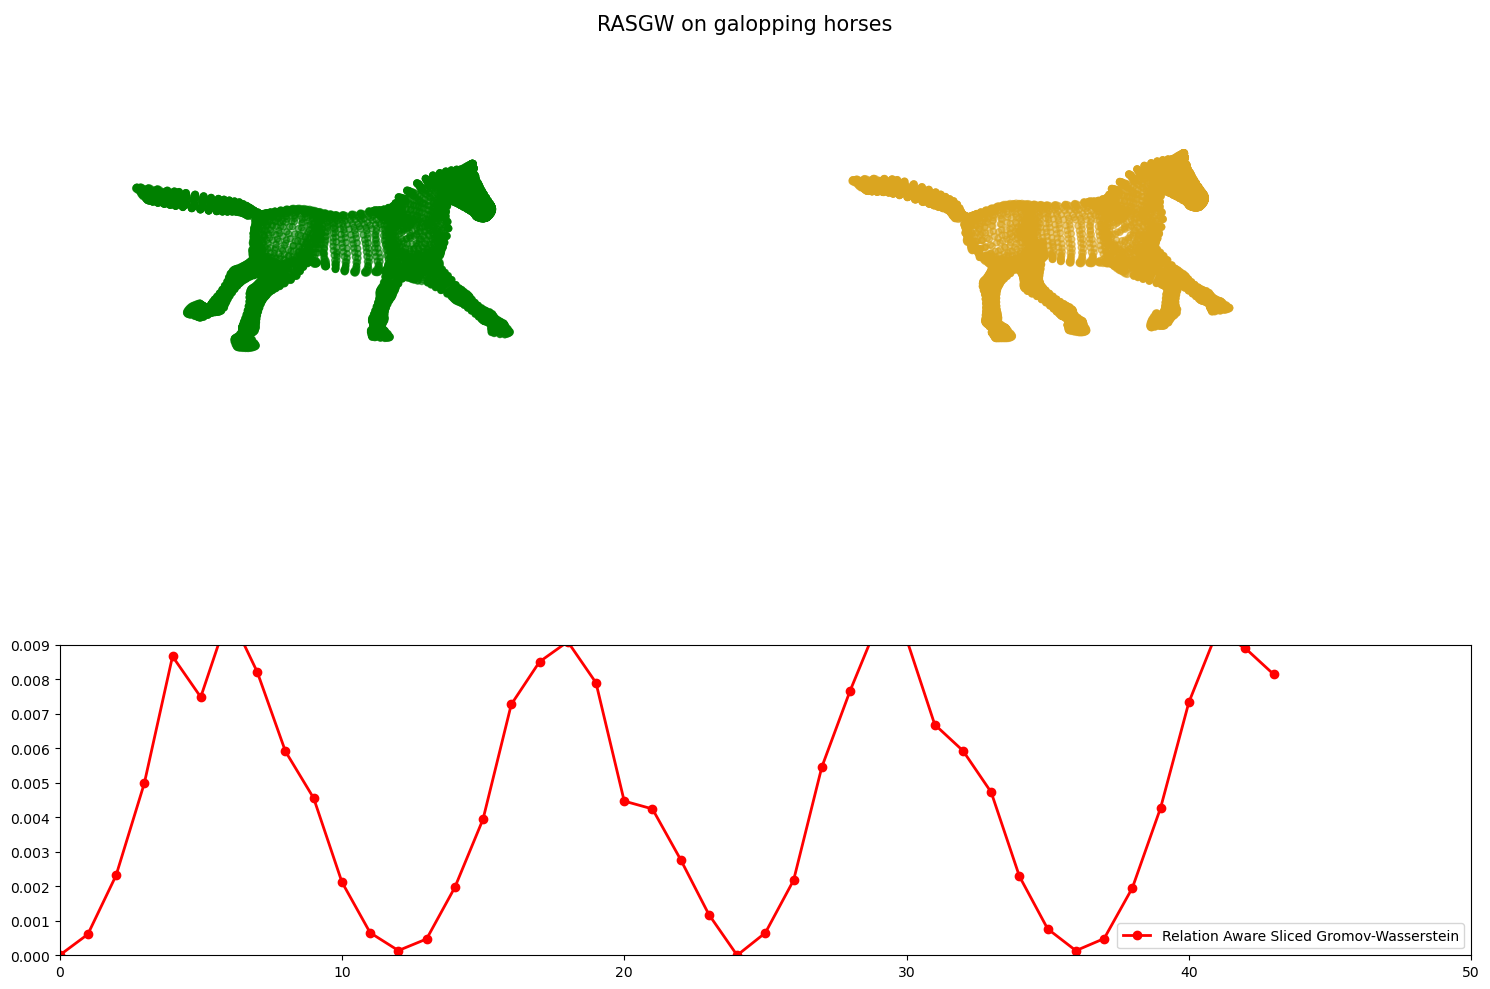

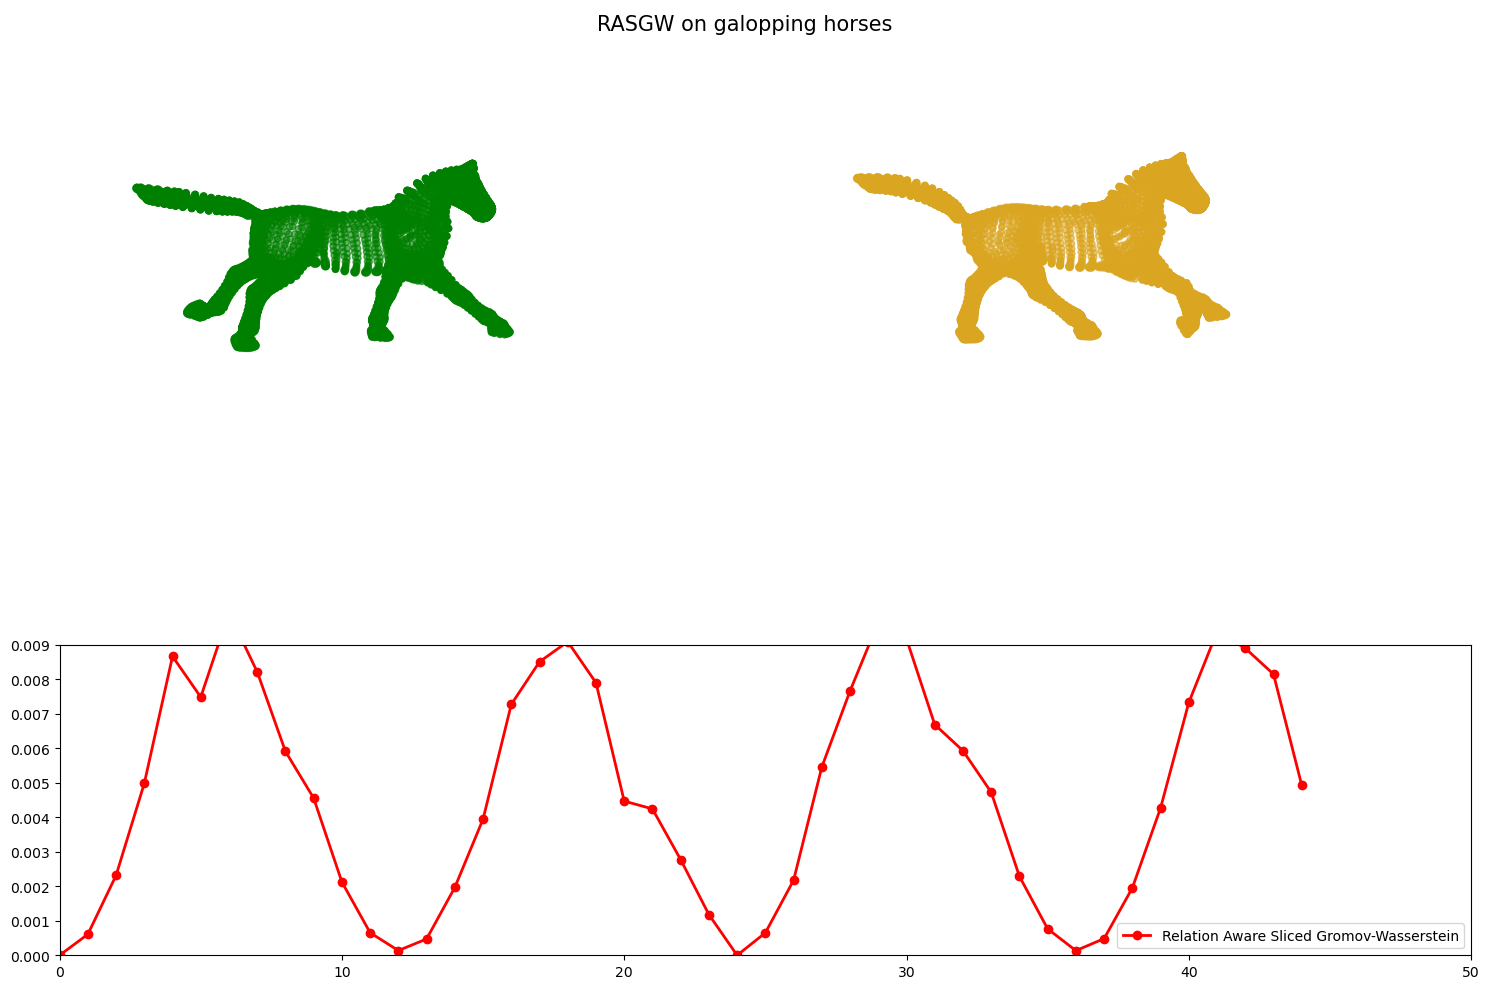

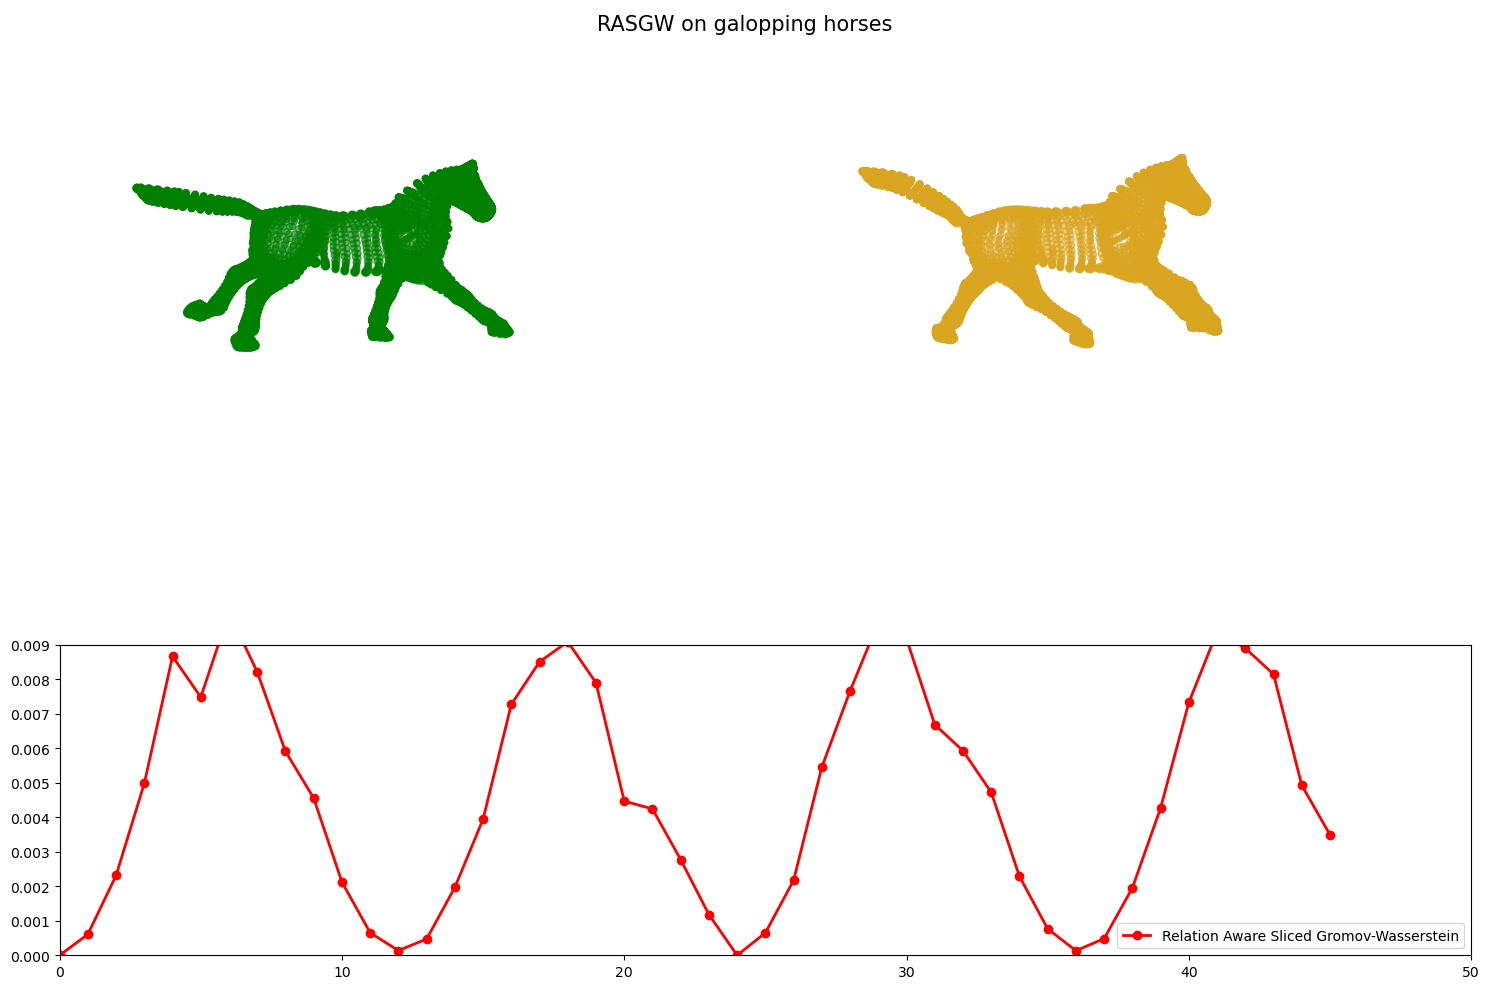

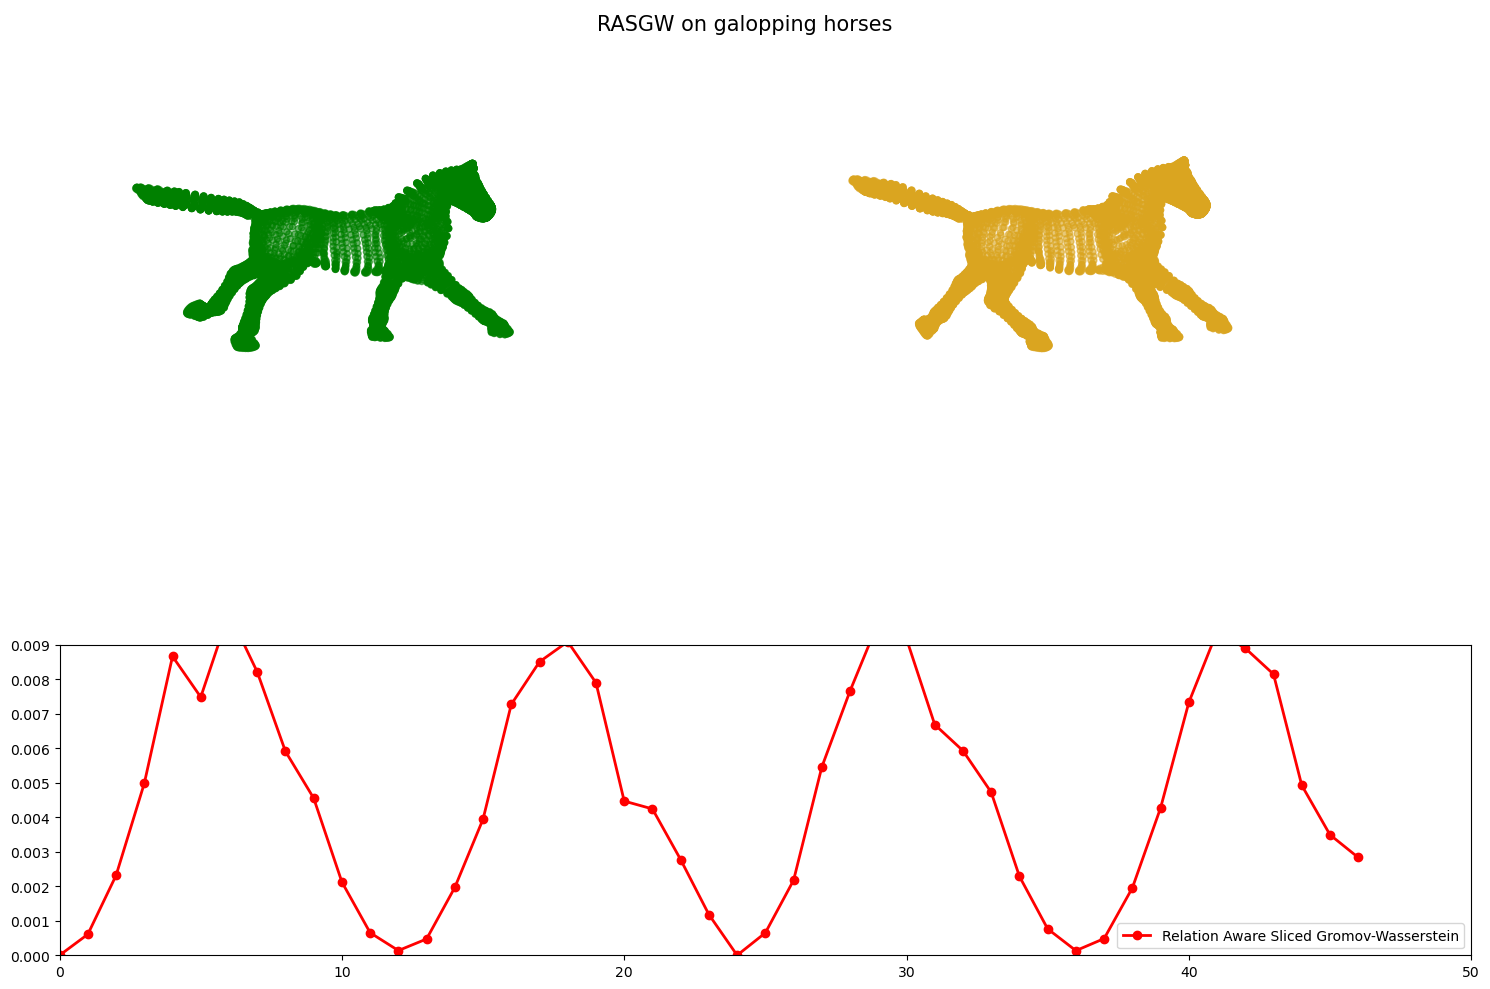

In [12]:
for i in range(len(tab_obj)):
#for i in range(1):
    fig = plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[4,2]) 

    ax = fig.add_subplot(gs[0,0], projection='3d')

    X1=tab_obj[0]
    ax.scatter(X1[:,0],X1[:,2],X1[:,1], marker='o', s=20, c="green", alpha=0.6)
    ax.view_init(elev=10., azim=360)
    ax.set_ylim([-0.5,0.8])
    ax.set_xlim([-0.5,0.5])
    ax.set_zlim([-0.5,0.8])
    
    ax.set_axis_off()


    ax = fig.add_subplot(gs[0,1], projection='3d')
    X2=tab_obj[i]
    ax.scatter(X2[:,0],X2[:,2],X2[:,1], marker='o', s=20, c="goldenrod", alpha=0.6)
    ax.view_init(elev=10., azim=360)
    ax.set_ylim([-0.5,0.8])
    ax.set_xlim([-0.5,0.5])
    ax.set_zlim([-0.5,0.8])

    ax.set_axis_off()


    ax = fig.add_subplot(gs[1,:])
    plt.plot(alldist_sgw[0:i],c='r',lw=2,marker='o')
    plt.ylim([0,0.009])
    plt.xlim([0,50])
    plt.legend(['Relation Aware Sliced Gromov-Wasserstein'])
    
    plt.tight_layout()

    plt.suptitle('RASGW on galopping horses',fontsize=15)
    fig.savefig('./res/'+str(i)+'.png', dpi=fig.dpi)
    #plt.show()

In [11]:
path='./res/'
filenames=sorted_aphanumeric(os.listdir(path))
files=[path+f for f in filenames if 'png' in f]
images = []
for filename in files:
    images.append(imageio.imread(filename))
    
imageio.mimsave('horse_rasgw.gif', images,fps=3)

/tmp/ipykernel_2455562/4182032122.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
